<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [4]:
pwd

'/content'

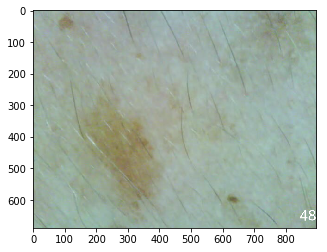

In [5]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [6]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

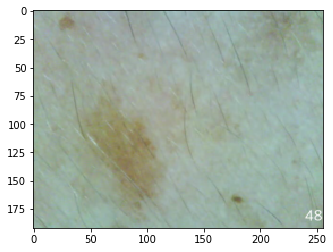

In [9]:
plt.imshow(pigment_image_resized)
plt.show()

In [10]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [12]:
import scipy
scipy.__version__

'1.0.0'

In [13]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [15]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [16]:
filenames 

['18--10-14-am.PNG',
 '20--10-18-pm.PNG',
 '19--10-16-pm.PNG',
 '5--09-27-pm.PNG',
 '15--10-11-pm.PNG',
 '27--11-11-pm.PNG',
 '9--09-29-pm.PNG',
 '26--11-10-am.PNG',
 '4--09-25-pm.PNG',
 '11--10-02-pm.PNG',
 '10--09-30-pm.PNG',
 '24--11-04-am.PNG',
 '17--10-13-am.PNG',
 '21--10-120-pm.PNG',
 '22--10-25-am.PNG',
 '2--09-23-pm.PNG',
 '13--10-06-am.PNG',
 '1-1--09-23-am.PNG',
 '3--09-25-am.PNG',
 '25--11-06-pm.PNG',
 '8--09-29-am.PNG',
 '6--09-28-am.PNG',
 '12--10-04-pm.PNG',
 '16--10-12-pm.PNG',
 '23--10-28-pm.PNG',
 '0-0--09-22-pm.PNG',
 '14--10-10-am.PNG',
 '7--09-28-pm.PNG']

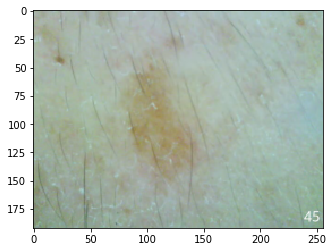

In [17]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [0]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
filenames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
           
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [89]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

ISIC_0014897_segmentation.png
ISIC_0014903_segmentation.png
ISIC_0014901_segmentation.png
ISIC_0014898_segmentation.png
ISIC_0014907_segmentation.png
ISIC_0014910_segmentation.png
ISIC_0014915_segmentation.png
ISIC_0014911_segmentation.png
ISIC_0014912_segmentation.png
ISIC_0014919_segmentation.png
ISIC_0014920_segmentation.png
ISIC_0014926_segmentation.png
ISIC_0014922_segmentation.png
ISIC_0014925_segmentation.png
ISIC_0014927_segmentation.png
ISIC_0014928_segmentation.png
ISIC_0014929_segmentation.png
ISIC_0014930_segmentation.png
ISIC_0014931_segmentation.png
ISIC_0014936_segmentation.png
ISIC_0014933_segmentation.png
ISIC_0014937_segmentation.png
ISIC_0014938_segmentation.png
ISIC_0014940_segmentation.png
ISIC_0014942_segmentation.png
ISIC_0014943_segmentation.png
ISIC_0014945_segmentation.png
ISIC_0014944_segmentation.png
ISIC_0014947_segmentation.png
ISIC_0014955_segmentation.png
ISIC_0014948_segmentation.png
ISIC_0014951_segmentation.png
ISIC_0014838_segmentation.png
ISIC_00148

In [92]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [93]:
segs.shape

(2594, 192, 256)

In [94]:
images.shape

(2594, 192, 256, 3)

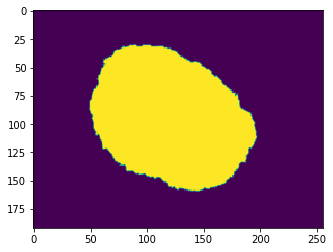

In [100]:
plt.imshow(segs[10])

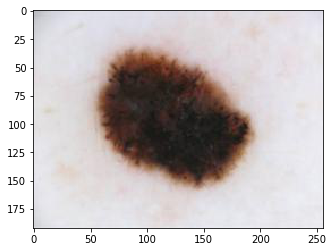

In [102]:
plt.imshow(images[10])

[[[0.17647059 0.15294118 0.2       ]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.23137255 0.22745098 0.28235294]
  [0.24313725 0.23529412 0.29019608]
  [0.25098039 0.24313725 0.29803922]]

 [[0.17254902 0.14901961 0.19607843]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.24313725 0.23921569 0.29411765]
  [0.2627451  0.25490196 0.30980392]
  [0.2745098  0.26666667 0.32156863]]

 [[0.16862745 0.14509804 0.19215686]
  [0.16862745 0.15686275 0.19215686]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.25098039 0.25098039 0.29803922]
  [0.27058824 0.2627451  0.31764706]
  [0.28235294 0.2745098  0.32941176]]

 ...

 [[0.34117647 0.31764706 0.3254902 ]
  [0.40784314 0.38431373 0.39215686]
  [0.49411765 0.47058824 0.47843137]
  ...
  [0.45882353 0.43529412 0.45098039]
  [0.41960784 0.39607843 0.41176471]
  [0.38431373 0.36078431 0.37647059]]

 [[0.29411765 0.27058824 0.27843137]
  [0.37254902 0.34901961 0.35686275]


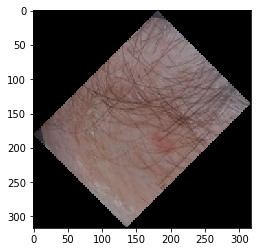

In [103]:
image = images[2580,:,:,:]/255
print(image)
rotate_image = ndimage.rotate(image, 45)
#rotate_image = misc.imresize(rotate_image, (192,256,6))
print(rotate_image)
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

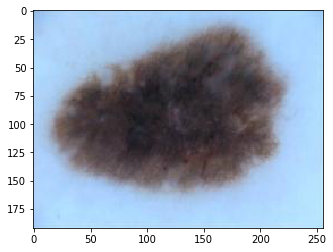

In [104]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [105]:
filepath

'/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches/batch0/ISIC_0000059.jpg'

In [106]:
image.shape

(192, 256, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


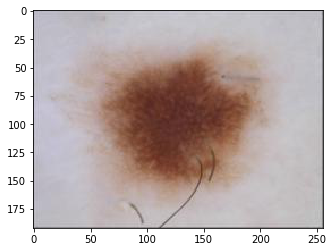

In [107]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

**Check some features of the data to be sure that it uploaded properly**

check whether cells are aligned

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [109]:
trainim.shape

(2464, 192, 256, 3)

In [110]:
np.max(testlab)

255

In [111]:
testlab.shape

(130, 192, 256)

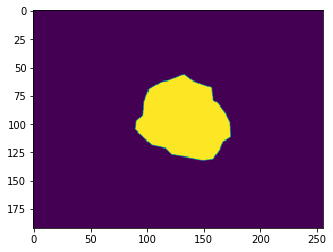

In [112]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

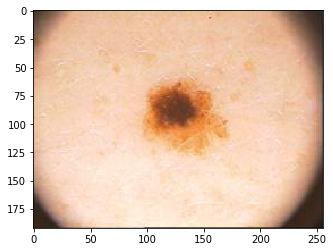

In [581]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
def data_augmentations(features,lables,flag):
  if flag:
    #print("treat the first input image")
    #hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
    #plt.imshow(features[0])
    #plt.show()
    #plt.imshow(hsv_img)
    #plt.show()
    #print(hsv_img.dtype)
    #print(features[0].dtype)
    #print(hsv_img)
    #print(features[0])
    #l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
    #image = np.concatenate((features[0]/255,hsv_img,l), axis =2)  #concatenate into one big image
    x2 = features[0].reshape([1,192,256,3]) #image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
    image = features[0]
    #print("#flip the first image:")
    flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
    #plt.imshow(flip_ud_x2[0,:,:,:3])
   
    #plt.show()
    x2 = np.vstack((x2, flip_ud_x2)) 
    
    #print("#rotate the first image by a random angle")
    ra = np.random.random()*360
    rotate_x2 = ndimage.rotate(image, ra)
    #print(image)
    #print(rotate_x2)
    #plt.imshow(rotate_x2[:,:,:3])
    #plt.show()
    #print("test1")
    rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
    #plt.imshow(rotate_x2[0,:,:,:3])
    #print("test2")
    x2 = np.vstack((x2, rotate_x2 )) 
    
    #print("#treat the first label:")
    label = lables[0]
    #plt.imshow(label)
    #plt.show()
    y2 = label.reshape([1,192,256,1])
    #print("#flip the first label to match the first input image:")
    flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
    y2 = np.vstack((y2, flip_ud_y2)) 
    #plt.imshow(flip_ud_y2[0:,:,:,:])
    #plt.show()
    #print("#rotate the label by the same angle as the image")
    rotate_y2 = ndimage.rotate(label, ra)
    rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
    y2 = np.vstack((y2, rotate_y2)) 
    #plt.imshow(rotate_y2) 
    #plt.show()
  
    i = 1
    
    #print('#treat the subsequent images and labels')
    for image in features[1:]:
      #print(i)
      #plt.imshow(image)
      #plt.show()
      #hsv_img = rgb2hsv(image)  #add 3 hsv channels       
      #plt.imshow(hsv_img)
      #plt.show()
      #l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
      #image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
      image2 = image.reshape([1,192,256,3])  #need to add "1" to first dimension for future concatenation
      
      x2 = np.vstack((x2, image2))
      #print('#flip the image:')
      flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
      x2 = np.vstack((x2, flip_ud_x2))
      #plt.imshow(flip_ud_x2[1,:,:,:3])
      #plt.show()
     
      #print('#rotate the image by a random angle')
      ra = np.random.random()*360
      rotate_x2 = ndimage.rotate(image, ra)
      rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
      x2 = np.vstack((x2, rotate_x2))
      #plt.imshow(rotate_x2[0,:,:,:3])
      #plt.show()
      
     
      #print('#treat the corresponding label:')
      label = lables[i]
      label2 = lables[i].reshape([1,192,256,1])
      #plt.imshow(label)
      #plt.show()
     
      y2 = np.vstack((y2,label2))
      #print('#flip the corresponding label to match the input image:')
      flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
      y2 = np.vstack((y2,flip_ud_y2))
      #plt.imshow(flip_ud_y2[0,:,:,:])
      #plt.show()
      
      
      #print('#rotate the label by the same angle as the image')
      rotate_y2 = ndimage.rotate(label, ra)
      rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
      y2 = np.vstack((y2,rotate_y2))
      #plt.imshow(rotate_y2) 
      #plt.show()
      
      #print('#scale images to 0-1 interval')
    x2 = x2/255
    y2 = y2/255
  else:
     x2 = features/255
     y2 = lables/255
  return x2, y2
    
  

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [635]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

In [640]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [642]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [644]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

In [646]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [648]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [651]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

(?, 24, 32, 256)


In [652]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [653]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [654]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [655]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [656]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

### Session

In [662]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [663]:
tf.math.exp(1.)

<tf.Tensor 'Exp_11:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  1.782206000001679 

Avg Jacc is:


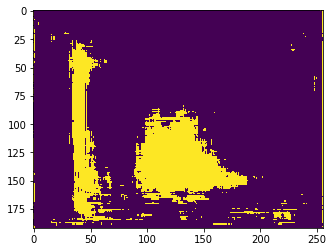

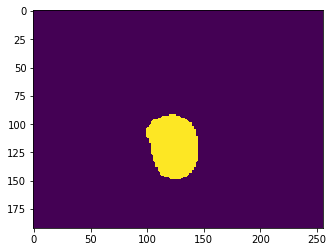

0.29103889465332033  step number is  0  batch_size is  16
Currently on step 100
the time is  24.35399900000084 

Avg Jacc is:


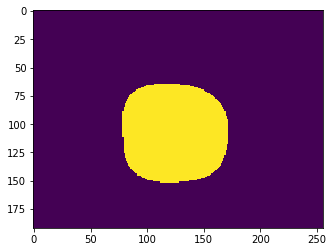

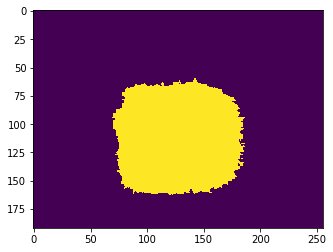

0.5466192392202524  step number is  100  batch_size is  16
Currently on step 200
the time is  47.14386200000081 

Avg Jacc is:


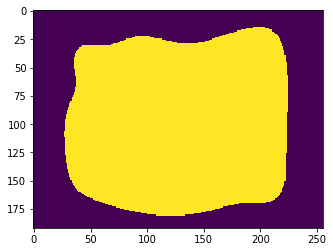

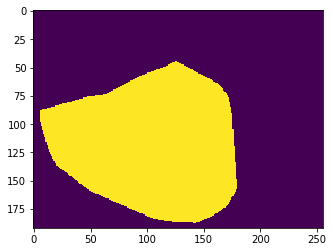

0.5822414691631611  step number is  200  batch_size is  16
Currently on step 300
the time is  69.66726000000017 

Avg Jacc is:


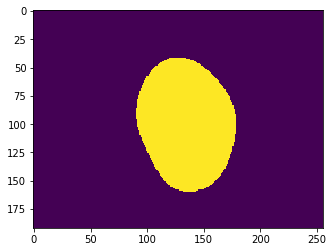

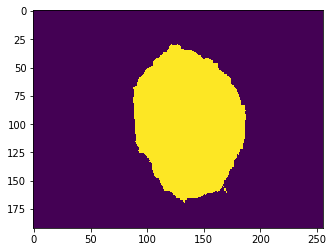

0.6049639775202824  step number is  300  batch_size is  16
Currently on step 400
the time is  92.37205100000028 

Avg Jacc is:


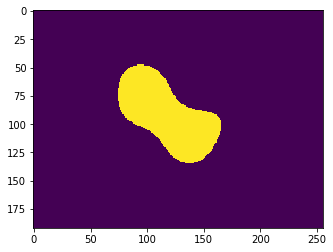

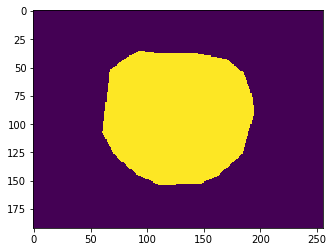

0.6078620910644531  step number is  400  batch_size is  16
Currently on step 500
the time is  115.02529500000128 

Avg Jacc is:


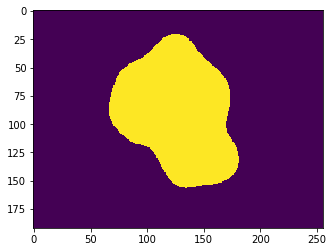

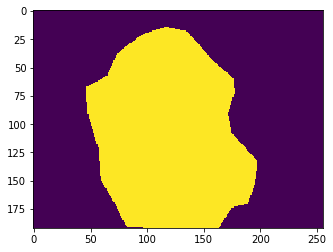

0.6390836275540865  step number is  500  batch_size is  16
Currently on step 600
the time is  137.59303900000123 

Avg Jacc is:


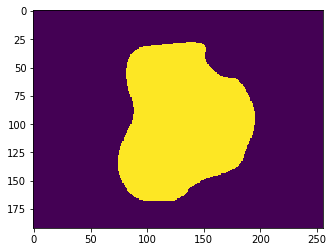

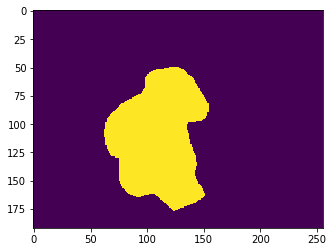

0.6561771099384014  step number is  600  batch_size is  16
Currently on step 700
the time is  160.18930900000123 

Avg Jacc is:


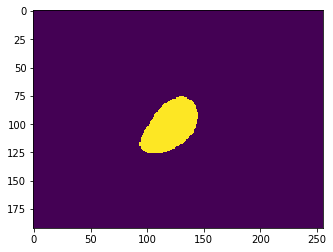

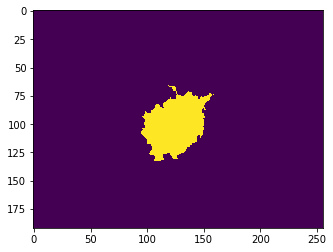

0.6247367272010216  step number is  700  batch_size is  16
Currently on step 800
the time is  182.87481800000023 

Avg Jacc is:


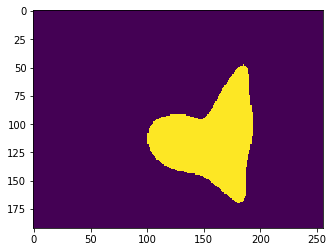

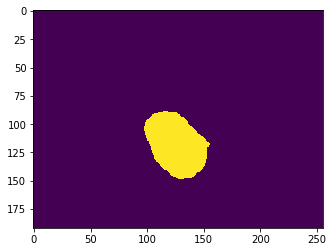

0.6532602750338041  step number is  800  batch_size is  16
Currently on step 900
the time is  205.5333440000013 

Avg Jacc is:


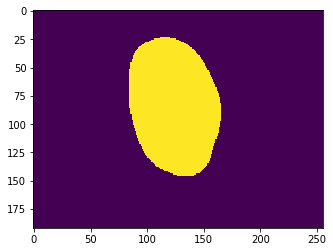

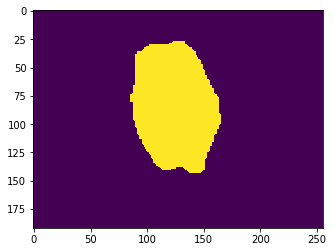

0.6945118243877705  step number is  900  batch_size is  16
Currently on step 1000
the time is  228.19416700000147 

Avg Jacc is:


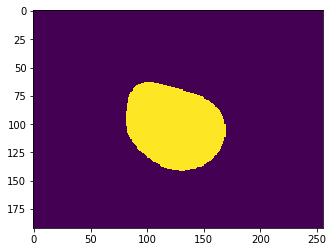

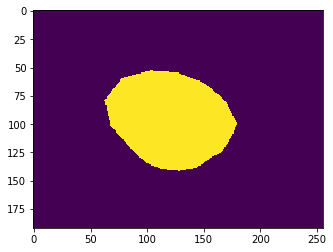

0.6593327448918269  step number is  1000  batch_size is  16
Currently on step 1100
the time is  250.88889400000153 

Avg Jacc is:


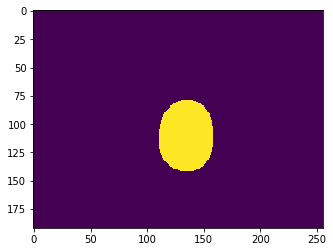

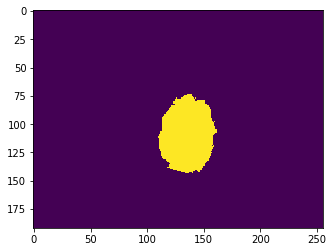

0.6767288794884315  step number is  1100  batch_size is  16
Currently on step 1200
the time is  273.58979700000054 

Avg Jacc is:


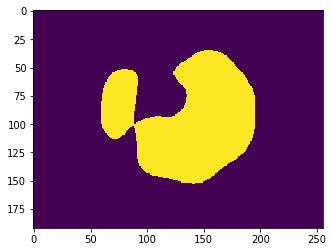

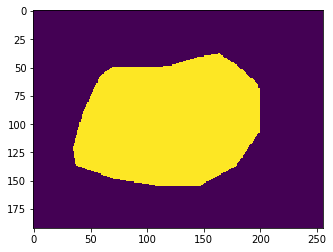

0.6871675931490384  step number is  1200  batch_size is  16
Currently on step 1300
the time is  296.1786860000011 

Avg Jacc is:


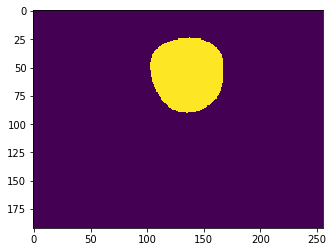

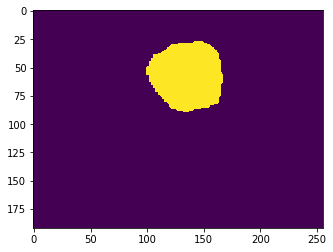

0.687658926156851  step number is  1300  batch_size is  16
Currently on step 1400
the time is  318.9292580000001 

Avg Jacc is:


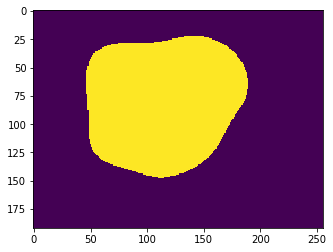

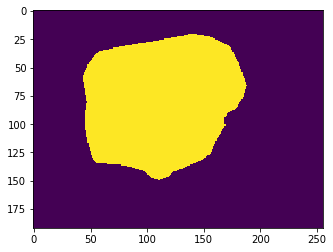

0.6847698505108173  step number is  1400  batch_size is  16
Currently on step 1500
the time is  341.5825650000006 

Avg Jacc is:


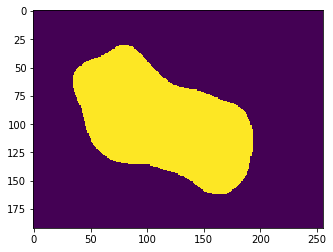

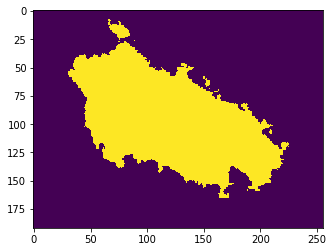

0.713441878098708  step number is  1500  batch_size is  16
Currently on step 1600
the time is  364.31548600000133 

Avg Jacc is:


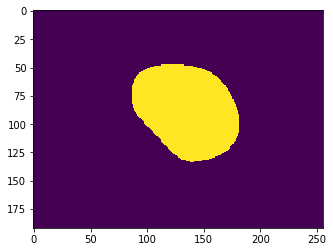

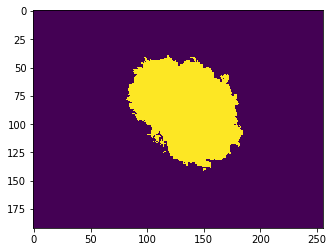

0.7070389967698317  step number is  1600  batch_size is  16
Currently on step 1700
the time is  386.97304200000144 

Avg Jacc is:


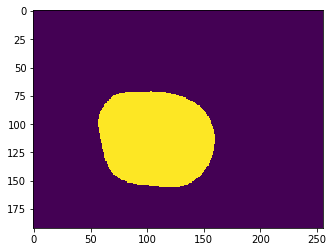

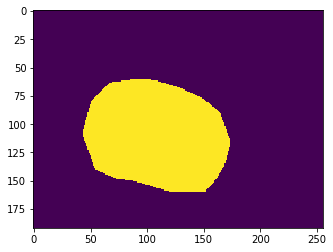

0.7081716684194711  step number is  1700  batch_size is  16
Currently on step 1800
the time is  409.658112000001 

Avg Jacc is:


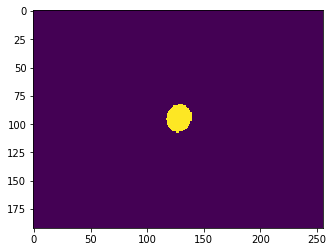

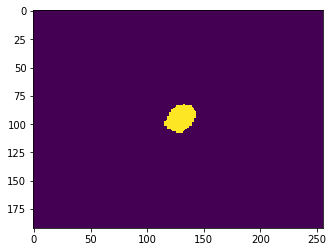

0.6472101651705229  step number is  1800  batch_size is  16
Currently on step 1900
the time is  432.38430000000153 

Avg Jacc is:


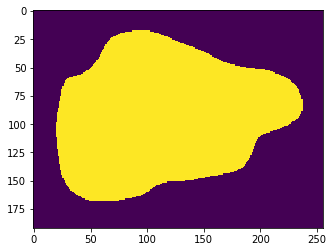

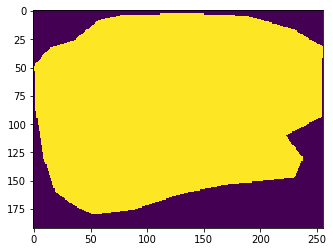

0.7230110168457031  step number is  1900  batch_size is  16
Currently on step 2000
the time is  455.1261890000005 

Avg Jacc is:


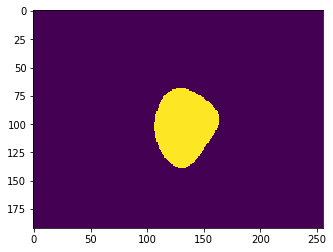

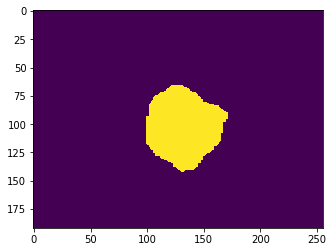

0.681655766413762  step number is  2000  batch_size is  16
Currently on step 2100
the time is  477.8357930000002 

Avg Jacc is:


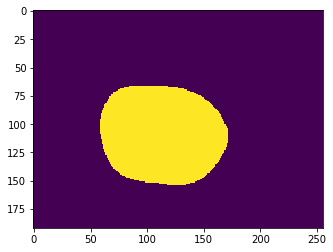

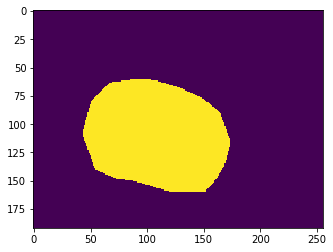

0.7059167715219351  step number is  2100  batch_size is  16
Currently on step 2200
the time is  500.5224820000003 

Avg Jacc is:


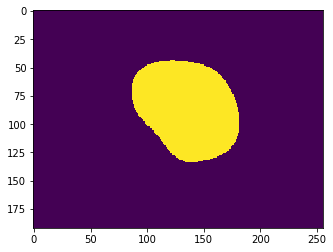

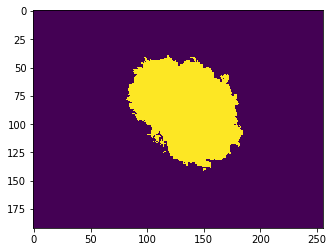

0.7262620192307693  step number is  2200  batch_size is  16
Currently on step 2300
the time is  523.2107000000015 

Avg Jacc is:


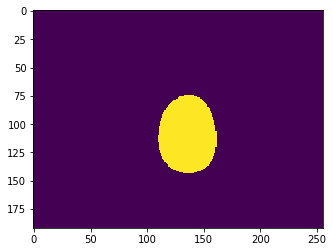

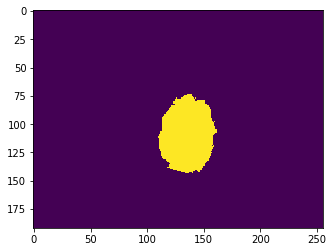

0.7316477262056791  step number is  2300  batch_size is  16
Currently on step 2400
the time is  546.0135420000006 

Avg Jacc is:


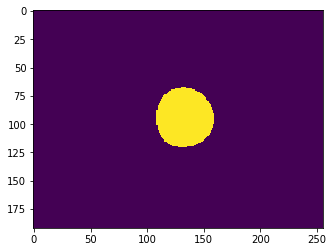

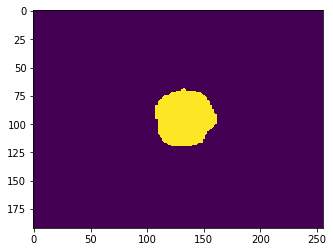

0.717352529672476  step number is  2400  batch_size is  16
Currently on step 2500
the time is  568.6710620000013 

Avg Jacc is:


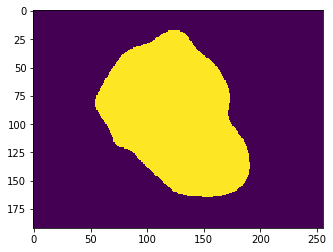

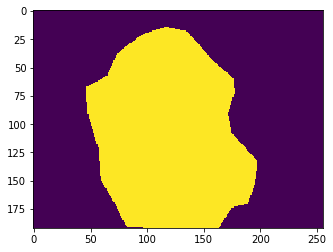

0.6968468886155349  step number is  2500  batch_size is  16
Currently on step 2600
the time is  591.4422820000018 

Avg Jacc is:


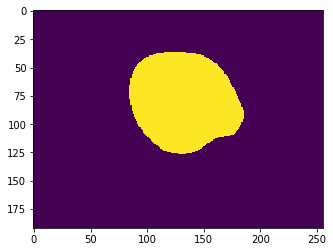

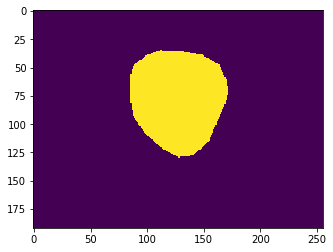

0.7238814133864183  step number is  2600  batch_size is  16
Currently on step 2700
the time is  614.2092500000017 

Avg Jacc is:


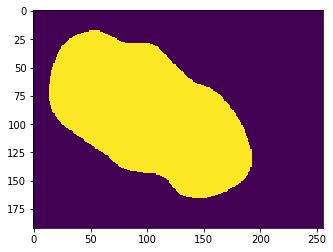

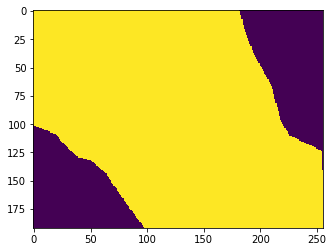

0.7284520075871395  step number is  2700  batch_size is  16
Currently on step 2800
the time is  637.0168920000015 

Avg Jacc is:


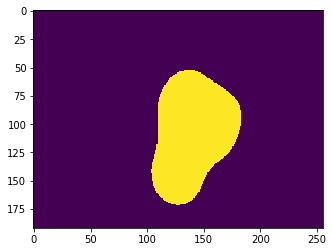

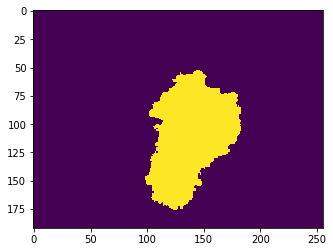

0.7050538283128005  step number is  2800  batch_size is  16
Currently on step 2900
the time is  659.8229640000009 

Avg Jacc is:


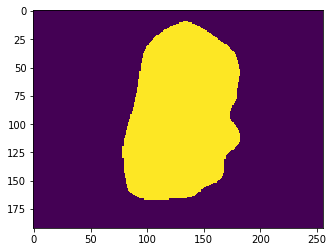

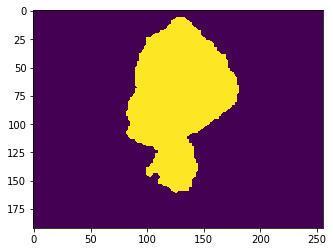

0.7445477999173677  step number is  2900  batch_size is  16
Currently on step 3000
the time is  682.6208110000007 

Avg Jacc is:


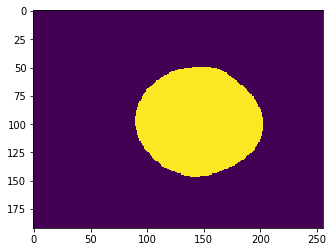

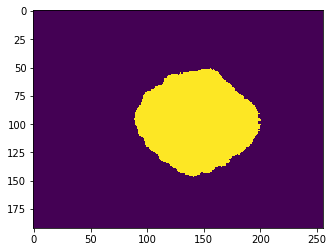

0.7390338017390324  step number is  3000  batch_size is  16
Currently on step 3100
the time is  705.3712530000012 

Avg Jacc is:


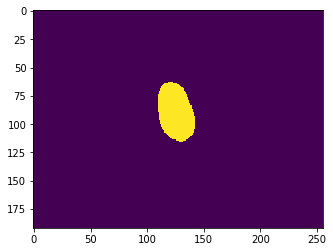

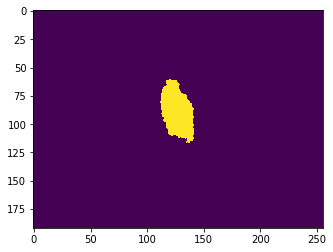

0.71546630859375  step number is  3100  batch_size is  16
Currently on step 3200
the time is  728.1552520000005 

Avg Jacc is:


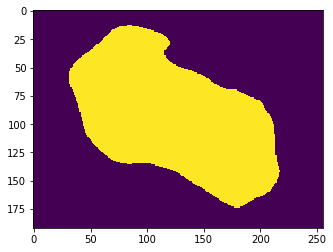

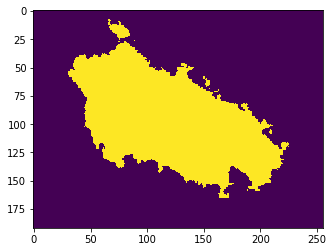

0.7369624211237981  step number is  3200  batch_size is  16
Currently on step 3300
the time is  750.8924770000012 

Avg Jacc is:


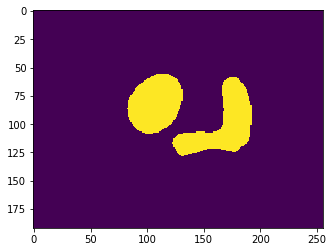

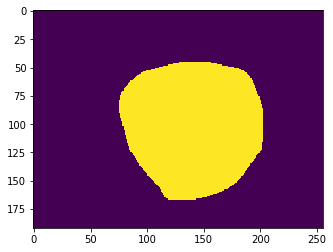

0.7031421367938702  step number is  3300  batch_size is  16
Currently on step 3400
the time is  773.5823120000005 

Avg Jacc is:


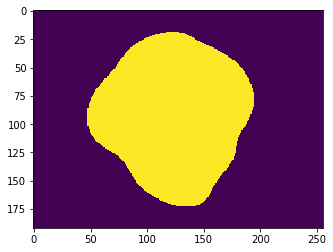

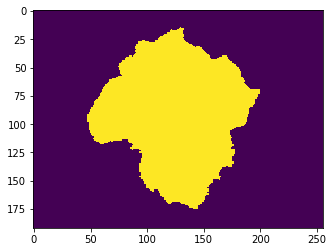

0.7391371506911057  step number is  3400  batch_size is  16
Currently on step 3500
the time is  796.376604000001 

Avg Jacc is:


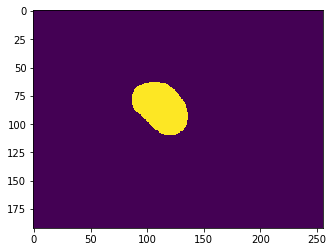

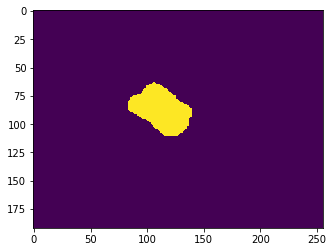

0.695335212120643  step number is  3500  batch_size is  16
Currently on step 3600
the time is  819.1487460000008 

Avg Jacc is:


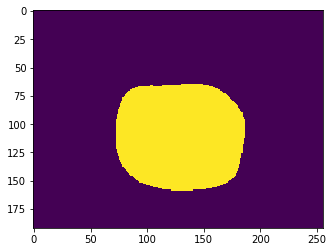

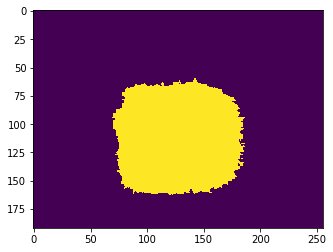

0.7301352867713341  step number is  3600  batch_size is  16
Currently on step 3700
the time is  841.9708660000015 

Avg Jacc is:


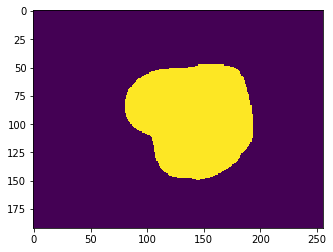

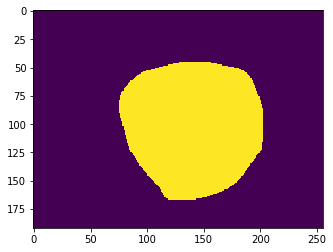

0.7285440298227164  step number is  3700  batch_size is  16
Currently on step 3800
the time is  864.9002250000012 

Avg Jacc is:


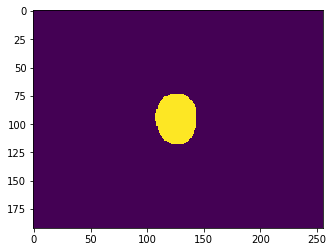

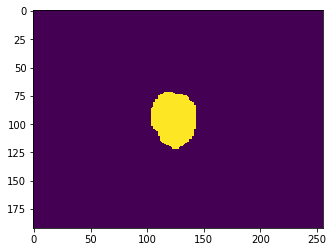

0.7314596322866587  step number is  3800  batch_size is  16
Currently on step 3900
the time is  887.7144550000012 

Avg Jacc is:


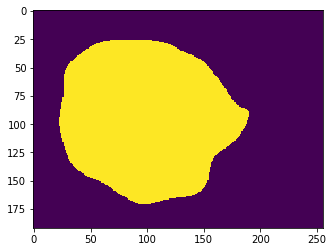

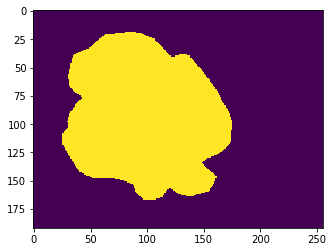

0.7238926227276142  step number is  3900  batch_size is  16
Currently on step 4000
the time is  910.5437780000011 

Avg Jacc is:


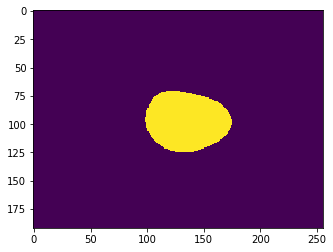

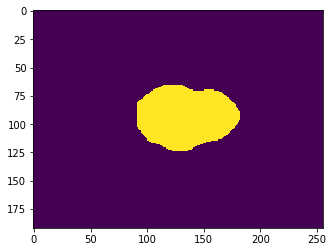

0.7334519606370192  step number is  4000  batch_size is  16
Currently on step 4100
the time is  933.317081000001 

Avg Jacc is:


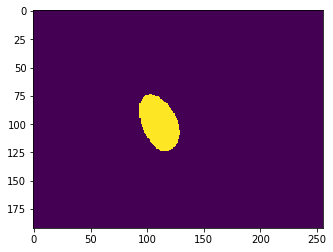

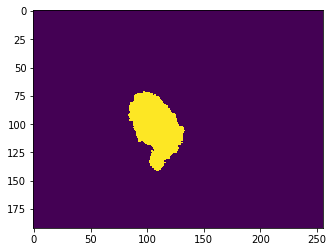

0.7308786245492789  step number is  4100  batch_size is  16
Currently on step 4200
the time is  956.0695650000016 

Avg Jacc is:


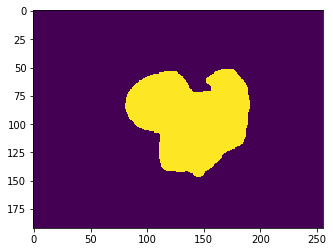

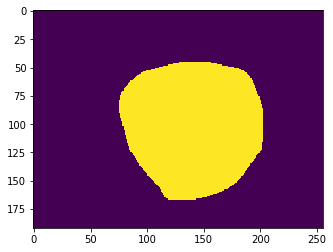

0.7380506075345553  step number is  4200  batch_size is  16
Currently on step 4300
the time is  978.8232440000011 

Avg Jacc is:


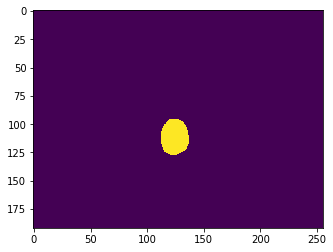

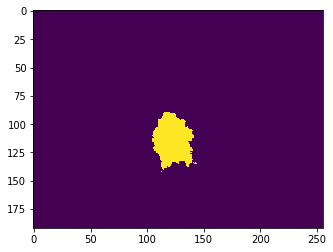

0.7280890831580529  step number is  4300  batch_size is  16
Currently on step 4400
the time is  1001.5876980000012 

Avg Jacc is:


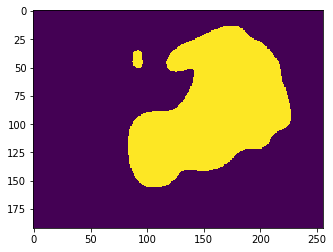

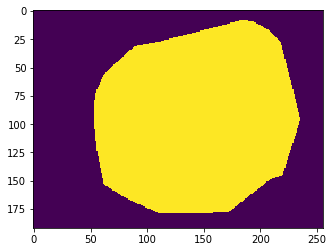

0.7213482196514424  step number is  4400  batch_size is  16
Currently on step 4500
the time is  1024.3527480000012 

Avg Jacc is:


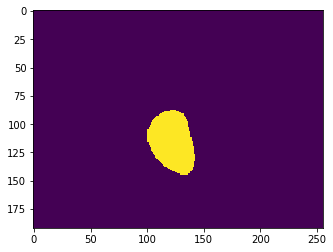

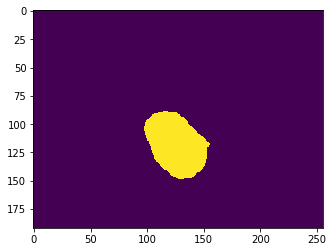

0.7162130502554086  step number is  4500  batch_size is  16
Currently on step 4600
the time is  1047.1370300000017 

Avg Jacc is:


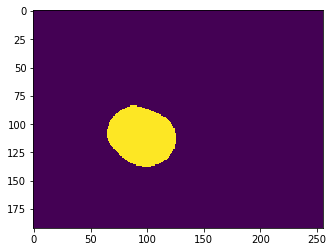

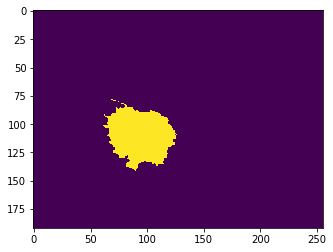

0.7135946420522836  step number is  4600  batch_size is  16
Currently on step 4700
the time is  1069.8539930000006 

Avg Jacc is:


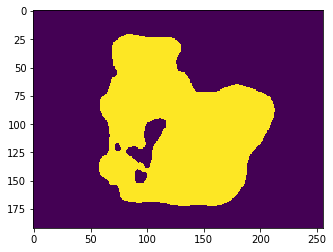

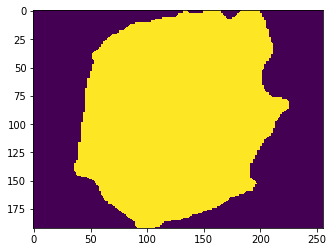

0.7337784987229568  step number is  4700  batch_size is  16
Currently on step 4800
the time is  1092.6152820000007 

Avg Jacc is:


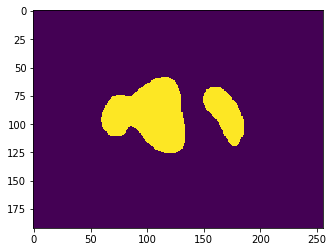

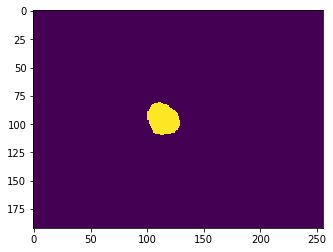

0.7060785146859976  step number is  4800  batch_size is  16
Currently on step 4900
the time is  1115.3611010000004 

Avg Jacc is:


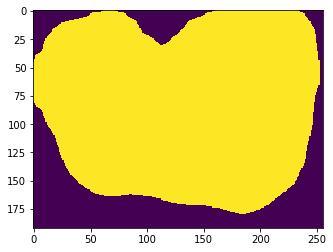

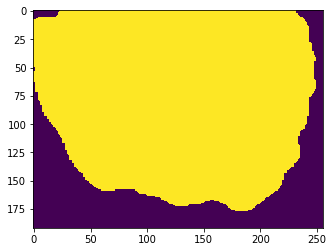

0.7224193279559795  step number is  4900  batch_size is  16
Currently on step 5000
the time is  1138.1649060000018 

Avg Jacc is:


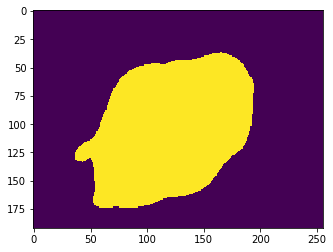

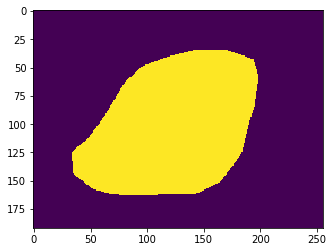

0.7373396653395433  step number is  5000  batch_size is  16
Currently on step 5100
the time is  1160.8796490000004 

Avg Jacc is:


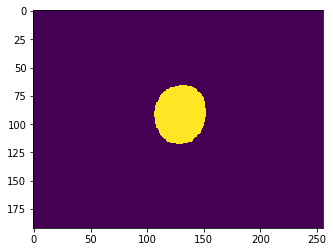

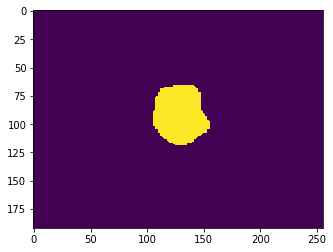

0.7356340848482572  step number is  5100  batch_size is  16
Currently on step 5200
the time is  1183.558613000001 

Avg Jacc is:


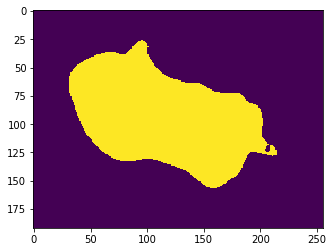

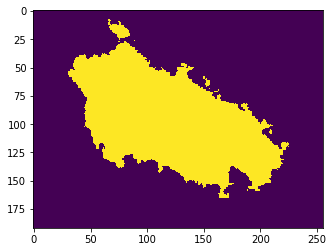

0.7225323016826923  step number is  5200  batch_size is  16
Currently on step 5300
the time is  1206.2570080000005 

Avg Jacc is:


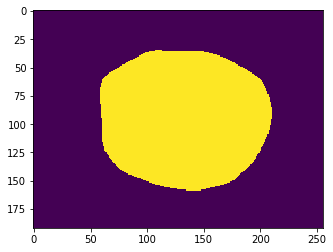

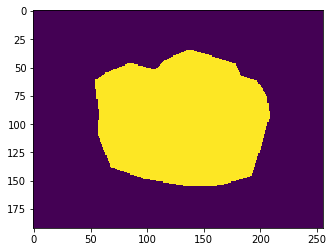

0.7304306030273438  step number is  5300  batch_size is  16
Currently on step 5400
the time is  1229.0209480000012 

Avg Jacc is:


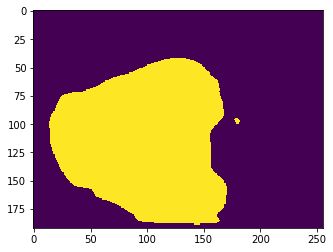

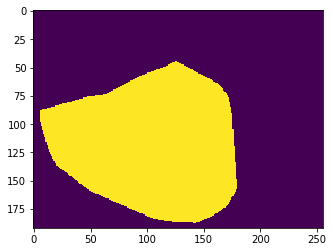

0.7313468933105469  step number is  5400  batch_size is  16
Currently on step 5500
the time is  1251.7031830000014 

Avg Jacc is:


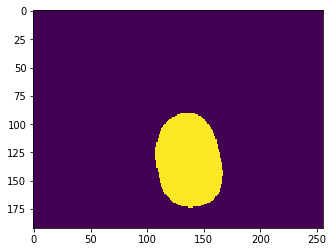

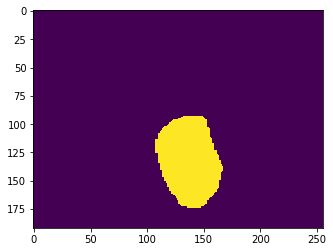

0.7121170630821815  step number is  5500  batch_size is  16
Currently on step 5600
the time is  1274.489665000001 

Avg Jacc is:


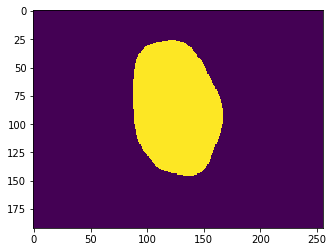

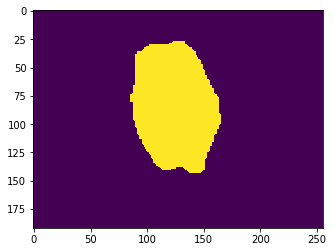

0.7214741633488582  step number is  5600  batch_size is  16
Currently on step 5700
the time is  1297.2366370000018 

Avg Jacc is:


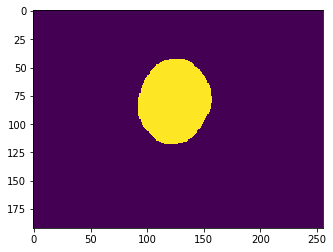

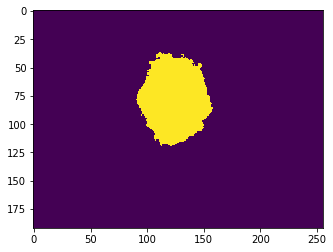

0.740313720703125  step number is  5700  batch_size is  16
Currently on step 5800
the time is  1319.9436580000001 

Avg Jacc is:


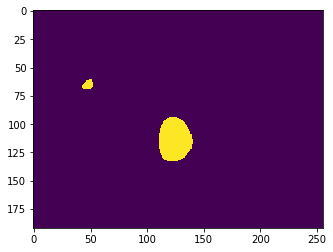

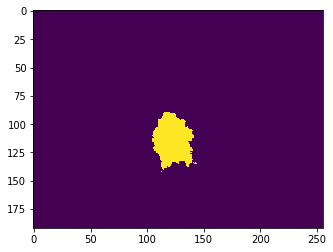

0.7478550250713641  step number is  5800  batch_size is  16
Currently on step 5900
the time is  1342.6321000000007 

Avg Jacc is:


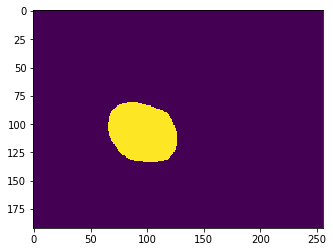

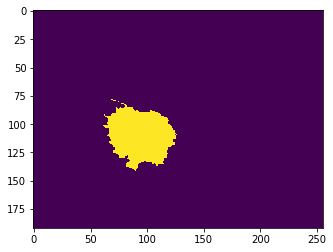

0.7344354482797476  step number is  5900  batch_size is  16
Currently on step 6000
the time is  1365.3768160000018 

Avg Jacc is:


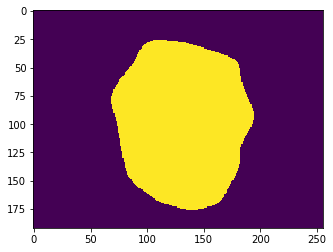

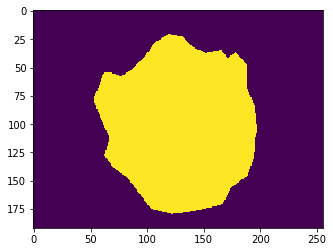

0.7474631089430589  step number is  6000  batch_size is  16
Currently on step 6100
the time is  1388.279391 

Avg Jacc is:


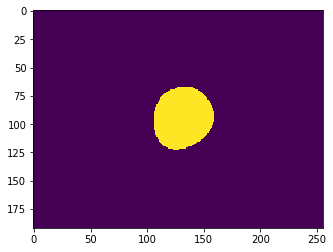

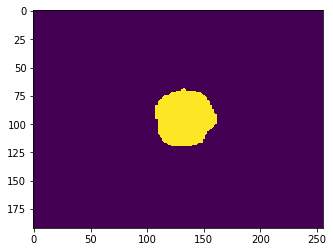

0.7327500563401442  step number is  6100  batch_size is  16
Currently on step 6200
the time is  1411.0164000000004 

Avg Jacc is:


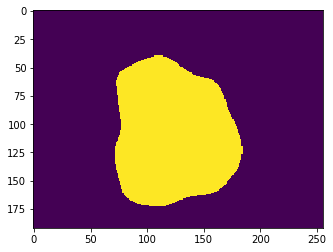

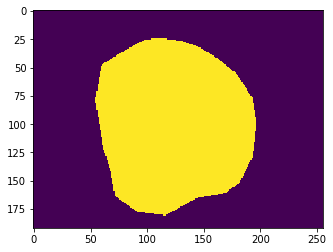

0.7294104942908654  step number is  6200  batch_size is  16
Currently on step 6300
the time is  1433.7631760000004 

Avg Jacc is:


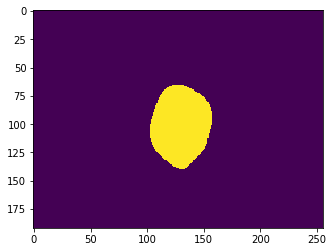

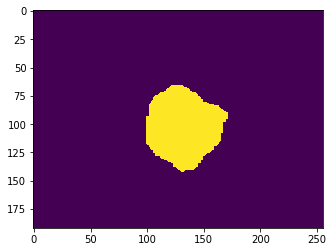

0.742988762488732  step number is  6300  batch_size is  16
Currently on step 6400
the time is  1456.5141270000004 

Avg Jacc is:


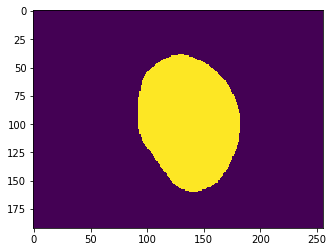

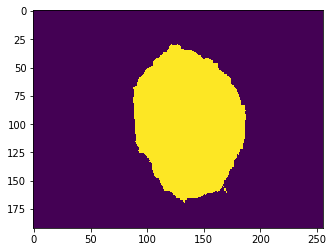

0.6722666813777043  step number is  6400  batch_size is  16
Currently on step 6500
the time is  1479.200624000001 

Avg Jacc is:


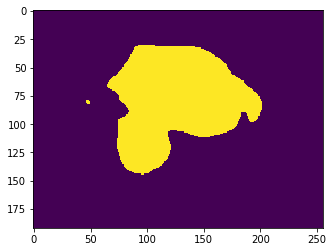

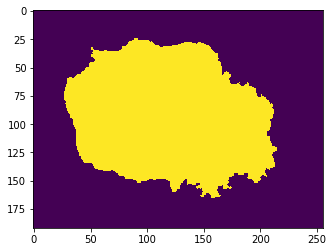

0.7052864661583533  step number is  6500  batch_size is  16
Currently on step 6600
the time is  1502.003995000001 

Avg Jacc is:


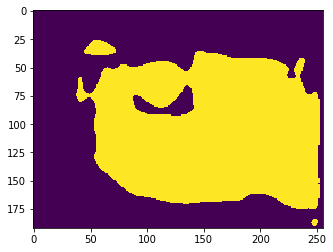

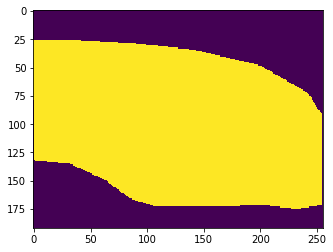

0.7381946270282452  step number is  6600  batch_size is  16
Currently on step 6700
the time is  1524.710296000001 

Avg Jacc is:


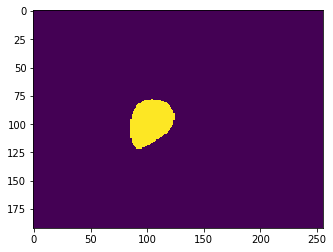

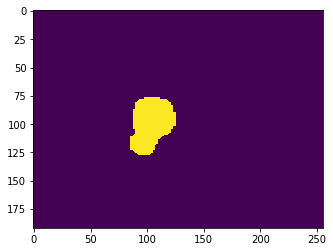

0.7341185349684495  step number is  6700  batch_size is  16
Currently on step 6800
the time is  1547.4118270000017 

Avg Jacc is:


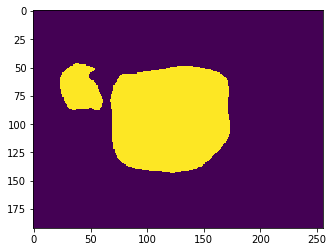

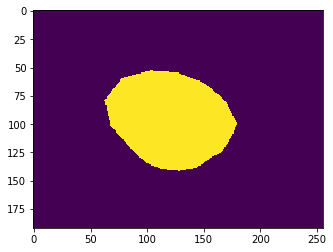

0.7480947641225961  step number is  6800  batch_size is  16
Currently on step 6900
the time is  1570.2071890000007 

Avg Jacc is:


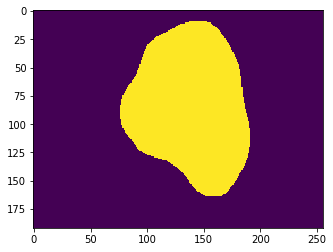

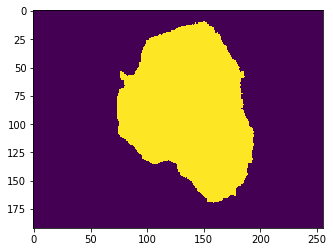

0.7228321955754207  step number is  6900  batch_size is  16
Currently on step 7000
the time is  1592.9387960000004 

Avg Jacc is:


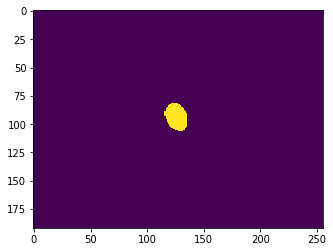

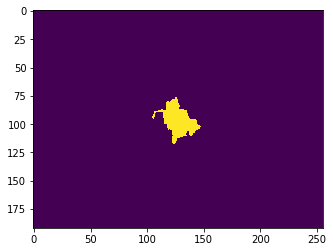

0.7127946120042067  step number is  7000  batch_size is  16
Currently on step 7100
the time is  1615.6740410000002 

Avg Jacc is:


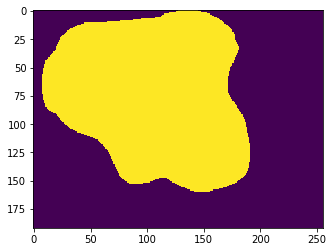

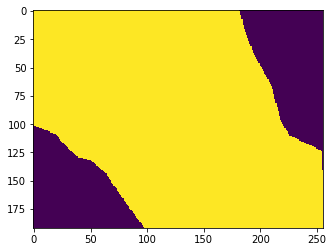

0.7382881751427284  step number is  7100  batch_size is  16
Currently on step 7200
the time is  1638.4690200000005 

Avg Jacc is:


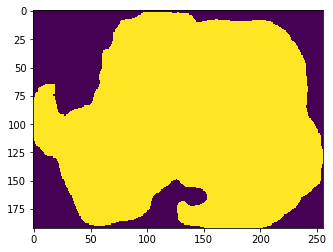

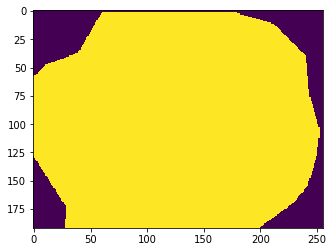

0.7384853656475361  step number is  7200  batch_size is  16
Currently on step 7300
the time is  1661.309510000001 

Avg Jacc is:


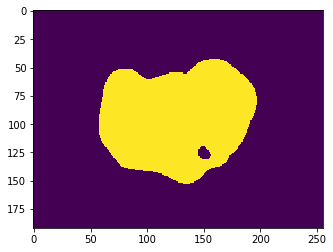

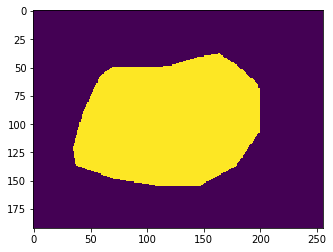

0.7201572711651142  step number is  7300  batch_size is  16
Currently on step 7400
the time is  1684.0433790000006 

Avg Jacc is:


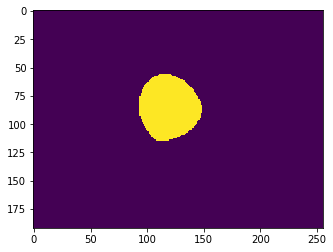

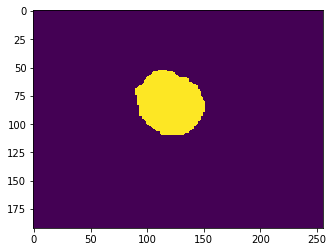

0.7264743511493389  step number is  7400  batch_size is  16
Currently on step 7500
the time is  1706.8639510000012 

Avg Jacc is:


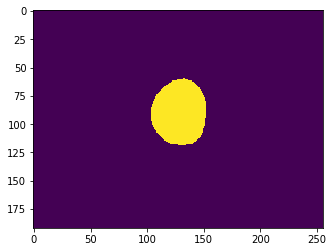

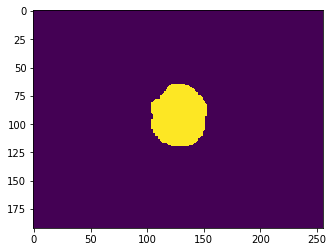

0.7366458599384015  step number is  7500  batch_size is  16
Currently on step 7600
the time is  1729.6594490000007 

Avg Jacc is:


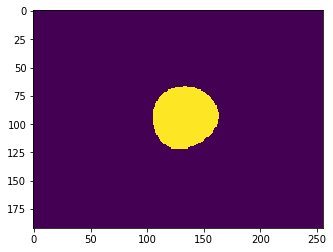

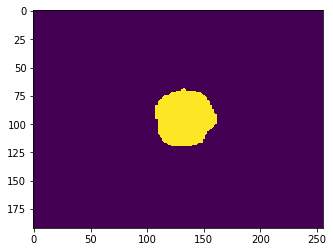

0.7362169705904447  step number is  7600  batch_size is  16
Currently on step 7700
the time is  1752.3962790000005 

Avg Jacc is:


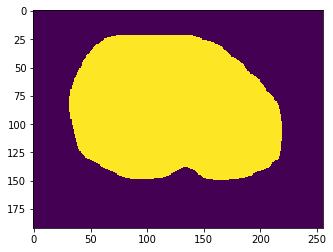

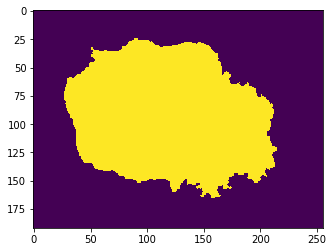

0.7270750779371995  step number is  7700  batch_size is  16
Currently on step 7800
the time is  1775.1832130000003 

Avg Jacc is:


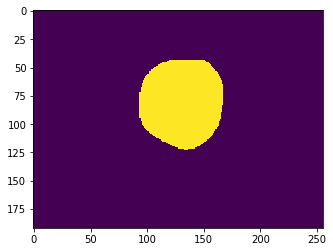

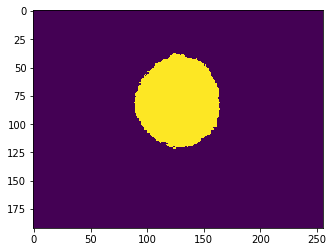

0.7117689866286058  step number is  7800  batch_size is  16
Currently on step 7900
the time is  1797.9074140000012 

Avg Jacc is:


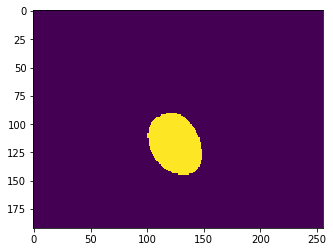

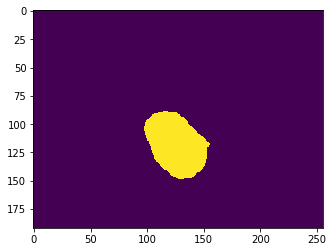

0.7328429002028245  step number is  7900  batch_size is  16
Currently on step 8000
the time is  1820.630572 

Avg Jacc is:


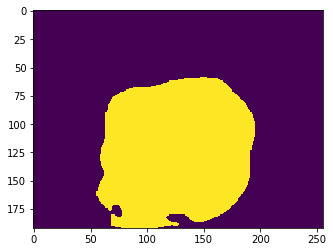

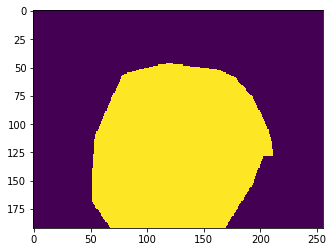

0.7384678767277644  step number is  8000  batch_size is  16
Currently on step 8100
the time is  1843.379608000001 

Avg Jacc is:


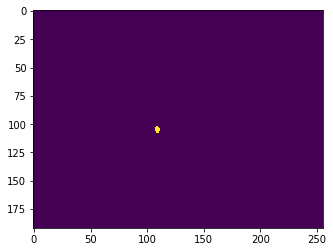

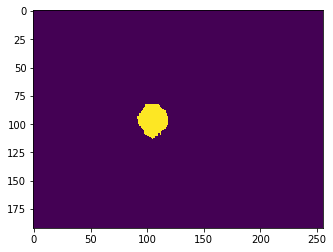

0.7339920043945313  step number is  8100  batch_size is  16
Currently on step 8200
the time is  1866.1009160000012 

Avg Jacc is:


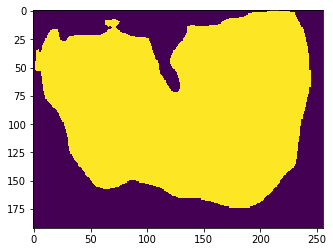

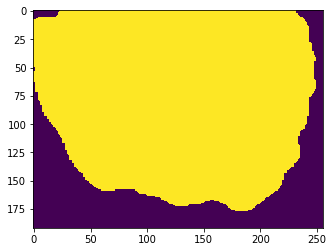

0.7323568490835336  step number is  8200  batch_size is  16
Currently on step 8300
the time is  1888.8652140000013 

Avg Jacc is:


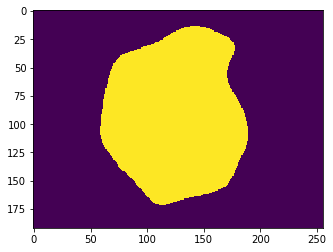

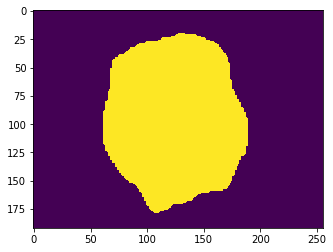

0.7195352994478665  step number is  8300  batch_size is  16
Currently on step 8400
the time is  1911.7014960000015 

Avg Jacc is:


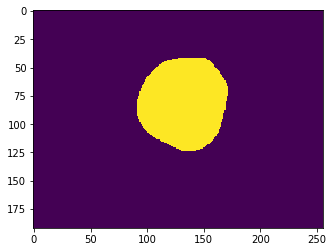

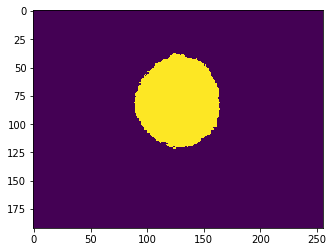

0.7394005408653846  step number is  8400  batch_size is  16
Currently on step 8500
the time is  1934.4176630000002 

Avg Jacc is:


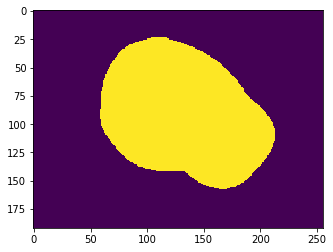

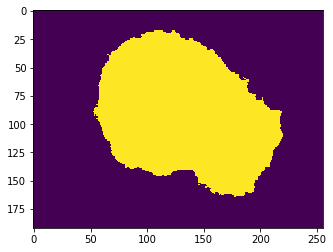

0.7274685199444111  step number is  8500  batch_size is  16
Currently on step 8600
the time is  1957.2276430000002 

Avg Jacc is:


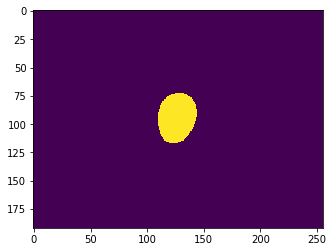

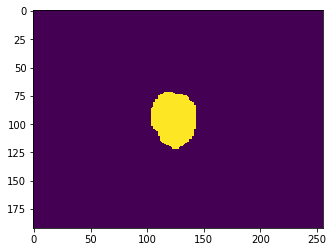

0.7245000985952524  step number is  8600  batch_size is  16
Currently on step 8700
the time is  1979.8474760000008 

Avg Jacc is:


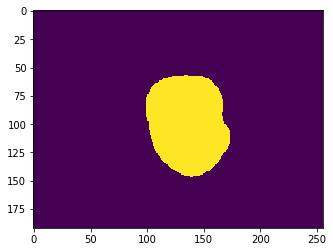

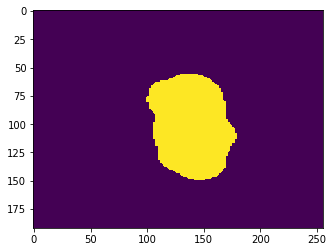

0.7340263953575721  step number is  8700  batch_size is  16
Currently on step 8800
the time is  2002.5464420000008 

Avg Jacc is:


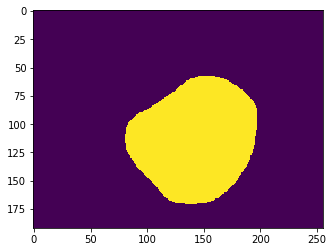

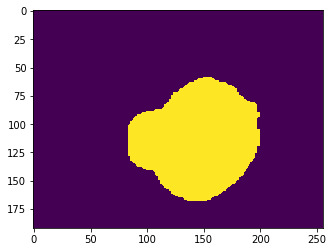

0.7432467533991887  step number is  8800  batch_size is  16
Currently on step 8900
the time is  2025.2880920000007 

Avg Jacc is:


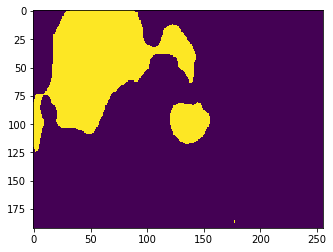

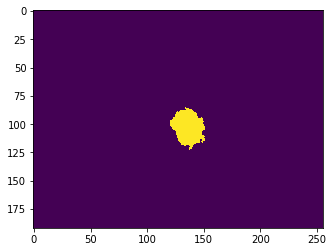

0.7390164888822115  step number is  8900  batch_size is  16
Currently on step 9000
the time is  2047.9915290000008 

Avg Jacc is:


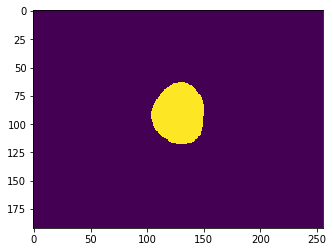

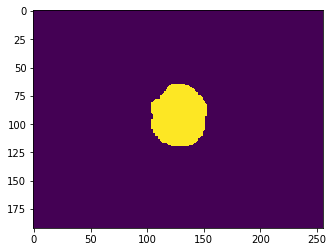

0.7052254310021033  step number is  9000  batch_size is  16
Currently on step 9100
the time is  2070.6844920000003 

Avg Jacc is:


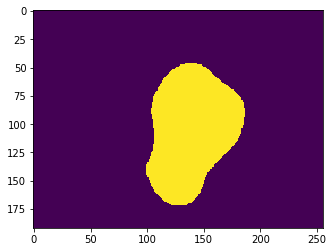

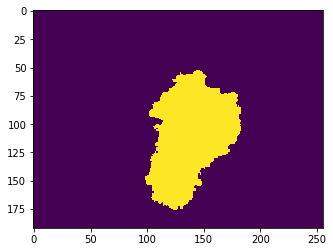

0.7243981581467849  step number is  9100  batch_size is  16
Currently on step 9200
the time is  2093.3942380000008 

Avg Jacc is:


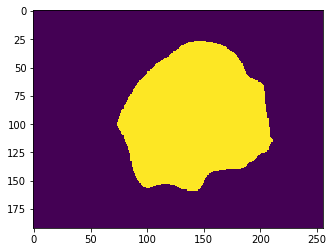

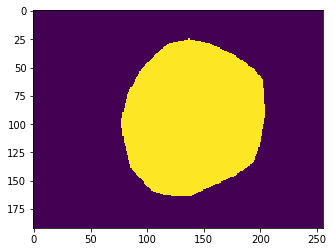

0.7329243586613582  step number is  9200  batch_size is  16
Currently on step 9300
the time is  2116.1451190000007 

Avg Jacc is:


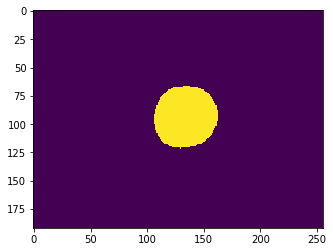

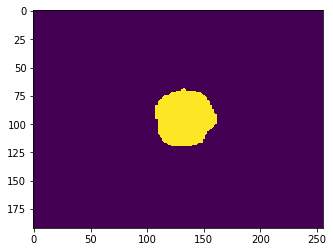

0.7275377713716947  step number is  9300  batch_size is  16
Currently on step 9400
the time is  2138.7669860000005 

Avg Jacc is:


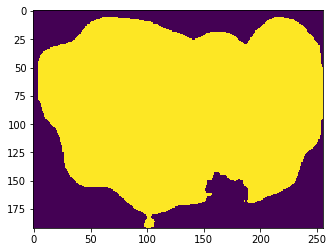

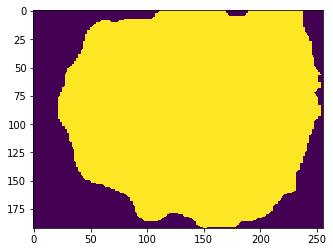

0.7346426743727464  step number is  9400  batch_size is  16
Currently on step 9500
the time is  2161.4537870000004 

Avg Jacc is:


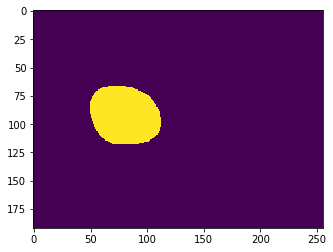

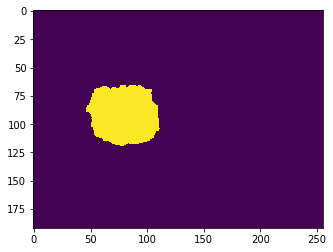

0.7275069016676683  step number is  9500  batch_size is  16
Currently on step 9600
the time is  2184.303667 

Avg Jacc is:


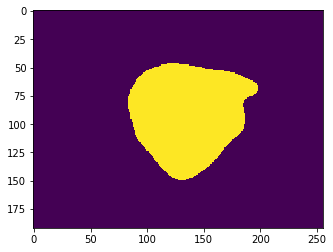

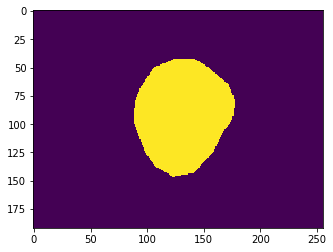

0.7235945481520433  step number is  9600  batch_size is  16
Currently on step 9700
the time is  2206.830777000001 

Avg Jacc is:


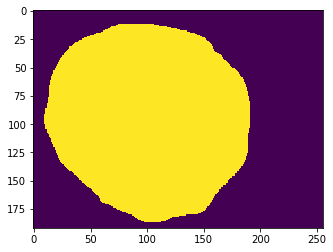

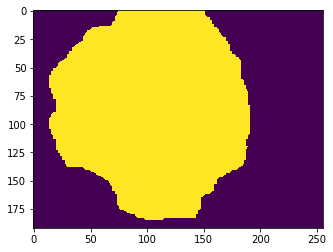

0.7280653733473558  step number is  9700  batch_size is  16
Currently on step 9800
the time is  2230.6719620000003 

Avg Jacc is:


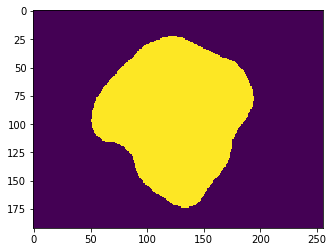

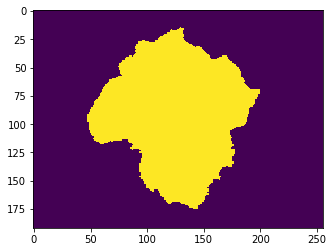

0.6929678696852464  step number is  9800  batch_size is  16
Currently on step 9900
the time is  2253.3355410000004 

Avg Jacc is:


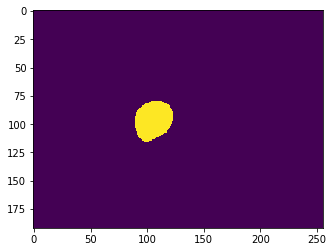

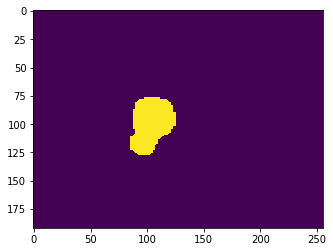

0.7083966768704928  step number is  9900  batch_size is  16
Currently on step 10000
the time is  2275.9808870000015 

Avg Jacc is:


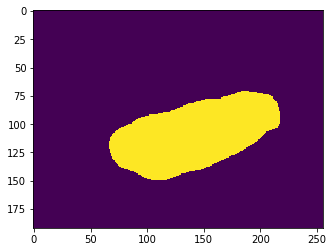

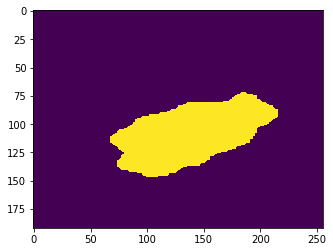

0.7346901526817908  step number is  10000  batch_size is  16
Currently on step 10100
the time is  2298.6174980000014 

Avg Jacc is:


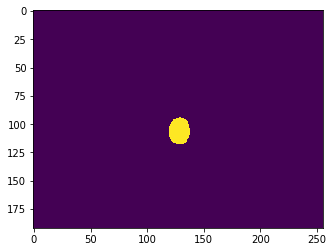

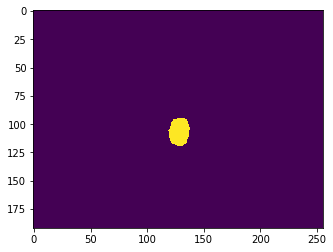

0.7323866624098557  step number is  10100  batch_size is  16
Currently on step 10200
the time is  2321.2258100000017 

Avg Jacc is:


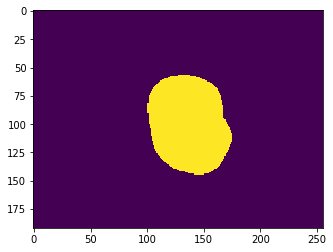

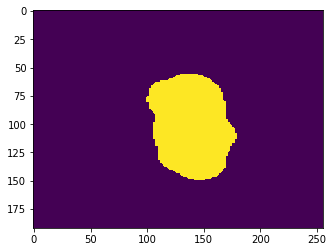

0.7224114051231971  step number is  10200  batch_size is  16
Currently on step 10300
the time is  2343.9584620000005 

Avg Jacc is:


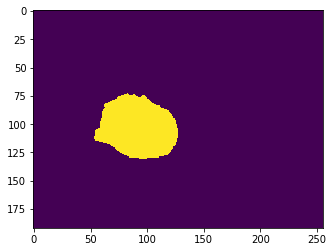

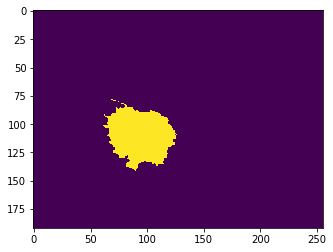

0.7125968346228966  step number is  10300  batch_size is  16
Currently on step 10400
the time is  2366.6798390000004 

Avg Jacc is:


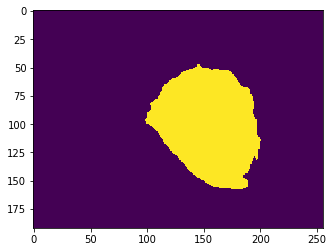

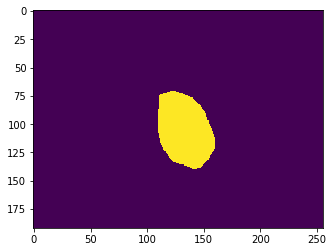

0.7307326096754808  step number is  10400  batch_size is  16
Currently on step 10500
the time is  2389.4706240000014 

Avg Jacc is:


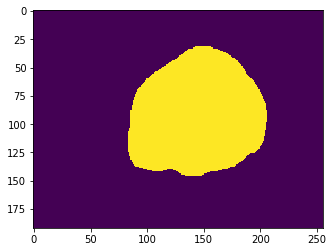

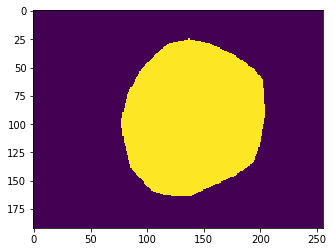

0.7321772648737981  step number is  10500  batch_size is  16
Currently on step 10600
the time is  2412.2289610000007 

Avg Jacc is:


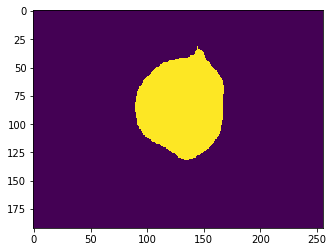

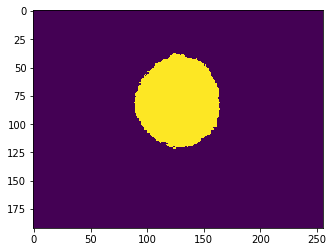

0.7244657076322115  step number is  10600  batch_size is  16
Currently on step 10700
the time is  2435.2270050000025 

Avg Jacc is:


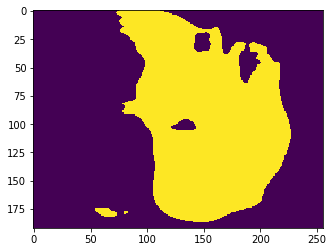

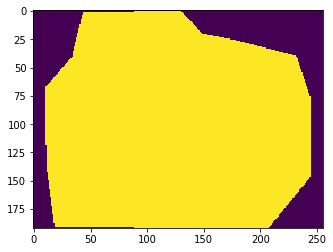

0.7285167987530048  step number is  10700  batch_size is  16
Currently on step 10800
the time is  2457.869917000002 

Avg Jacc is:


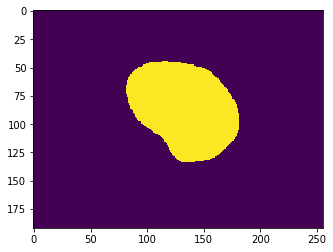

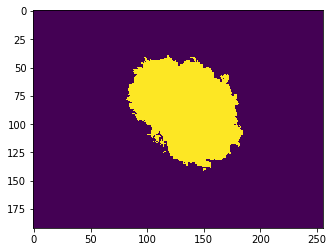

0.7346665602463942  step number is  10800  batch_size is  16
Currently on step 10900
the time is  2480.5892299999996 

Avg Jacc is:


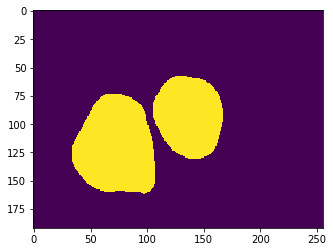

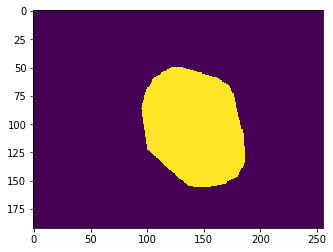

0.731005624624399  step number is  10900  batch_size is  16
Currently on step 11000
the time is  2503.2054050000024 

Avg Jacc is:


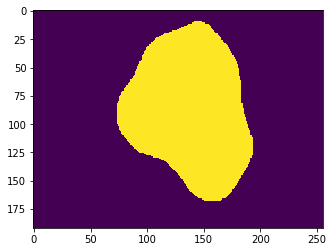

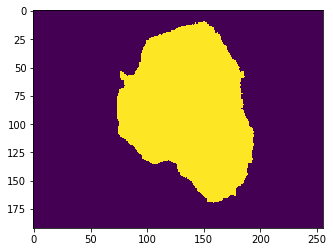

0.7400436401367188  step number is  11000  batch_size is  16
Currently on step 11100
the time is  2525.7746160000006 

Avg Jacc is:


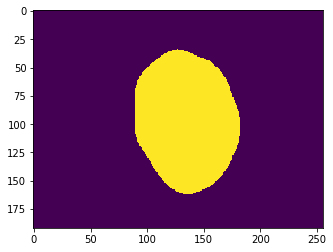

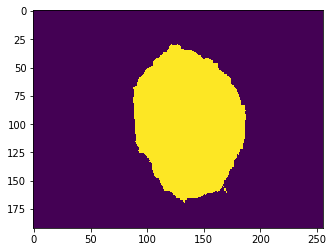

0.7250572791466346  step number is  11100  batch_size is  16
Currently on step 11200
the time is  2548.578577000002 

Avg Jacc is:


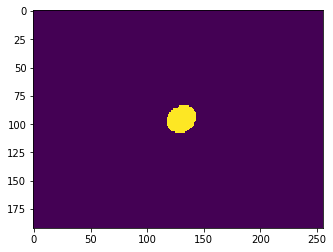

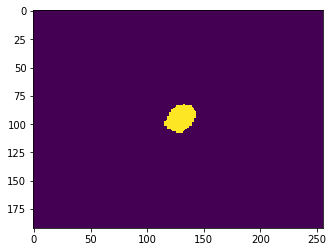

0.7039387629582332  step number is  11200  batch_size is  16
Currently on step 11300
the time is  2571.3425000000007 

Avg Jacc is:


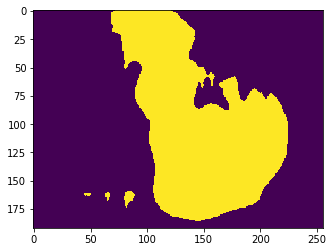

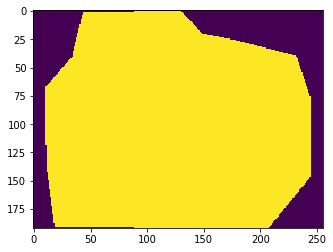

0.735693594125601  step number is  11300  batch_size is  16
Currently on step 11400
the time is  2594.0268330000017 

Avg Jacc is:


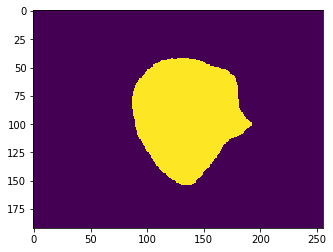

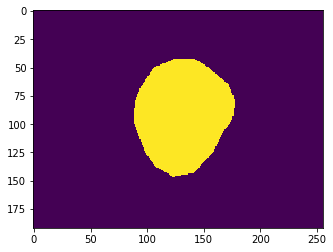

0.7375680776742789  step number is  11400  batch_size is  16
Currently on step 11500
the time is  2616.8458450000016 

Avg Jacc is:


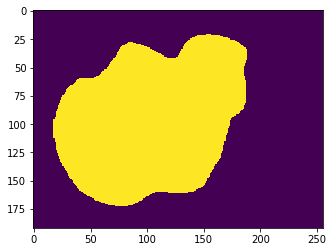

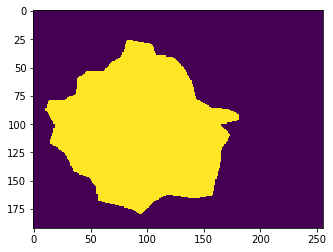

0.7287653996394231  step number is  11500  batch_size is  16
Currently on step 11600
the time is  2639.7702670000017 

Avg Jacc is:


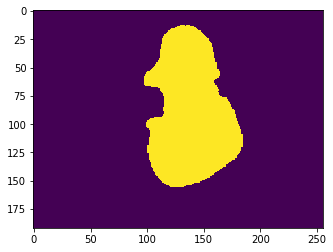

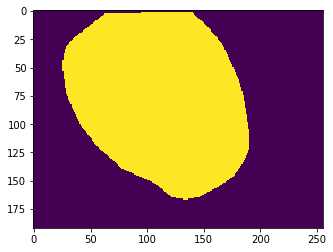

0.7201958289513222  step number is  11600  batch_size is  16
Currently on step 11700
the time is  2662.739925 

Avg Jacc is:


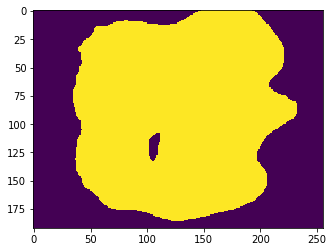

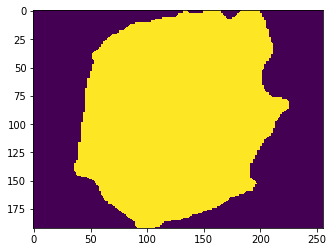

0.7257533146784856  step number is  11700  batch_size is  16
Currently on step 11800
the time is  2685.489426000002 

Avg Jacc is:


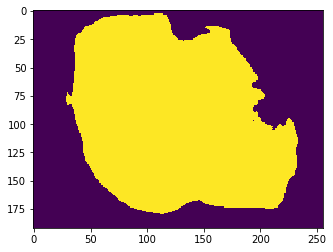

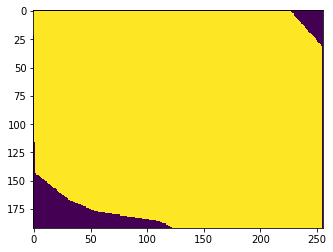

0.7314588693472055  step number is  11800  batch_size is  16
Currently on step 11900
the time is  2708.397701 

Avg Jacc is:


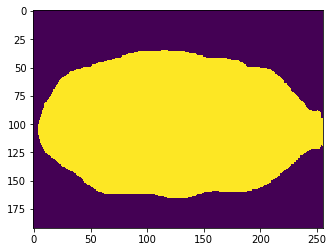

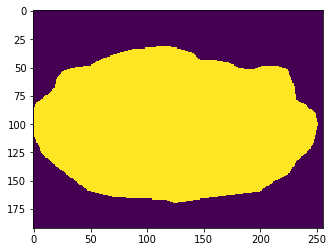

0.7308582012469952  step number is  11900  batch_size is  16
Currently on step 12000
the time is  2731.362217 

Avg Jacc is:


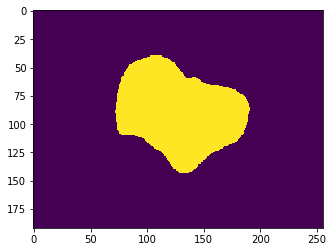

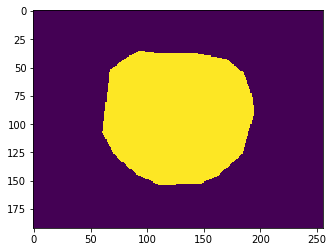

0.7233439518855168  step number is  12000  batch_size is  16
Currently on step 12100
the time is  2753.955436000002 

Avg Jacc is:


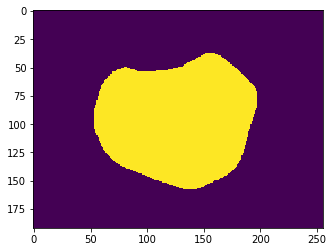

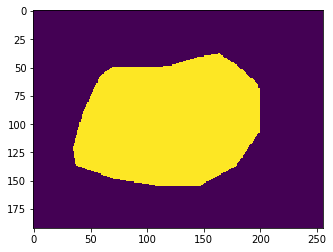

0.7155324495755709  step number is  12100  batch_size is  16
Currently on step 12200
the time is  2776.6863749999993 

Avg Jacc is:


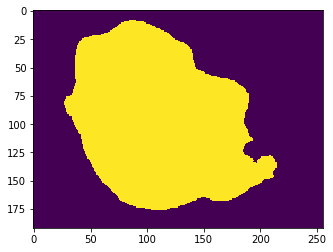

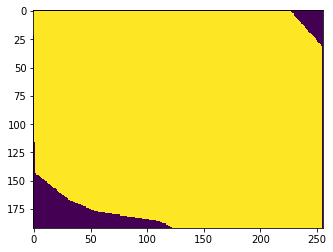

0.7167381873497596  step number is  12200  batch_size is  16
Currently on step 12300
the time is  2799.3604350000005 

Avg Jacc is:


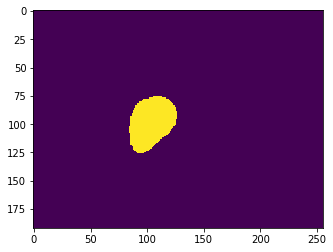

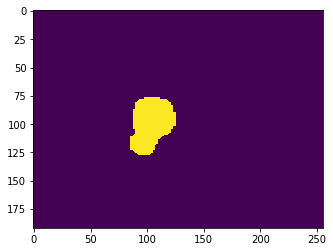

0.727698751596304  step number is  12300  batch_size is  16
Currently on step 12400
the time is  2821.943357000002 

Avg Jacc is:


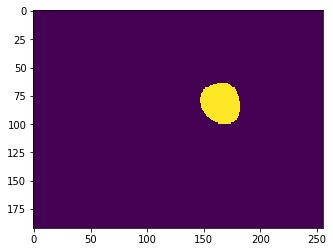

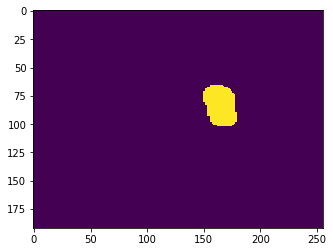

0.7252869826096755  step number is  12400  batch_size is  16
Currently on step 12500
the time is  2844.5040640000025 

Avg Jacc is:


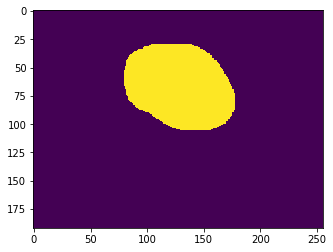

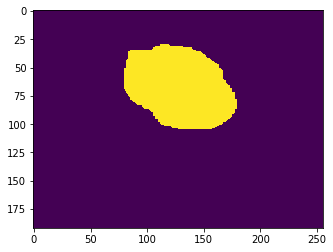

0.7313124436598558  step number is  12500  batch_size is  16
Currently on step 12600
the time is  2867.213804000001 

Avg Jacc is:


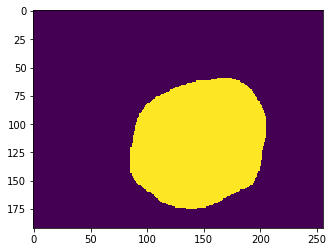

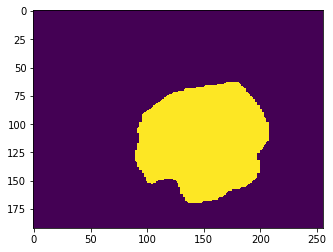

0.7181586045485276  step number is  12600  batch_size is  16
Currently on step 12700
the time is  2890.171286999999 

Avg Jacc is:


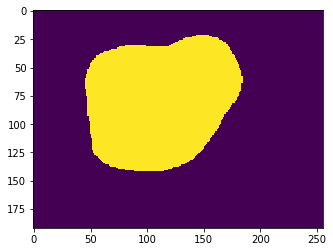

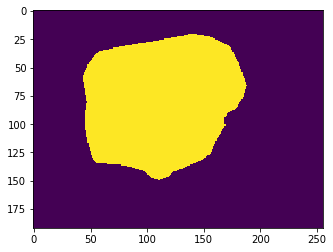

0.7284420306865985  step number is  12700  batch_size is  16
Currently on step 12800
the time is  2912.8313050000015 

Avg Jacc is:


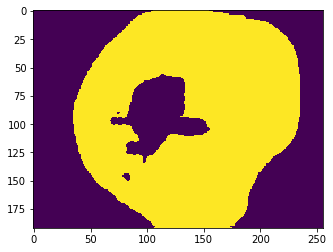

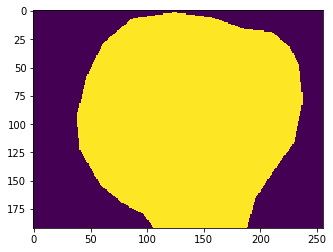

0.734183091383714  step number is  12800  batch_size is  16
Currently on step 12900
the time is  2935.396007000001 

Avg Jacc is:


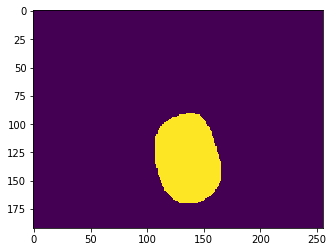

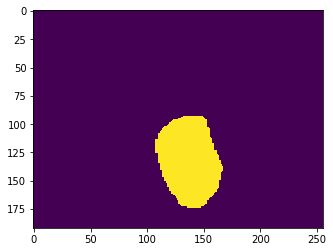

0.7326112600473257  step number is  12900  batch_size is  16
Currently on step 13000
the time is  2958.0177540000022 

Avg Jacc is:


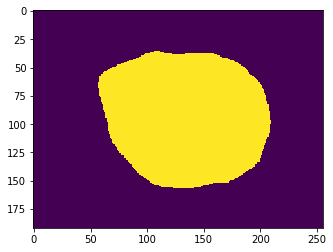

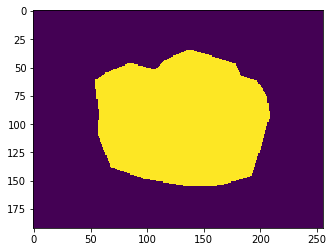

0.7279148982121394  step number is  13000  batch_size is  16
Currently on step 13100
the time is  2980.771081000001 

Avg Jacc is:


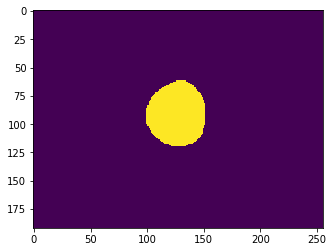

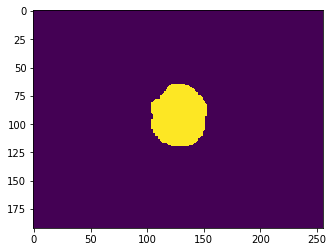

0.7400618333082932  step number is  13100  batch_size is  16
Currently on step 13200
the time is  3003.3549040000016 

Avg Jacc is:


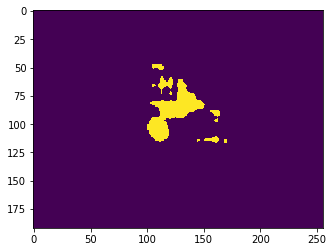

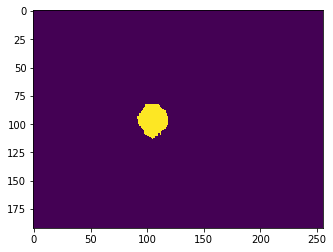

0.7312096228966346  step number is  13200  batch_size is  16
Currently on step 13300
the time is  3025.825122 

Avg Jacc is:


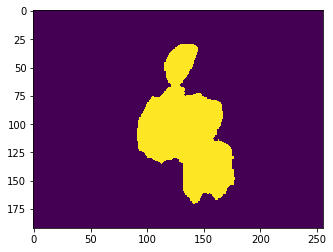

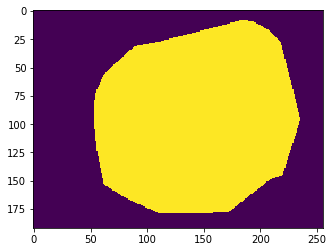

0.7418979351337139  step number is  13300  batch_size is  16
Currently on step 13400
the time is  3048.2739630000015 

Avg Jacc is:


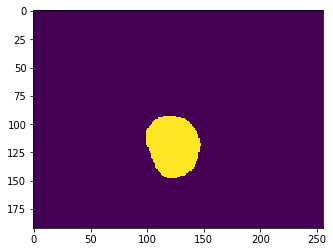

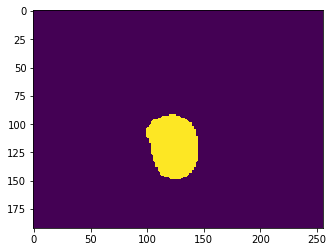

0.7413392287034255  step number is  13400  batch_size is  16
Currently on step 13500
the time is  3070.845406000002 

Avg Jacc is:


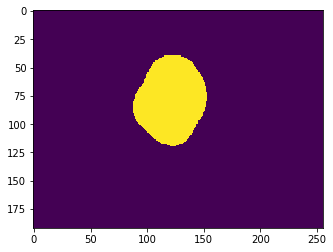

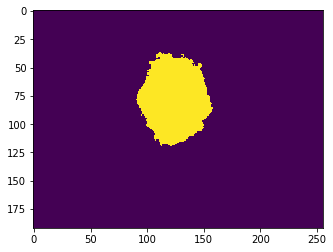

0.7309918917142428  step number is  13500  batch_size is  16
Currently on step 13600
the time is  3093.512445000002 

Avg Jacc is:


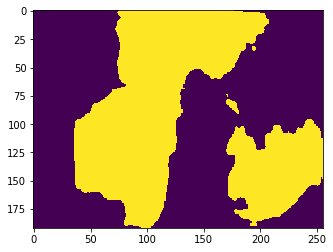

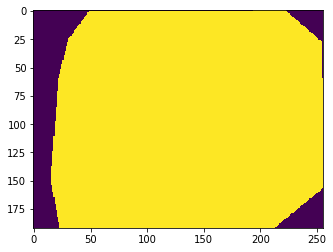

0.7266765887920673  step number is  13600  batch_size is  16
Currently on step 13700
the time is  3116.324802000001 

Avg Jacc is:


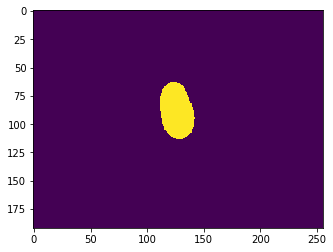

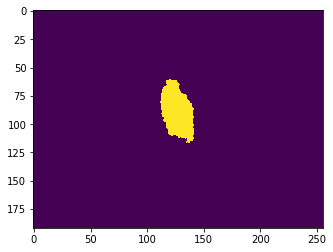

0.7237614558293269  step number is  13700  batch_size is  16
Currently on step 13800
the time is  3139.07308 

Avg Jacc is:


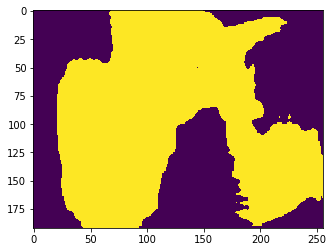

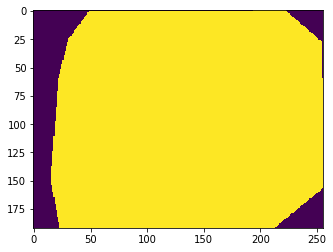

0.7433890709510216  step number is  13800  batch_size is  16
Currently on step 13900
the time is  3161.663222000001 

Avg Jacc is:


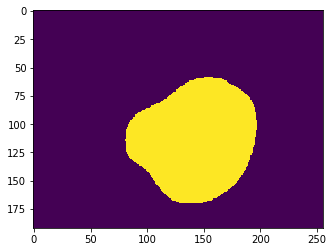

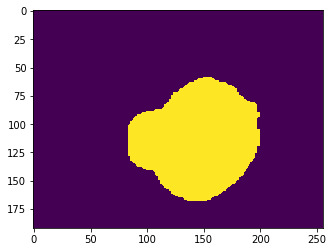

0.7289990938626802  step number is  13900  batch_size is  16
Currently on step 14000
the time is  3184.3514300000006 

Avg Jacc is:


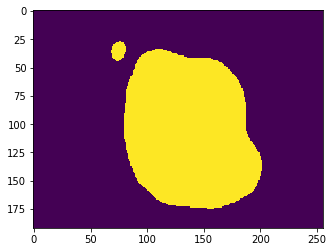

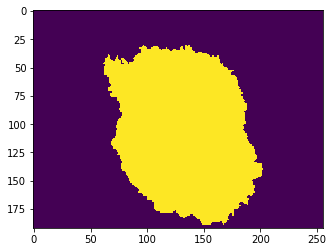

0.7279503455528846  step number is  14000  batch_size is  16
Currently on step 14100
the time is  3206.942548000001 

Avg Jacc is:


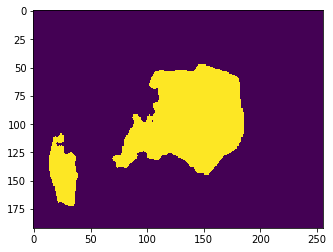

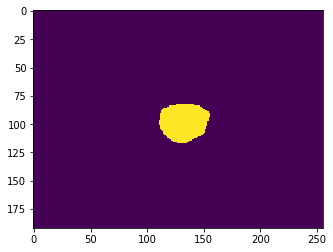

0.7257408728966346  step number is  14100  batch_size is  16
Currently on step 14200
the time is  3229.5915719999994 

Avg Jacc is:


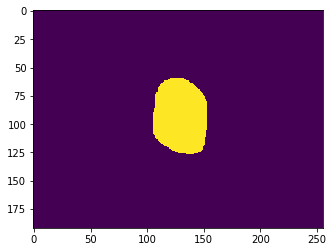

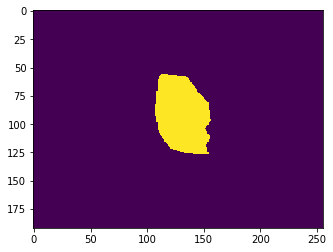

0.7343808687650241  step number is  14200  batch_size is  16
Currently on step 14300
the time is  3252.102940999999 

Avg Jacc is:


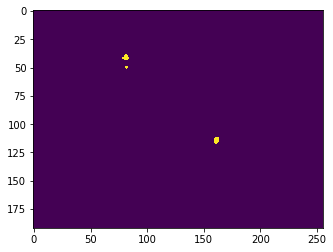

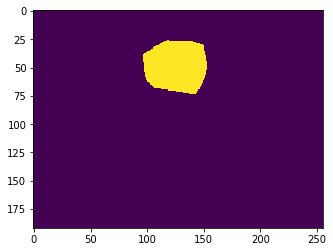

0.7369335467998798  step number is  14300  batch_size is  16
Currently on step 14400
the time is  3274.7523249999995 

Avg Jacc is:


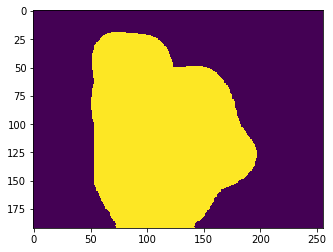

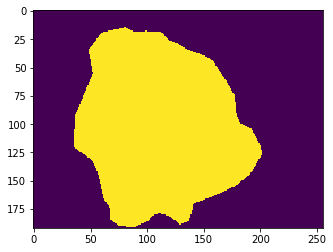

0.7325411283052885  step number is  14400  batch_size is  16
Currently on step 14500
the time is  3297.5290719999994 

Avg Jacc is:


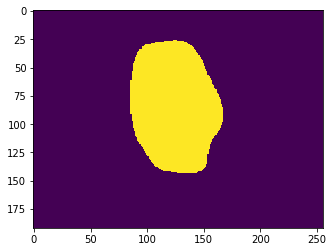

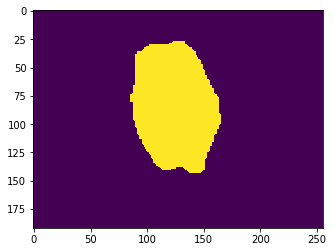

0.7336189856896034  step number is  14500  batch_size is  16
Currently on step 14600
the time is  3320.3982510000005 

Avg Jacc is:


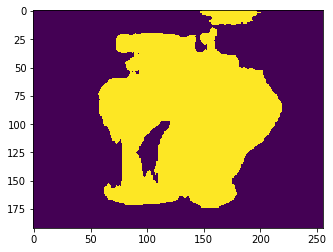

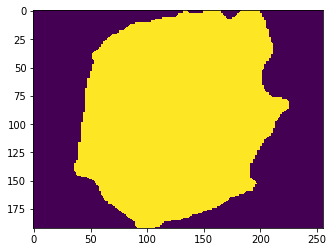

0.7198812631460336  step number is  14600  batch_size is  16
Currently on step 14700
the time is  3343.2736989999994 

Avg Jacc is:


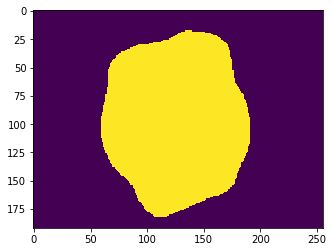

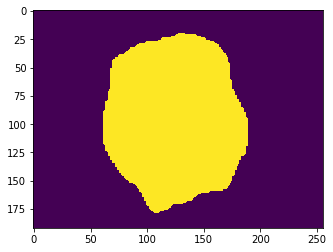

0.7275990412785457  step number is  14700  batch_size is  16
Currently on step 14800
the time is  3366.1520849999997 

Avg Jacc is:


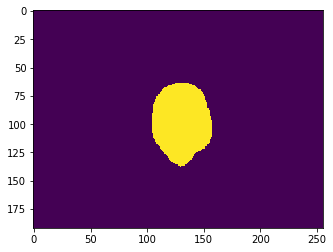

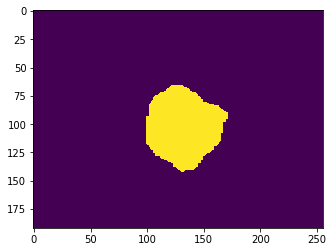

0.7391593346228966  step number is  14800  batch_size is  16
Currently on step 14900
the time is  3388.9525479999993 

Avg Jacc is:


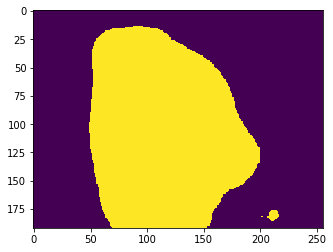

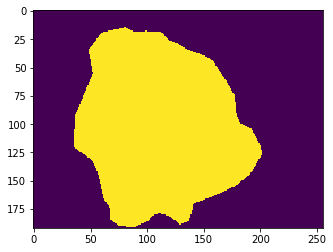

0.719610830453726  step number is  14900  batch_size is  16
Currently on step 15000
the time is  3411.7364510000025 

Avg Jacc is:


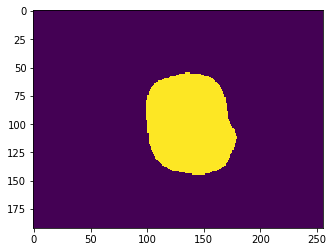

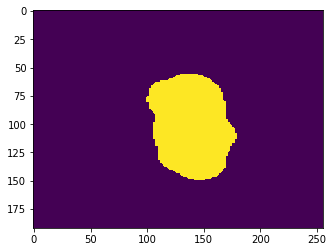

0.7408277071439303  step number is  15000  batch_size is  16
Currently on step 15100
the time is  3434.257538 

Avg Jacc is:


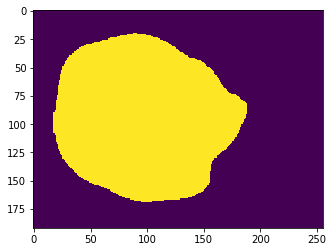

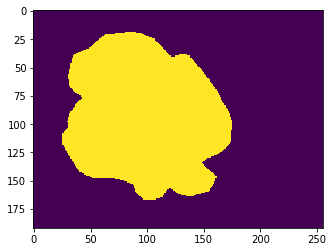

0.7381590623121995  step number is  15100  batch_size is  16
Currently on step 15200
the time is  3457.0066730000017 

Avg Jacc is:


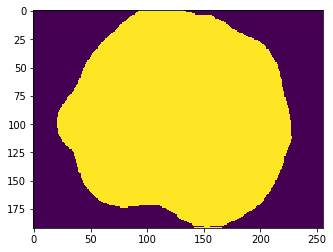

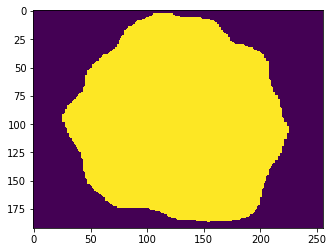

0.7355042677659255  step number is  15200  batch_size is  16
Currently on step 15300
the time is  3479.7015370000026 

Avg Jacc is:


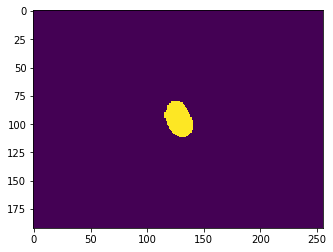

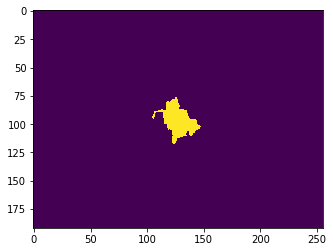

0.7440429100623498  step number is  15300  batch_size is  16
Currently on step 15400
the time is  3502.5119710000017 

Avg Jacc is:


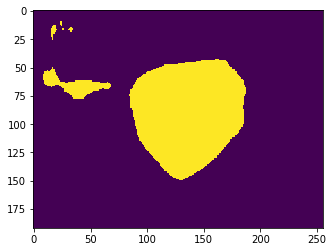

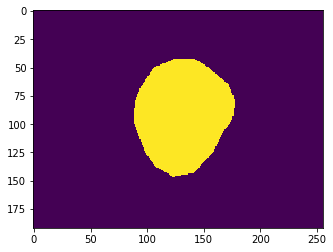

0.738131361741286  step number is  15400  batch_size is  16
Currently on step 15500
the time is  3525.07769 

Avg Jacc is:


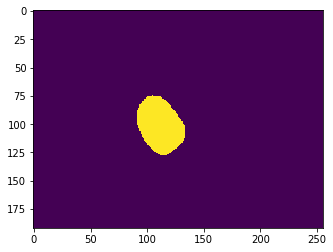

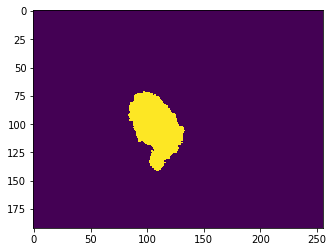

0.743735093336839  step number is  15500  batch_size is  16
Currently on step 15600
the time is  3547.7706020000023 

Avg Jacc is:


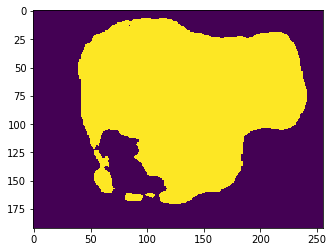

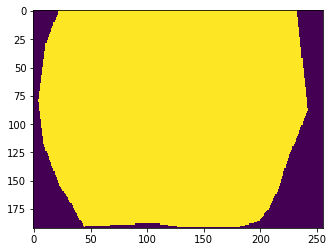

0.7452092684232272  step number is  15600  batch_size is  16
Currently on step 15700
the time is  3570.4330750000026 

Avg Jacc is:


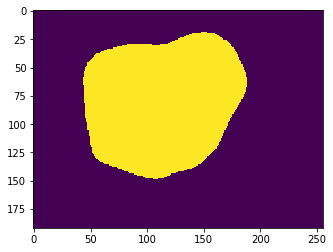

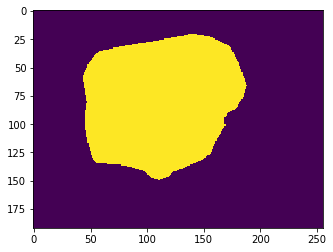

0.7301904531625601  step number is  15700  batch_size is  16
Currently on step 15800
the time is  3593.0668620000015 

Avg Jacc is:


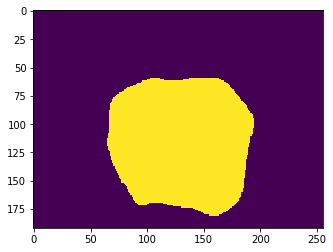

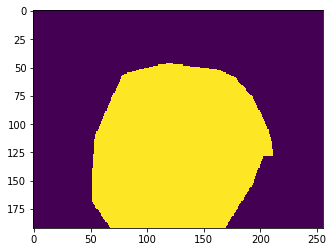

0.7223710280198318  step number is  15800  batch_size is  16
Currently on step 15900
the time is  3615.7136279999995 

Avg Jacc is:


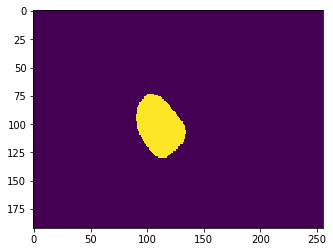

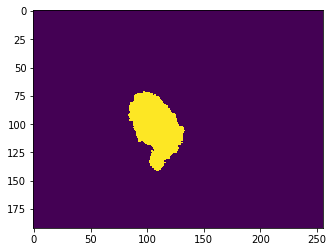

0.7382835388183594  step number is  15900  batch_size is  16
Currently on step 16000
the time is  3638.4859799999995 

Avg Jacc is:


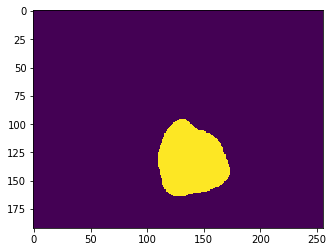

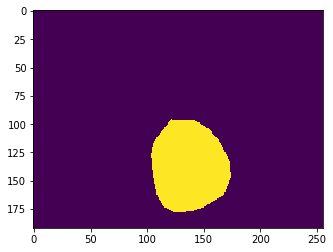

0.7101407564603366  step number is  16000  batch_size is  16
Currently on step 16100
the time is  3661.246115 

Avg Jacc is:


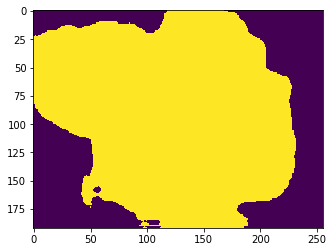

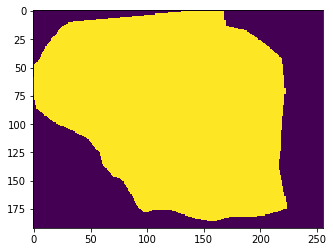

0.7186948336087741  step number is  16100  batch_size is  16
Currently on step 16200
the time is  3684.4227420000007 

Avg Jacc is:


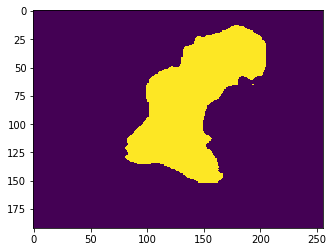

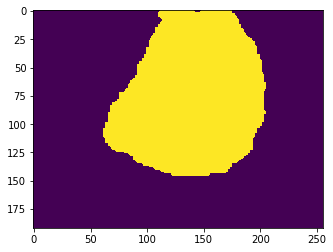

0.7212996262770432  step number is  16200  batch_size is  16
Currently on step 16300
the time is  3707.235358 

Avg Jacc is:


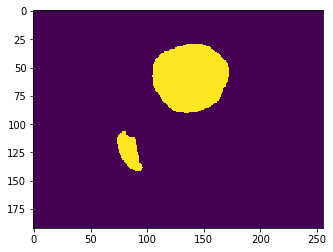

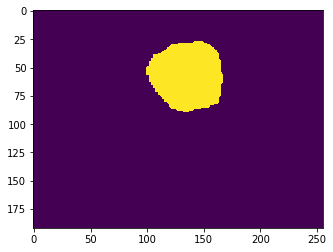

0.7347833486703726  step number is  16300  batch_size is  16
Currently on step 16400
the time is  3730.1040310000008 

Avg Jacc is:


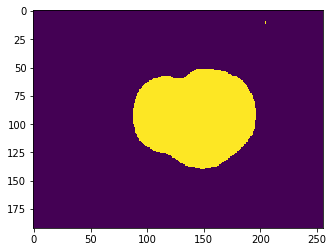

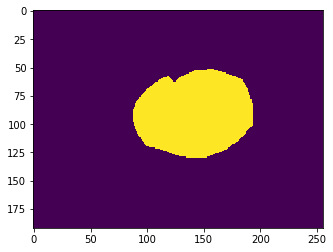

0.7372977623572716  step number is  16400  batch_size is  16
Currently on step 16500
the time is  3752.716262 

Avg Jacc is:


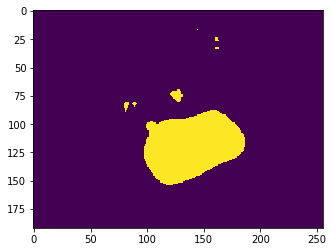

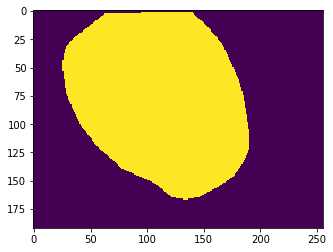

0.7386194669283354  step number is  16500  batch_size is  16
Currently on step 16600
the time is  3775.3758730000027 

Avg Jacc is:


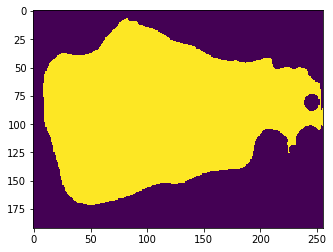

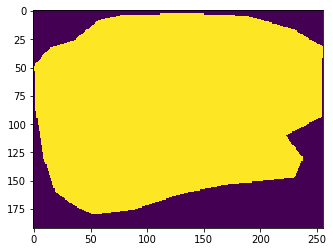

0.7441669170673076  step number is  16600  batch_size is  16
Currently on step 16700
the time is  3798.021111 

Avg Jacc is:


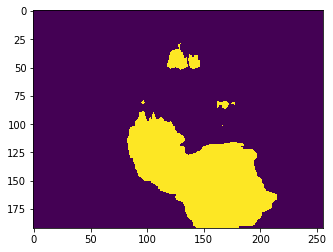

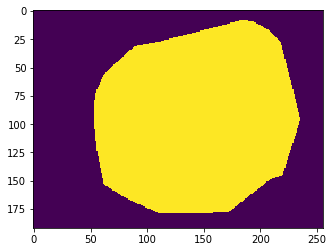

0.728363271859976  step number is  16700  batch_size is  16
Currently on step 16800
the time is  3820.8198979999997 

Avg Jacc is:


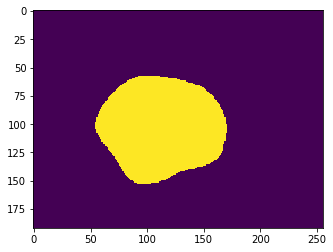

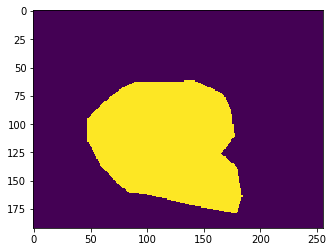

0.7088526799128606  step number is  16800  batch_size is  16
Currently on step 16900
the time is  3843.905539000001 

Avg Jacc is:


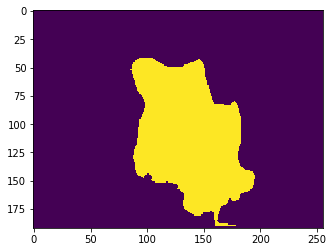

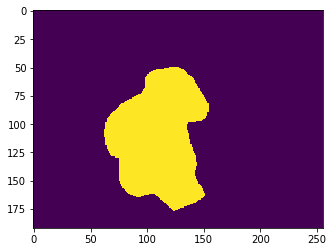

0.7147123483511117  step number is  16900  batch_size is  16
Currently on step 17000
the time is  3866.8011510000015 

Avg Jacc is:


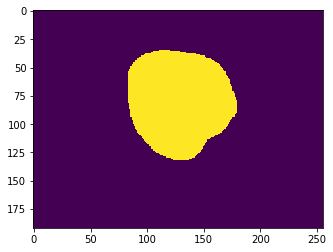

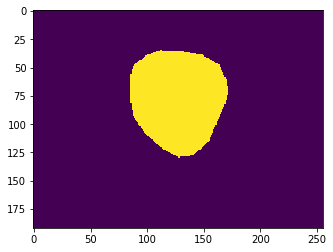

0.7231782179612379  step number is  17000  batch_size is  16
Currently on step 17100
the time is  3889.430993 

Avg Jacc is:


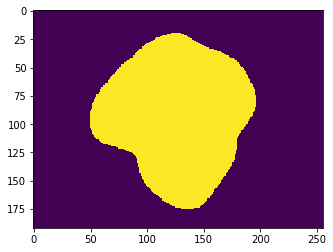

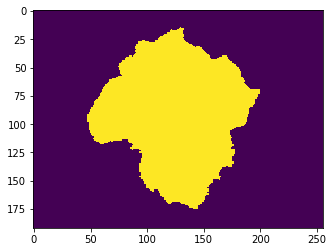

0.7405494103064904  step number is  17100  batch_size is  16
Currently on step 17200
the time is  3912.0137290000002 

Avg Jacc is:


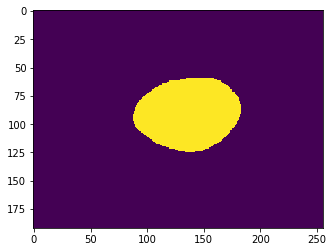

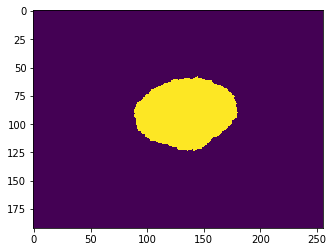

0.727182124211238  step number is  17200  batch_size is  16
Currently on step 17300
the time is  3934.7873670000026 

Avg Jacc is:


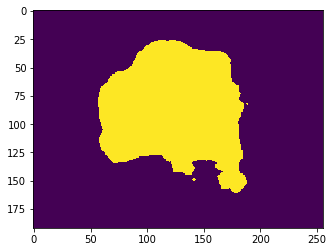

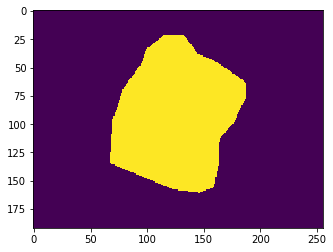

0.7288145212026743  step number is  17300  batch_size is  16
Currently on step 17400
the time is  3957.470019000002 

Avg Jacc is:


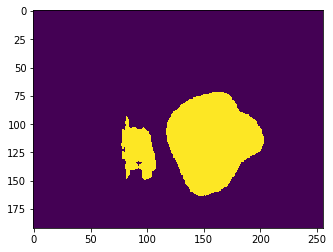

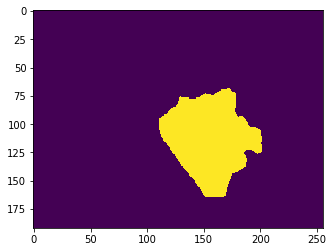

0.7312766441932091  step number is  17400  batch_size is  16
Currently on step 17500
the time is  3980.185804999999 

Avg Jacc is:


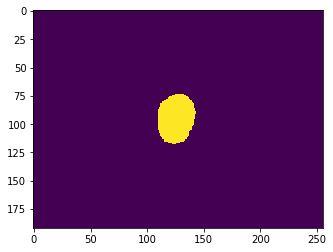

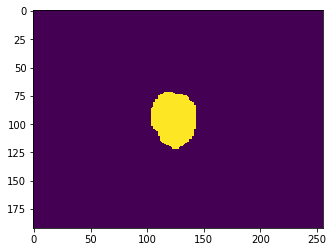

0.7345603355994591  step number is  17500  batch_size is  16
Currently on step 17600
the time is  4002.8849820000014 

Avg Jacc is:


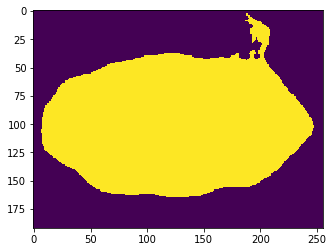

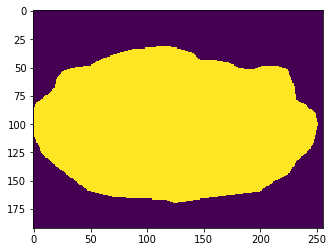

0.7298466022198017  step number is  17600  batch_size is  16
Currently on step 17700
the time is  4025.6924390000004 

Avg Jacc is:


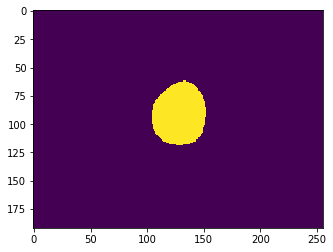

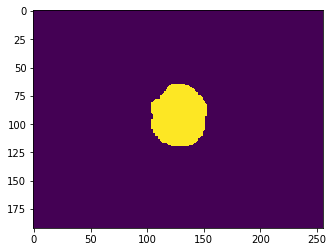

0.7223846435546875  step number is  17700  batch_size is  16
Currently on step 17800
the time is  4048.3204559999995 

Avg Jacc is:


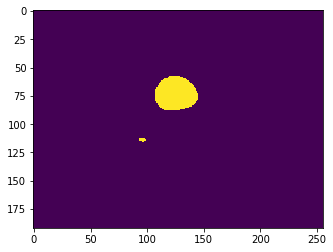

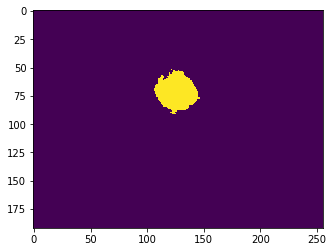

0.7222649207481971  step number is  17800  batch_size is  16
Currently on step 17900
the time is  4071.1398390000013 

Avg Jacc is:


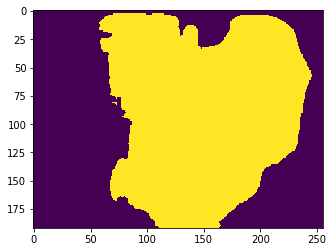

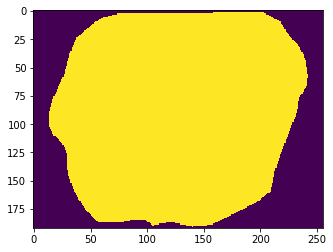

0.7208388108473558  step number is  17900  batch_size is  16
Currently on step 18000
the time is  4093.870922 

Avg Jacc is:


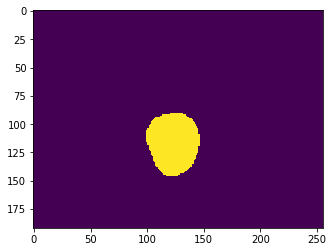

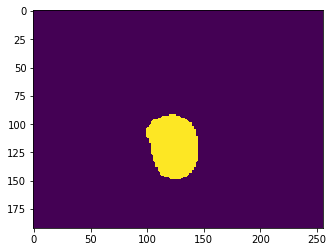

0.7325401893028847  step number is  18000  batch_size is  16
Currently on step 18100
the time is  4116.546217000001 

Avg Jacc is:


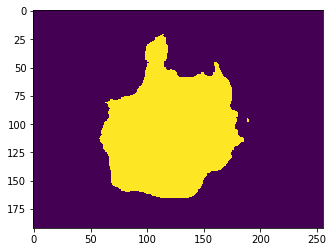

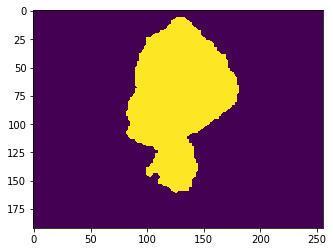

0.7043299748347356  step number is  18100  batch_size is  16
Currently on step 18200
the time is  4139.488337000001 

Avg Jacc is:


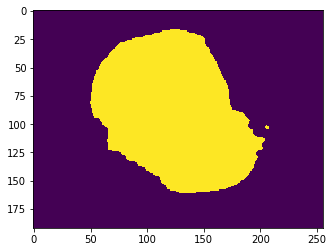

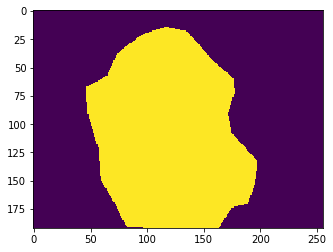

0.7244301429161659  step number is  18200  batch_size is  16
Currently on step 18300
the time is  4162.226726000003 

Avg Jacc is:


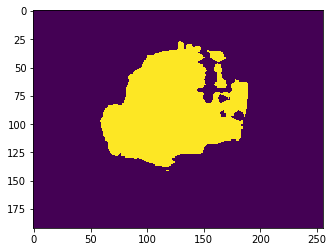

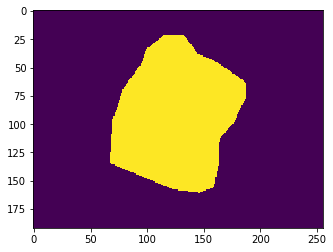

0.7330403254582332  step number is  18300  batch_size is  16
Currently on step 18400
the time is  4185.124826000001 

Avg Jacc is:


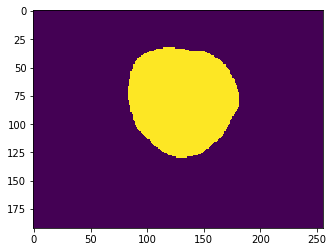

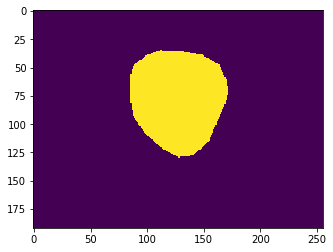

0.7096792954664964  step number is  18400  batch_size is  16
Currently on step 18500
the time is  4207.765602000001 

Avg Jacc is:


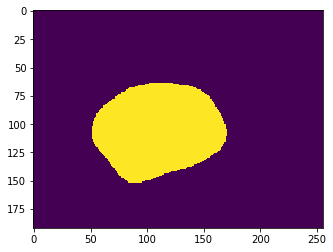

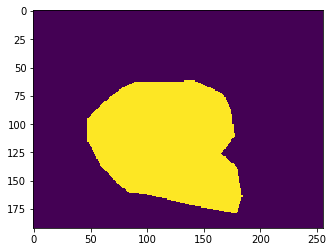

0.7408029996431791  step number is  18500  batch_size is  16
Currently on step 18600
the time is  4230.391028 

Avg Jacc is:


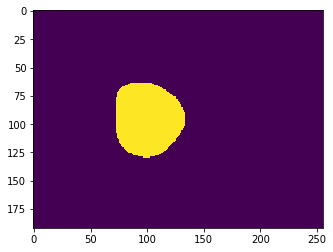

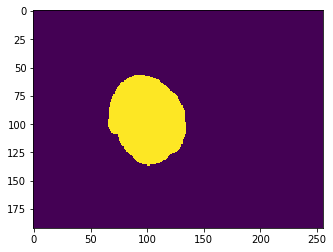

0.7294653672438401  step number is  18600  batch_size is  16
Currently on step 18700
the time is  4253.063185000001 

Avg Jacc is:


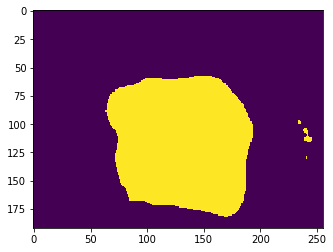

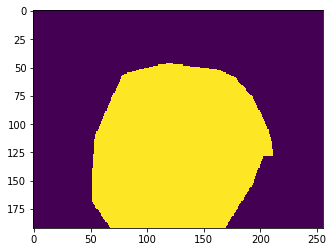

0.7404040996844952  step number is  18700  batch_size is  16
Currently on step 18800
the time is  4275.701887000001 

Avg Jacc is:


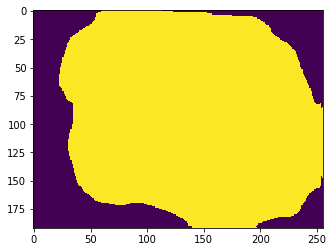

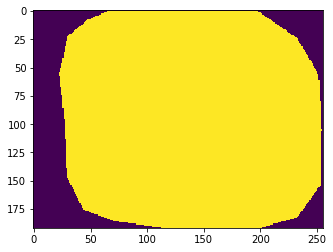

0.723074692946214  step number is  18800  batch_size is  16
Currently on step 18900
the time is  4298.5296020000005 

Avg Jacc is:


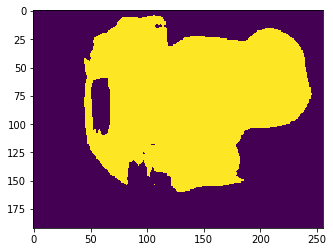

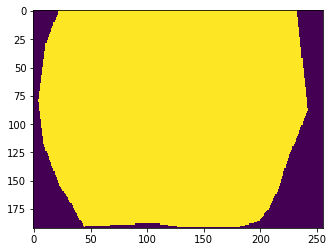

0.718704341008113  step number is  18900  batch_size is  16
Currently on step 19000
the time is  4321.120371000003 

Avg Jacc is:


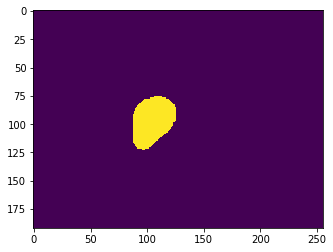

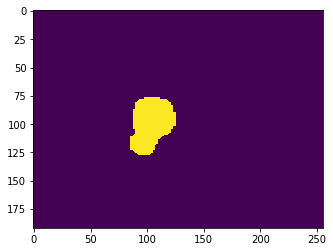

0.7414692218487079  step number is  19000  batch_size is  16
Currently on step 19100
the time is  4343.864383000002 

Avg Jacc is:


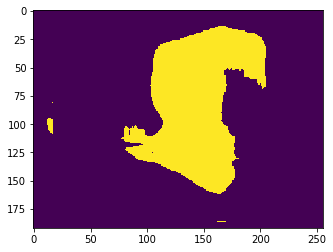

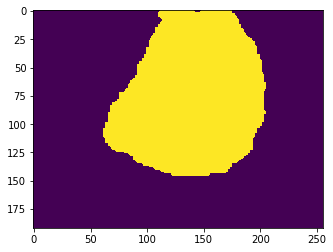

0.717847149188702  step number is  19100  batch_size is  16
Currently on step 19200
the time is  4366.615802000002 

Avg Jacc is:


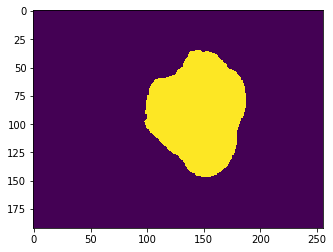

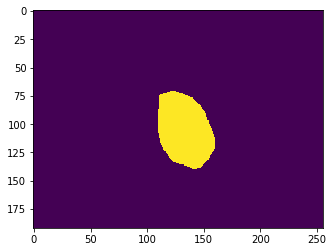

0.725201885516827  step number is  19200  batch_size is  16
Currently on step 19300
the time is  4389.387868 

Avg Jacc is:


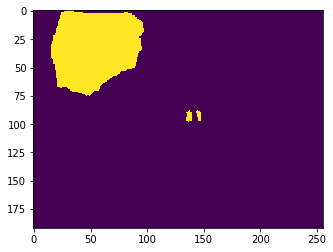

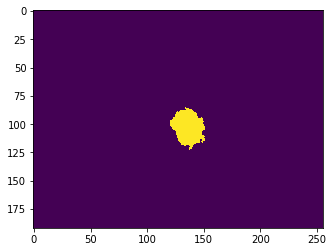

0.7273719200721154  step number is  19300  batch_size is  16
Currently on step 19400
the time is  4412.1010810000025 

Avg Jacc is:


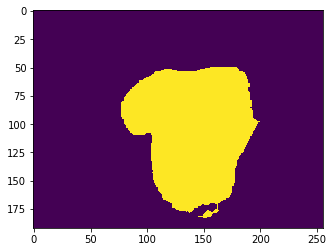

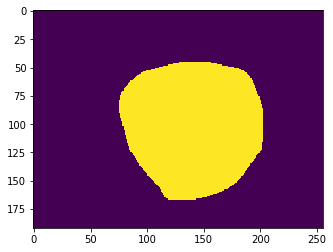

0.7307907104492187  step number is  19400  batch_size is  16
Currently on step 19500
the time is  4434.802347000003 

Avg Jacc is:


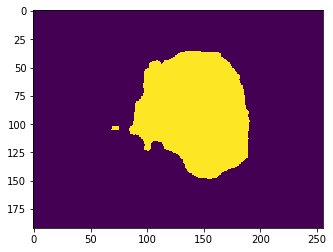

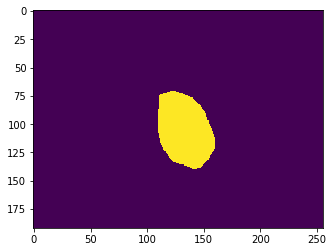

0.7326319767878606  step number is  19500  batch_size is  16
Currently on step 19600
the time is  4457.561428999999 

Avg Jacc is:


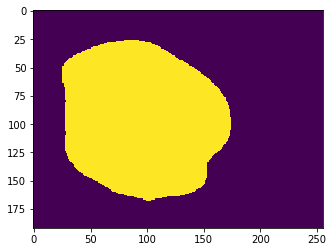

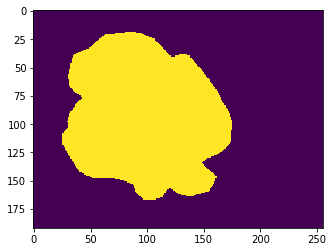

0.7221794128417969  step number is  19600  batch_size is  16
Currently on step 19700
the time is  4480.184042999999 

Avg Jacc is:


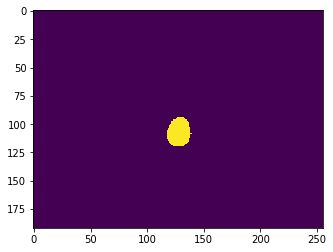

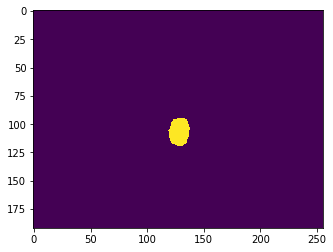

0.7335610609788161  step number is  19700  batch_size is  16
Currently on step 19800
the time is  4502.909147 

Avg Jacc is:


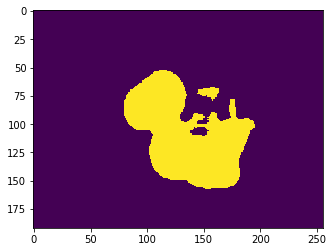

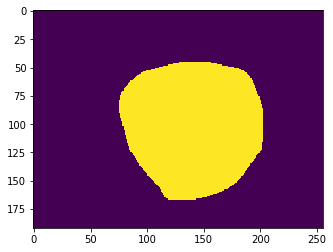

0.719787362905649  step number is  19800  batch_size is  16
Currently on step 19900
the time is  4525.553302000002 

Avg Jacc is:


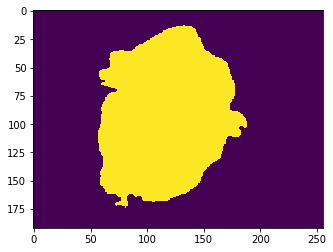

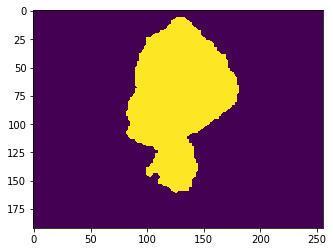

0.7235250032865084  step number is  19900  batch_size is  16
Currently on step 20000
the time is  4548.318251000002 

Avg Jacc is:


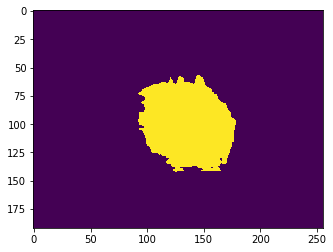

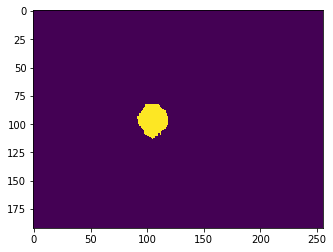

0.7307993962214543  step number is  20000  batch_size is  16
Currently on step 20100
the time is  4571.501634000002 

Avg Jacc is:


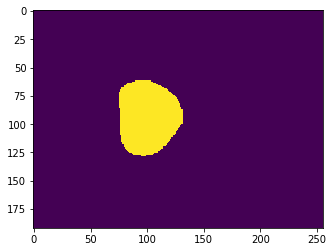

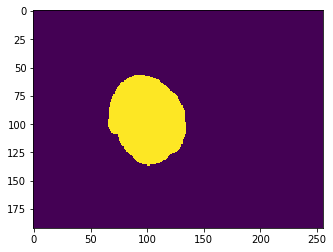

0.7126305800217848  step number is  20100  batch_size is  16
Currently on step 20200
the time is  4594.329559 

Avg Jacc is:


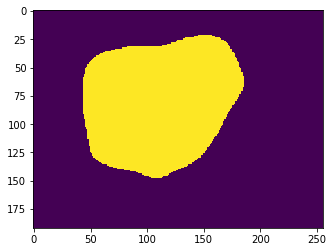

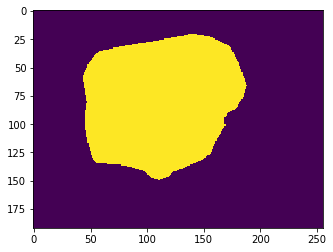

0.7322628314678485  step number is  20200  batch_size is  16
Currently on step 20300
the time is  4616.946787000003 

Avg Jacc is:


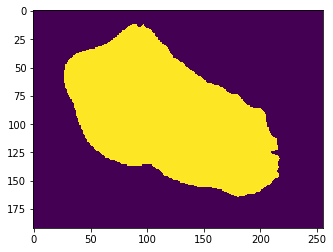

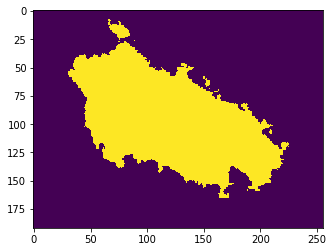

0.7369993943434495  step number is  20300  batch_size is  16
Currently on step 20400
the time is  4639.7708299999995 

Avg Jacc is:


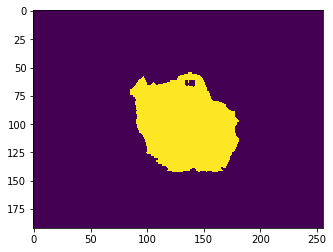

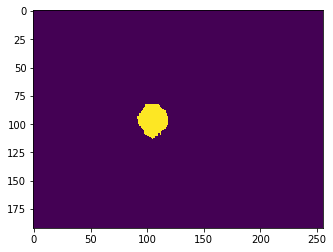

0.7398546659029447  step number is  20400  batch_size is  16
Currently on step 20500
the time is  4662.332673999999 

Avg Jacc is:


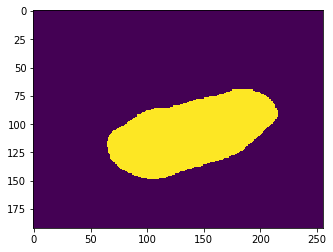

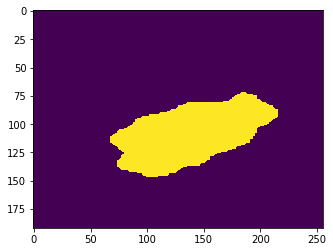

0.7372494037334736  step number is  20500  batch_size is  16
Currently on step 20600
the time is  4684.956540000001 

Avg Jacc is:


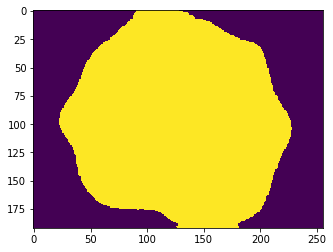

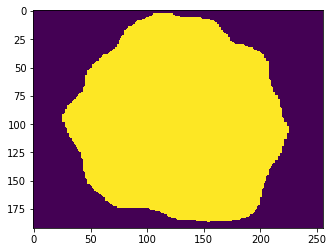

0.7267710759089543  step number is  20600  batch_size is  16
Currently on step 20700
the time is  4707.597003000001 

Avg Jacc is:


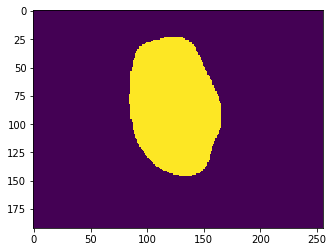

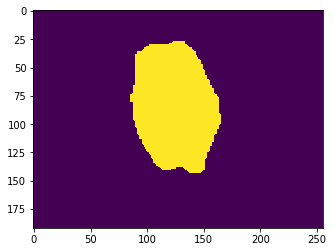

0.7398013775165264  step number is  20700  batch_size is  16
Currently on step 20800
the time is  4730.1975330000005 

Avg Jacc is:


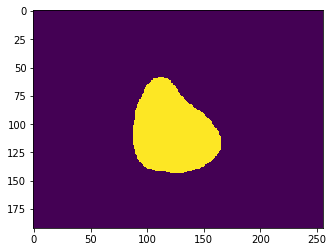

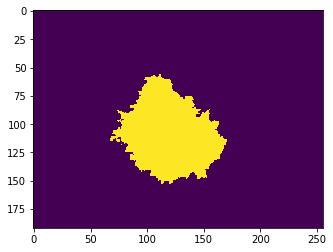

0.7327788719764122  step number is  20800  batch_size is  16
Currently on step 20900
the time is  4752.782386000001 

Avg Jacc is:


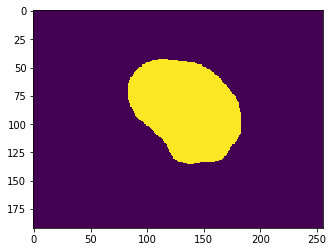

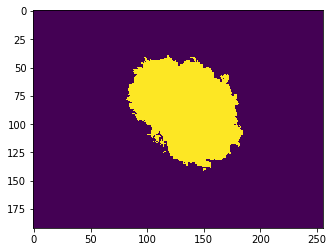

0.7322002704326923  step number is  20900  batch_size is  16
Currently on step 21000
the time is  4775.537912000002 

Avg Jacc is:


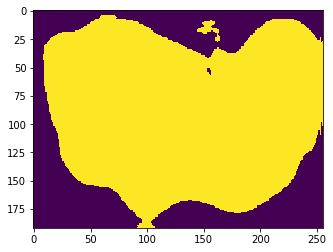

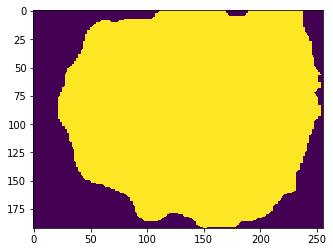

0.710835442176232  step number is  21000  batch_size is  16
Currently on step 21100
the time is  4798.272229 

Avg Jacc is:


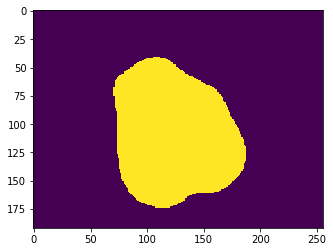

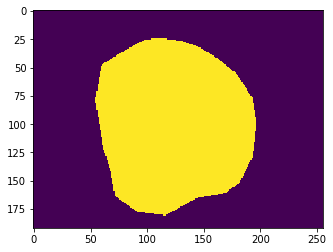

0.7055473914513222  step number is  21100  batch_size is  16
Currently on step 21200
the time is  4821.194042000001 

Avg Jacc is:


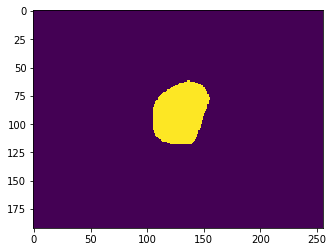

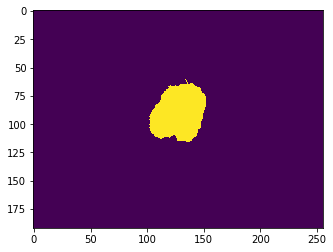

0.7099204430213342  step number is  21200  batch_size is  16
Currently on step 21300
the time is  4843.889136 

Avg Jacc is:


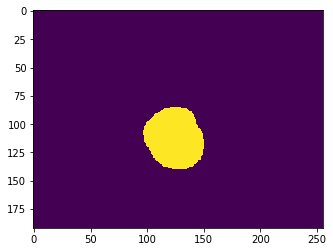

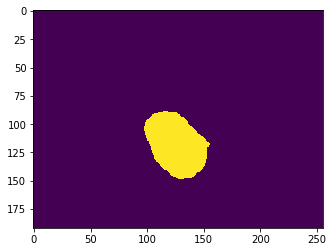

0.7232275155874399  step number is  21300  batch_size is  16
Currently on step 21400
the time is  4866.5822750000025 

Avg Jacc is:


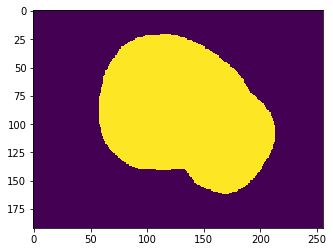

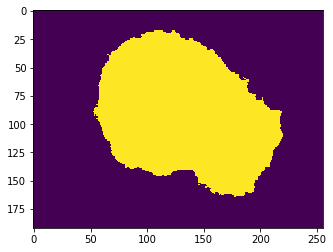

0.730487060546875  step number is  21400  batch_size is  16
Currently on step 21500
the time is  4889.251767 

Avg Jacc is:


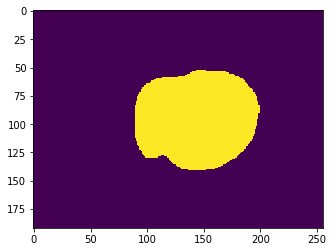

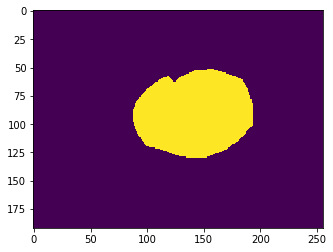

0.7305367102989784  step number is  21500  batch_size is  16
Currently on step 21600
the time is  4911.865628000001 

Avg Jacc is:


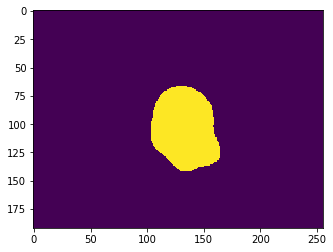

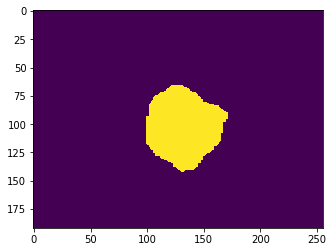

0.7350629366361178  step number is  21600  batch_size is  16
Currently on step 21700
the time is  4934.5186360000025 

Avg Jacc is:


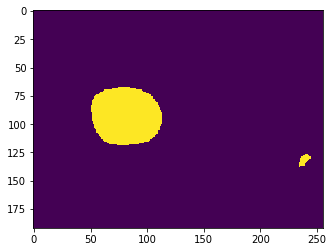

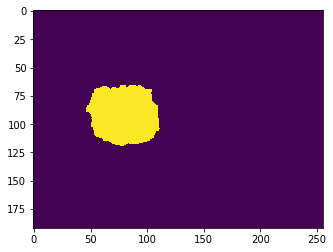

0.7169143676757812  step number is  21700  batch_size is  16
Currently on step 21800
the time is  4957.247428000001 

Avg Jacc is:


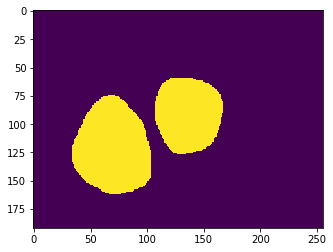

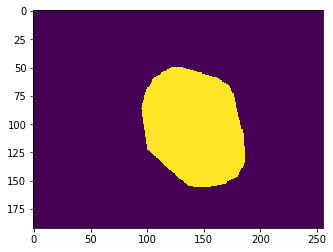

0.7232455913837139  step number is  21800  batch_size is  16
Currently on step 21900
the time is  4980.1101830000025 

Avg Jacc is:


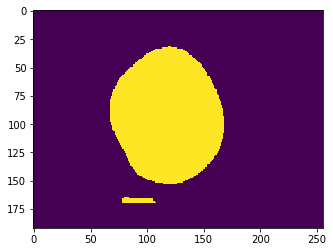

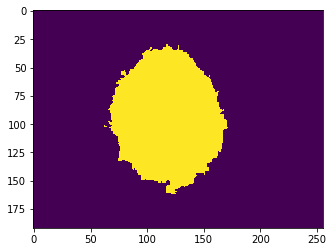

0.7258933434119591  step number is  21900  batch_size is  16
Currently on step 22000
the time is  5002.954286000002 

Avg Jacc is:


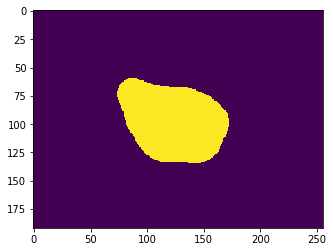

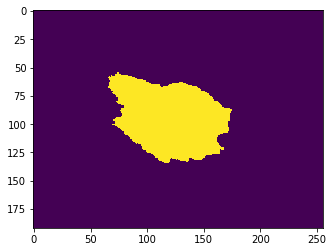

0.7192050053523137  step number is  22000  batch_size is  16
Currently on step 22100
the time is  5025.709156999999 

Avg Jacc is:


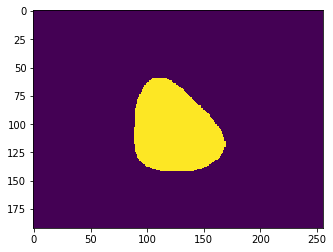

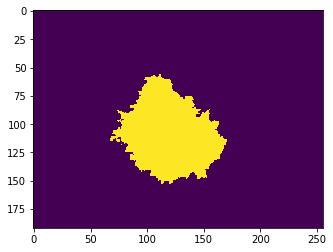

0.7295612041766827  step number is  22100  batch_size is  16
Currently on step 22200
the time is  5048.37751 

Avg Jacc is:


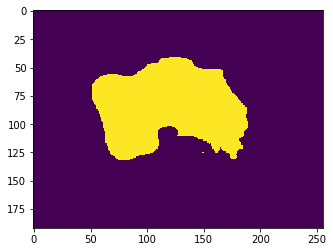

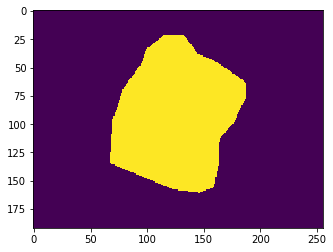

0.7153858478252705  step number is  22200  batch_size is  16
Currently on step 22300
the time is  5071.163089 

Avg Jacc is:


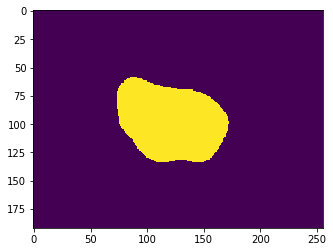

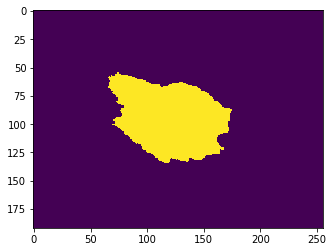

0.7341504610501803  step number is  22300  batch_size is  16
Currently on step 22400
the time is  5094.073009000002 

Avg Jacc is:


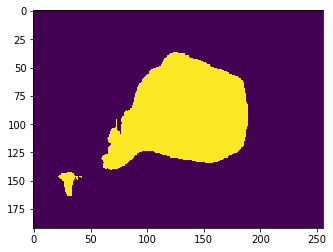

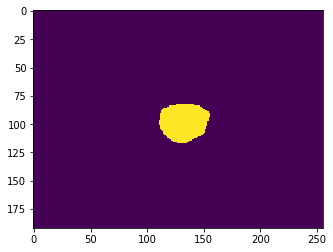

0.718222163273738  step number is  22400  batch_size is  16
Currently on step 22500
the time is  5116.804429000002 

Avg Jacc is:


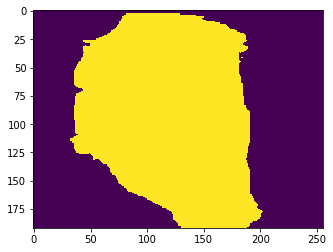

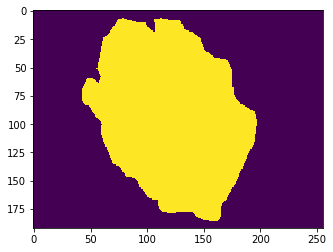

0.7291680556077224  step number is  22500  batch_size is  16
Currently on step 22600
the time is  5139.441990000001 

Avg Jacc is:


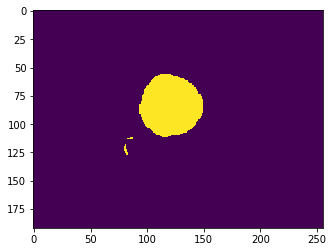

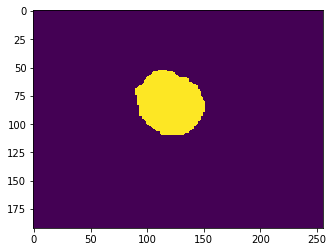

0.7277870765099159  step number is  22600  batch_size is  16
Currently on step 22700
the time is  5162.059885000001 

Avg Jacc is:


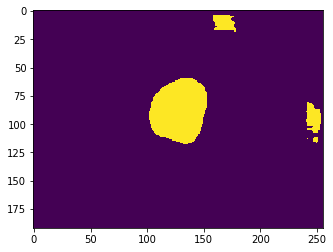

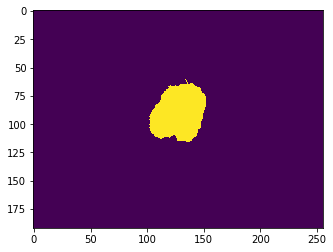

0.7225116436298077  step number is  22700  batch_size is  16
Currently on step 22800
the time is  5184.7559340000025 

Avg Jacc is:


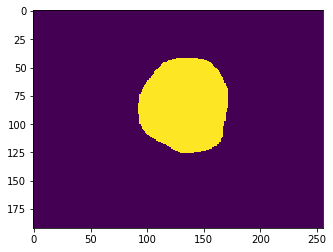

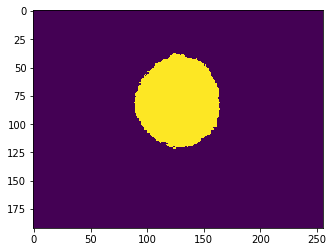

0.7247249309833234  step number is  22800  batch_size is  16
Currently on step 22900
the time is  5207.341588000001 

Avg Jacc is:


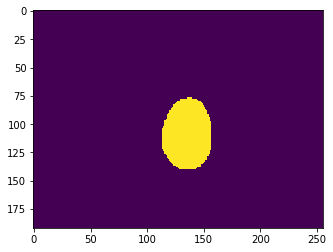

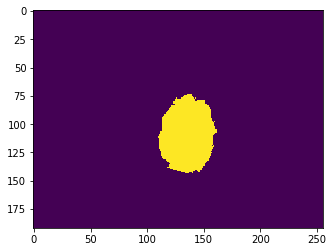

0.7279731163611779  step number is  22900  batch_size is  16
Currently on step 23000
the time is  5229.977702000002 

Avg Jacc is:


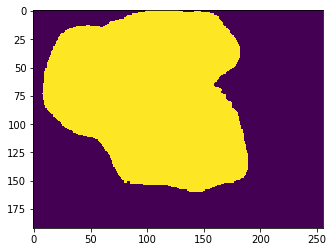

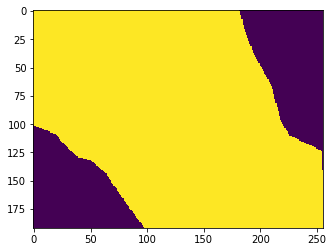

0.7258841881385216  step number is  23000  batch_size is  16
Currently on step 23100
the time is  5252.566037000002 

Avg Jacc is:


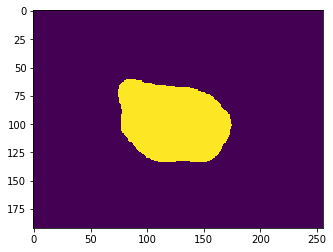

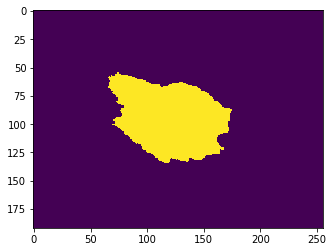

0.7349128136268028  step number is  23100  batch_size is  16
Currently on step 23200
the time is  5275.128460000002 

Avg Jacc is:


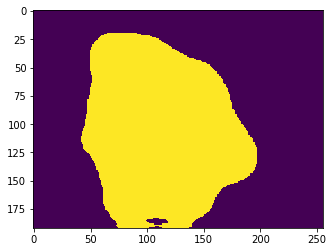

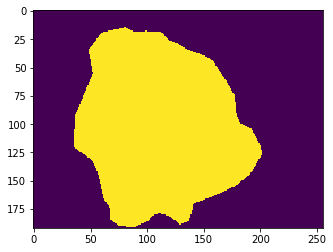

0.7385417057917668  step number is  23200  batch_size is  16
Currently on step 23300
the time is  5297.747014000002 

Avg Jacc is:


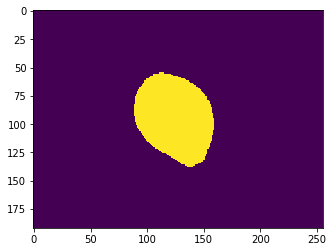

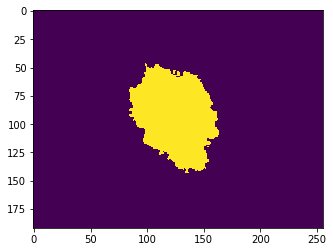

0.737185316819411  step number is  23300  batch_size is  16
Currently on step 23400
the time is  5320.363735000001 

Avg Jacc is:


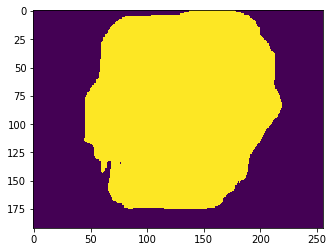

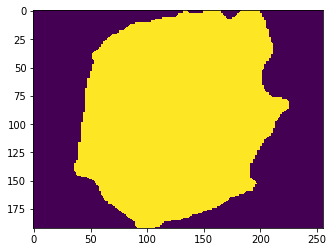

0.7271911034217248  step number is  23400  batch_size is  16
Currently on step 23500
the time is  5342.907376000001 

Avg Jacc is:


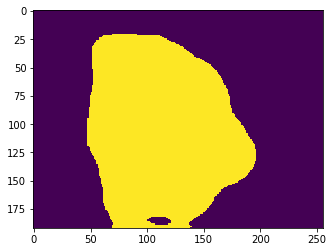

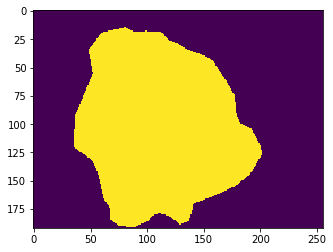

0.7326850304236778  step number is  23500  batch_size is  16
Currently on step 23600
the time is  5365.592876000001 

Avg Jacc is:


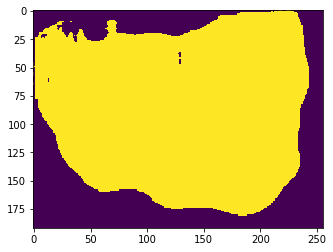

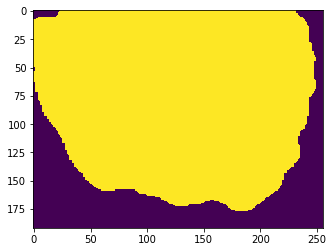

0.7212974548339843  step number is  23600  batch_size is  16
Currently on step 23700
the time is  5388.221754 

Avg Jacc is:


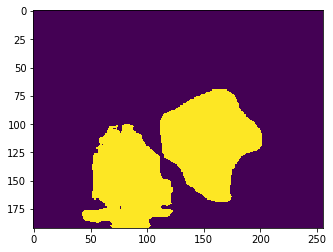

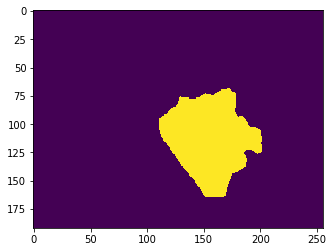

0.7332041813777044  step number is  23700  batch_size is  16
Currently on step 23800
the time is  5410.738554000001 

Avg Jacc is:


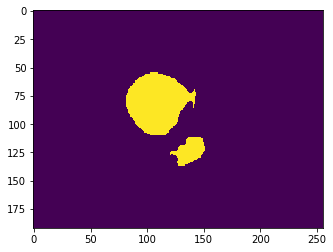

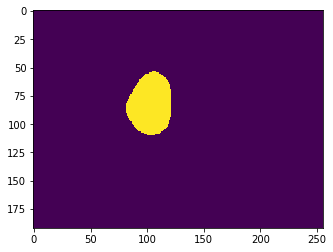

0.7299041748046875  step number is  23800  batch_size is  16
Currently on step 23900
the time is  5433.462017 

Avg Jacc is:


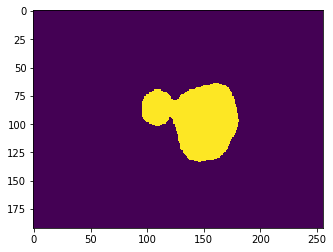

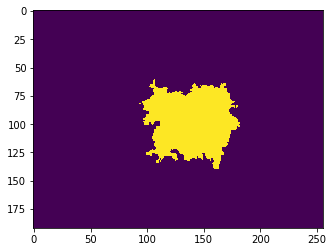

0.7302087637094351  step number is  23900  batch_size is  16
Currently on step 24000
the time is  5456.446621000001 

Avg Jacc is:


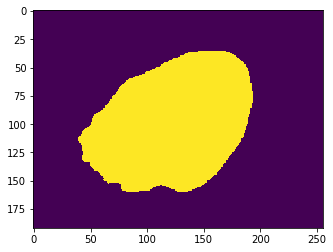

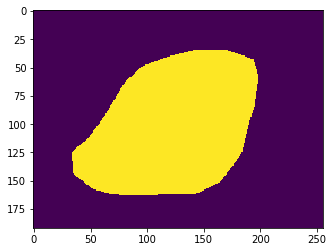

0.6963952284592848  step number is  24000  batch_size is  16
Currently on step 24100
the time is  5479.464312000002 

Avg Jacc is:


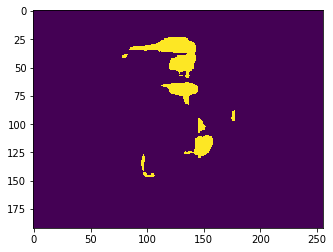

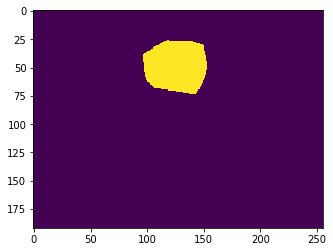

0.7273455106295073  step number is  24100  batch_size is  16
Currently on step 24200
the time is  5502.368217000001 

Avg Jacc is:


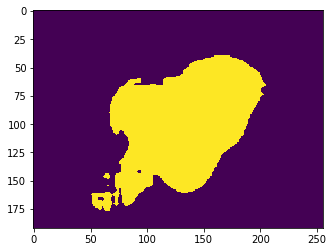

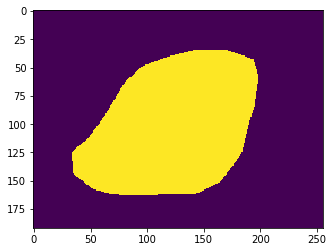

0.7261279766376202  step number is  24200  batch_size is  16
Currently on step 24300
the time is  5525.131733 

Avg Jacc is:


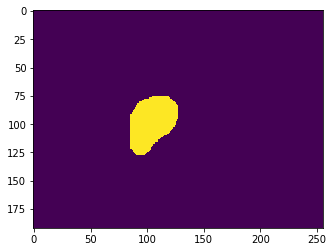

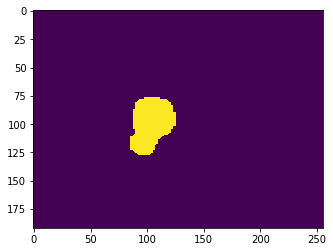

0.7308543278620794  step number is  24300  batch_size is  16
Currently on step 24400
the time is  5547.887806000001 

Avg Jacc is:


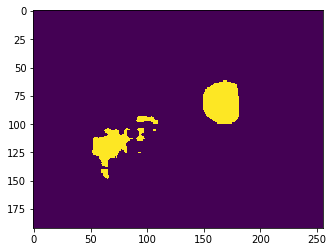

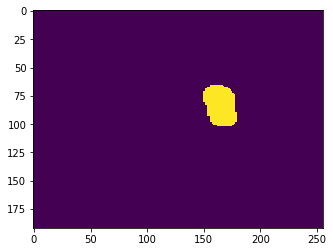

0.7241080650916466  step number is  24400  batch_size is  16
Currently on step 24500
the time is  5570.7195580000025 

Avg Jacc is:


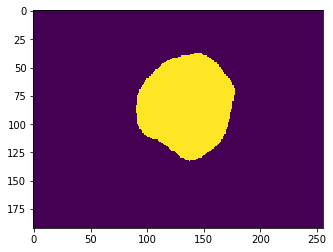

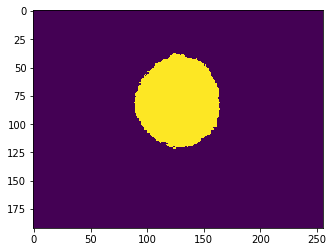

0.7292199354905349  step number is  24500  batch_size is  16
Currently on step 24600
the time is  5593.611358 

Avg Jacc is:


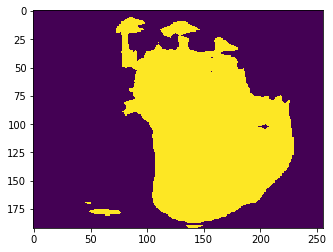

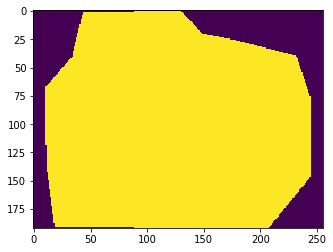

0.735214350773738  step number is  24600  batch_size is  16
Currently on step 24700
the time is  5616.438214 

Avg Jacc is:


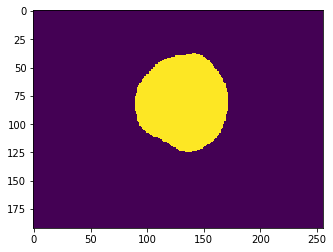

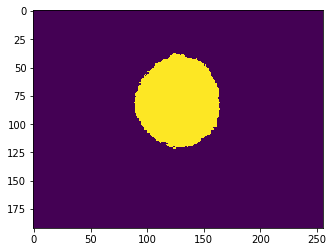

0.7353320782001201  step number is  24700  batch_size is  16
Currently on step 24800
the time is  5639.132786 

Avg Jacc is:


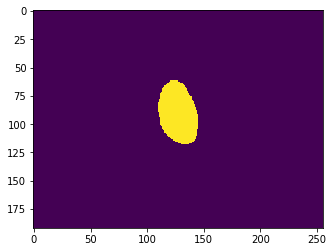

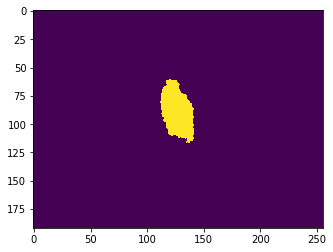

0.7390748244065505  step number is  24800  batch_size is  16
Currently on step 24900
the time is  5661.867166000002 

Avg Jacc is:


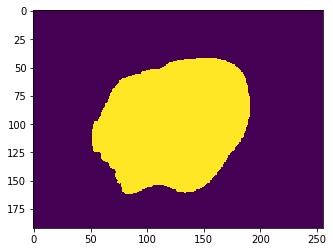

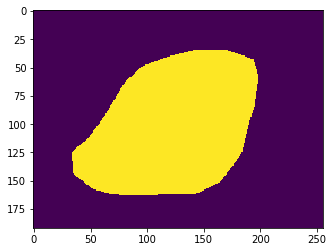

0.7375815758338341  step number is  24900  batch_size is  16
Currently on step 25000
the time is  5684.587047000003 

Avg Jacc is:


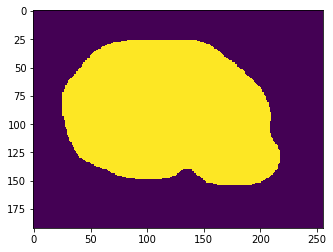

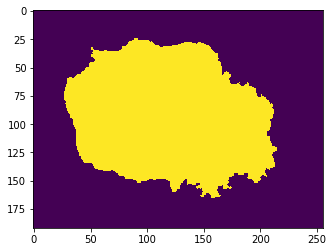

0.7492462158203125  step number is  25000  batch_size is  16
Currently on step 25100
the time is  5707.406626000002 

Avg Jacc is:


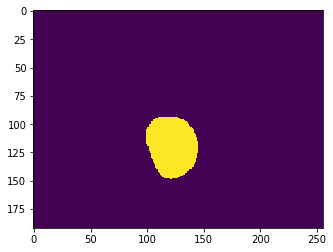

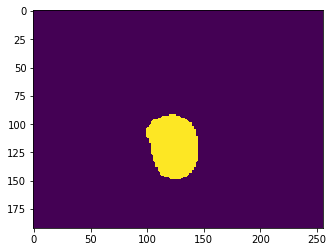

0.7449434720552884  step number is  25100  batch_size is  16
Currently on step 25200
the time is  5730.1307529999995 

Avg Jacc is:


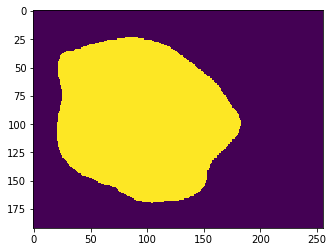

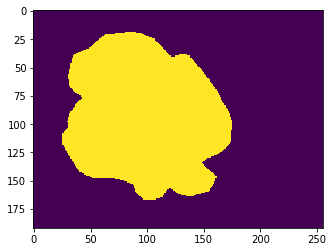

0.7450933603140024  step number is  25200  batch_size is  16
Currently on step 25300
the time is  5752.9037160000025 

Avg Jacc is:


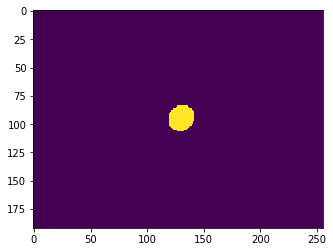

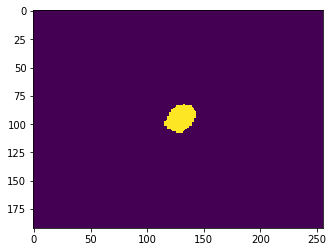

0.7332677987905649  step number is  25300  batch_size is  16
Currently on step 25400
the time is  5775.6573480000025 

Avg Jacc is:


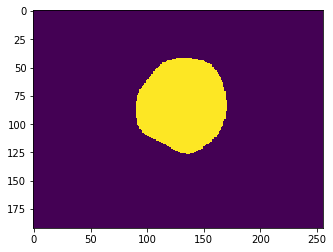

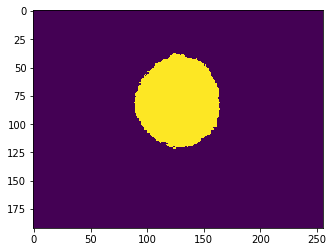

0.7270835289588341  step number is  25400  batch_size is  16
Currently on step 25500
the time is  5798.531859000001 

Avg Jacc is:


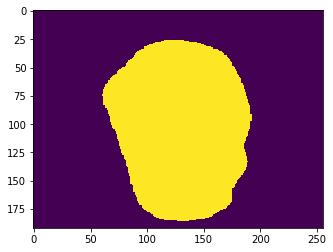

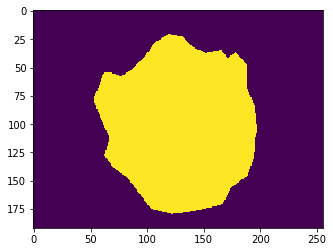

0.7268878643329327  step number is  25500  batch_size is  16
Currently on step 25600
the time is  5821.428901000001 

Avg Jacc is:


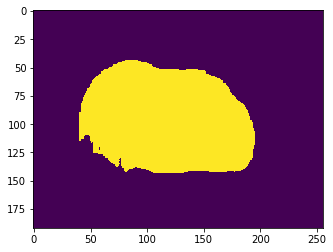

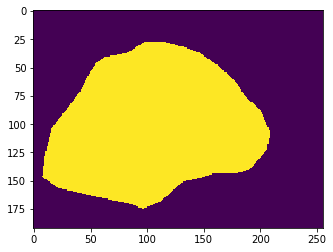

0.7293724646935096  step number is  25600  batch_size is  16
Currently on step 25700
the time is  5844.217817999999 

Avg Jacc is:


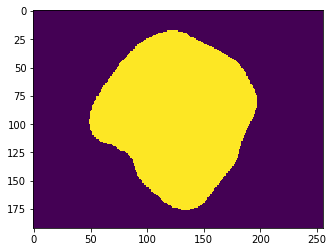

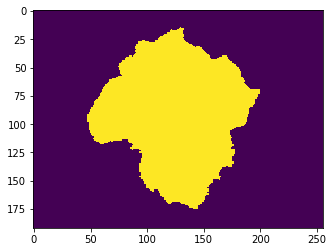

0.7350972102238582  step number is  25700  batch_size is  16
Currently on step 25800
the time is  5867.072421999999 

Avg Jacc is:


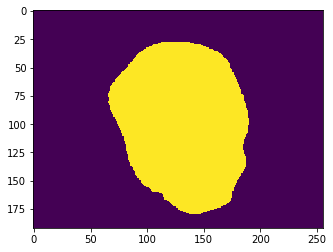

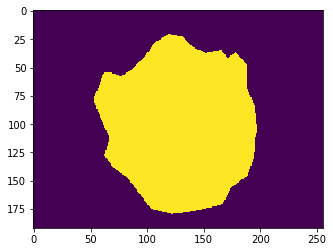

0.7240460909329928  step number is  25800  batch_size is  16
Currently on step 25900
the time is  5889.994897000002 

Avg Jacc is:


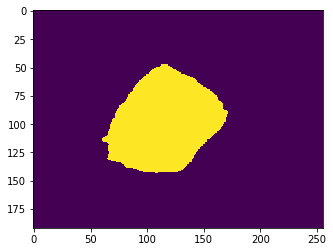

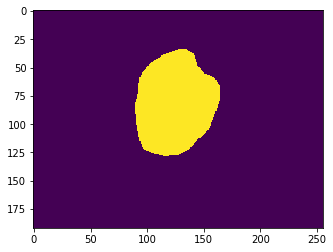

0.7382977999173678  step number is  25900  batch_size is  16
Currently on step 26000
the time is  5912.7536039999995 

Avg Jacc is:


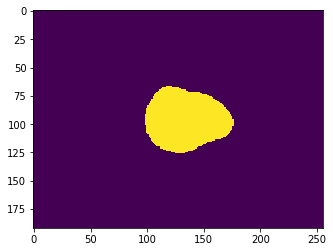

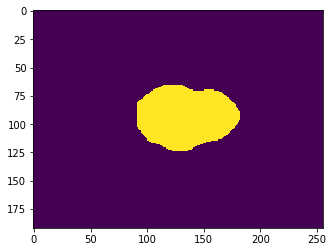

0.7462669959435096  step number is  26000  batch_size is  16
Currently on step 26100
the time is  5935.534779 

Avg Jacc is:


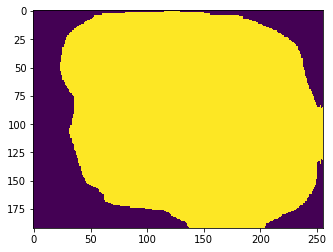

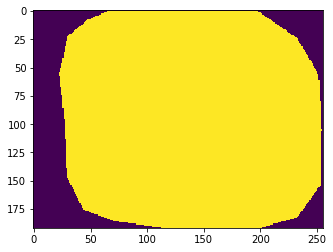

0.7330243624173678  step number is  26100  batch_size is  16
Currently on step 26200
the time is  5958.252224000002 

Avg Jacc is:


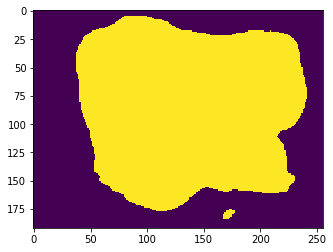

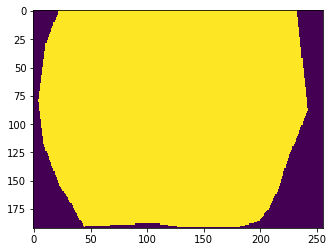

0.7426571185772236  step number is  26200  batch_size is  16
Currently on step 26300
the time is  5980.9046050000015 

Avg Jacc is:


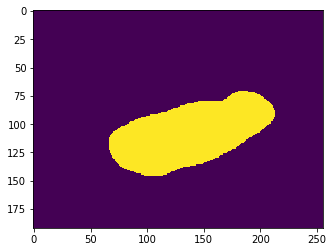

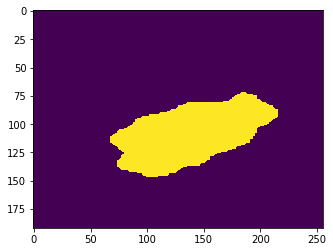

0.7401079618013822  step number is  26300  batch_size is  16
Currently on step 26400
the time is  6003.681494000002 

Avg Jacc is:


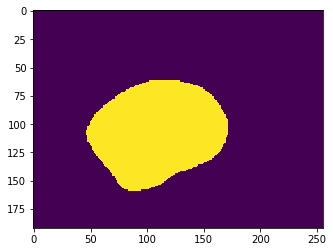

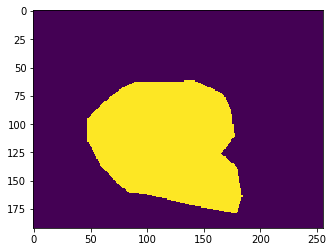

0.7491171616774339  step number is  26400  batch_size is  16
Currently on step 26500
the time is  6026.461442000002 

Avg Jacc is:


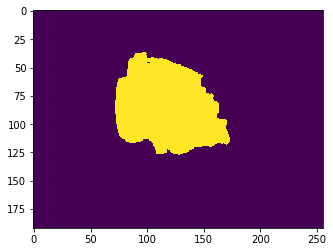

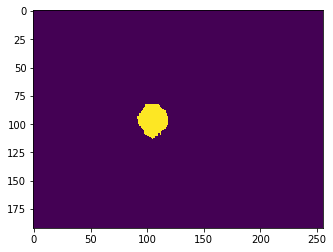

0.7275496849646935  step number is  26500  batch_size is  16
Currently on step 26600
the time is  6049.289213000002 

Avg Jacc is:


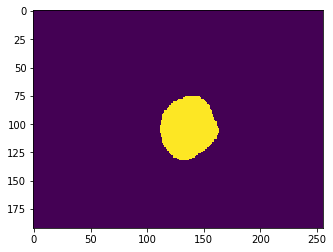

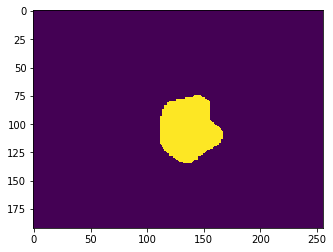

0.7257178673377404  step number is  26600  batch_size is  16
Currently on step 26700
the time is  6072.086841000002 

Avg Jacc is:


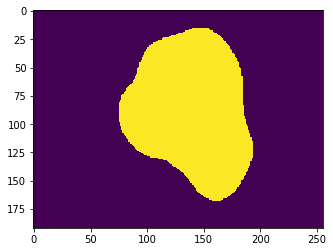

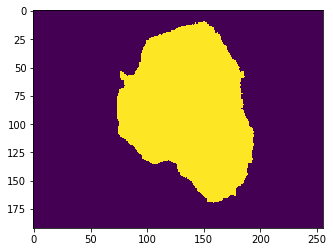

0.7214847271259014  step number is  26700  batch_size is  16
Currently on step 26800
the time is  6094.765828000001 

Avg Jacc is:


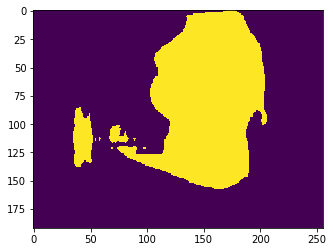

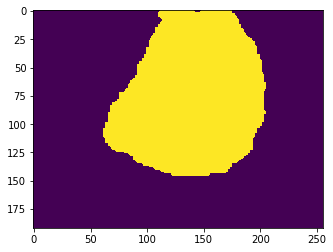

0.7324280372032752  step number is  26800  batch_size is  16
Currently on step 26900
the time is  6117.5247770000005 

Avg Jacc is:


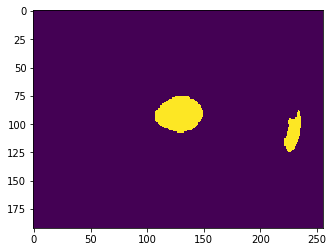

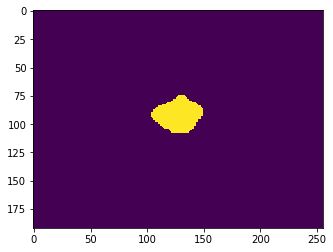

0.7263701805701622  step number is  26900  batch_size is  16
Currently on step 27000
the time is  6140.397535000002 

Avg Jacc is:


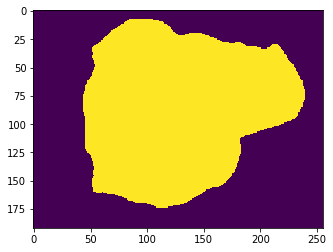

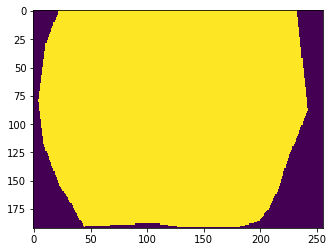

0.7343699528620793  step number is  27000  batch_size is  16
Currently on step 27100
the time is  6163.2459 

Avg Jacc is:


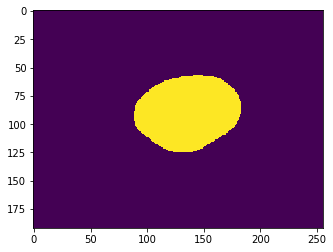

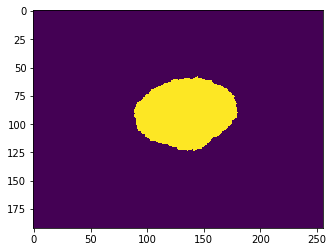

0.7267660287710337  step number is  27100  batch_size is  16
Currently on step 27200
the time is  6186.234909000001 

Avg Jacc is:


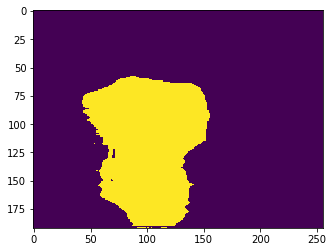

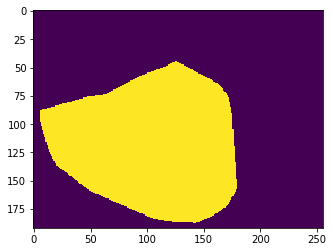

0.7233731783353365  step number is  27200  batch_size is  16
Currently on step 27300
the time is  6209.090477 

Avg Jacc is:


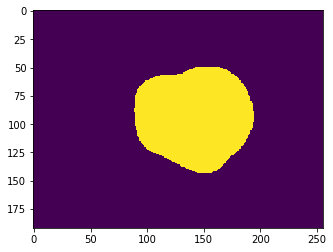

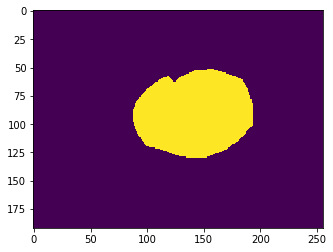

0.7374234713040866  step number is  27300  batch_size is  16
Currently on step 27400
the time is  6231.833436000003 

Avg Jacc is:


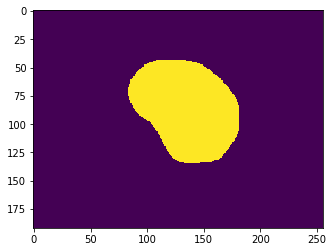

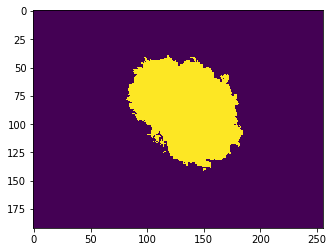

0.7462528522198016  step number is  27400  batch_size is  16
Currently on step 27500
the time is  6254.532744000002 

Avg Jacc is:


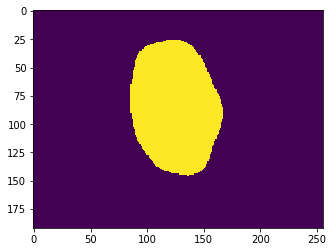

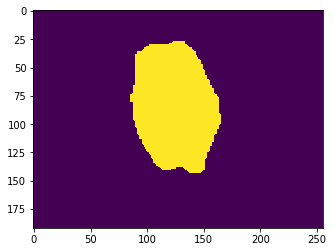

0.7412407508263221  step number is  27500  batch_size is  16
Currently on step 27600
the time is  6277.379315 

Avg Jacc is:


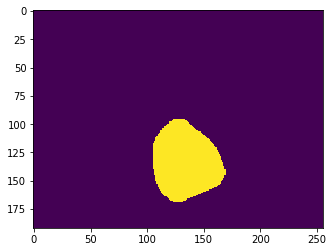

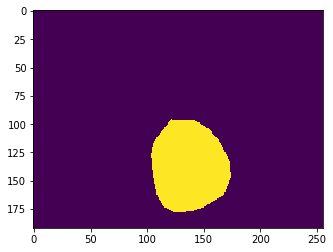

0.7338560837965745  step number is  27600  batch_size is  16
Currently on step 27700
the time is  6300.675144000003 

Avg Jacc is:


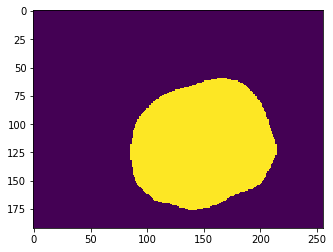

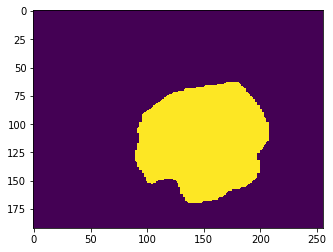

0.7343799297626202  step number is  27700  batch_size is  16
Currently on step 27800
the time is  6323.762519000002 

Avg Jacc is:


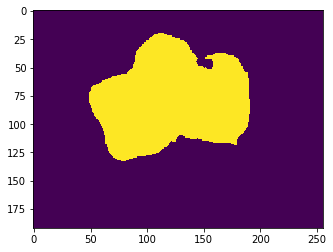

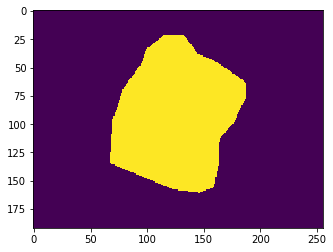

0.7402875460111178  step number is  27800  batch_size is  16
Currently on step 27900
the time is  6346.55449 

Avg Jacc is:


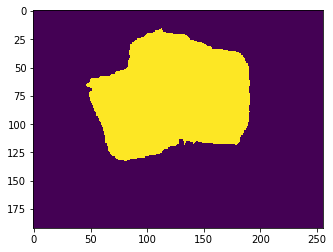

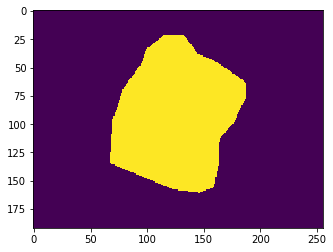

0.740078852726863  step number is  27900  batch_size is  16
Currently on step 28000
the time is  6369.3923680000025 

Avg Jacc is:


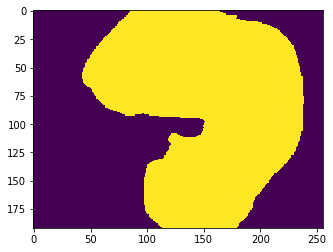

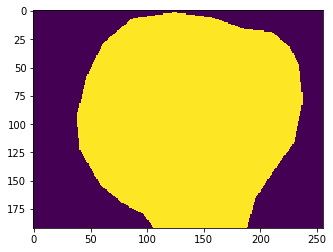

0.7350150475135216  step number is  28000  batch_size is  16
Currently on step 28100
the time is  6392.5423009999995 

Avg Jacc is:


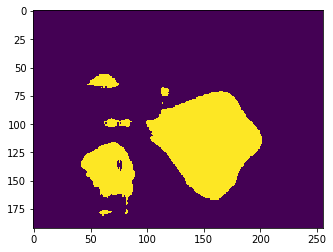

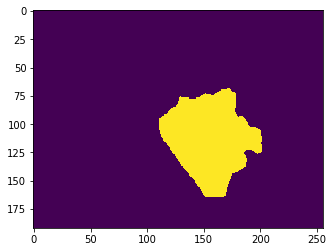

0.724633554311899  step number is  28100  batch_size is  16
Currently on step 28200
the time is  6415.7513930000005 

Avg Jacc is:


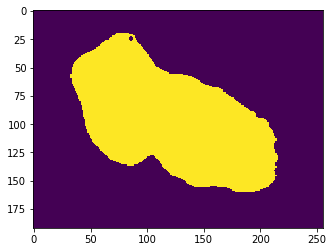

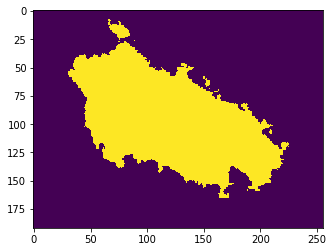

0.7289160508375901  step number is  28200  batch_size is  16
Currently on step 28300
the time is  6438.630932000002 

Avg Jacc is:


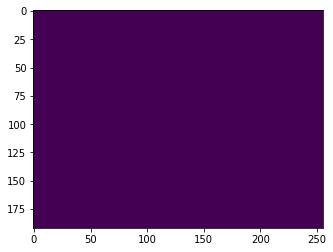

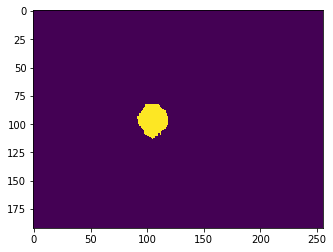

0.7206838167630709  step number is  28300  batch_size is  16
Currently on step 28400
the time is  6461.449014 

Avg Jacc is:


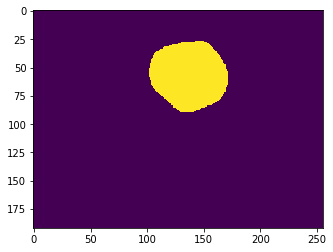

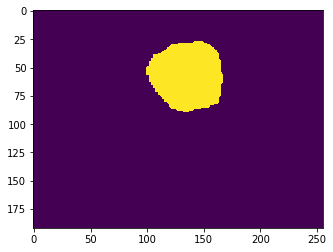

0.7277020967923677  step number is  28400  batch_size is  16
Currently on step 28500
the time is  6484.222956 

Avg Jacc is:


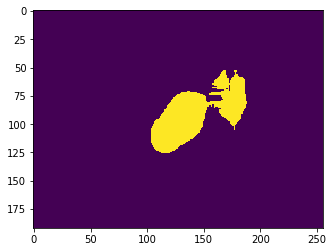

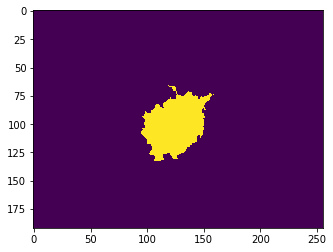

0.7331961998572716  step number is  28500  batch_size is  16
Currently on step 28600
the time is  6506.899273000001 

Avg Jacc is:


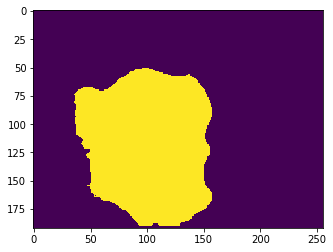

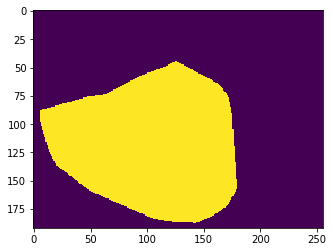

0.7326556865985577  step number is  28600  batch_size is  16
Currently on step 28700
the time is  6529.661437000001 

Avg Jacc is:


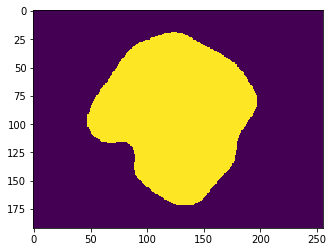

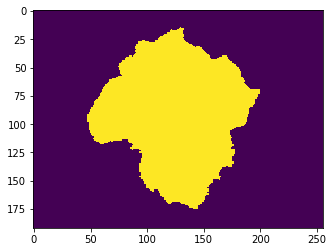

0.7369945819561298  step number is  28700  batch_size is  16
Currently on step 28800
the time is  6552.436014000001 

Avg Jacc is:


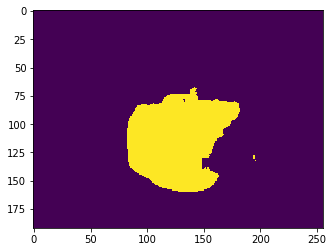

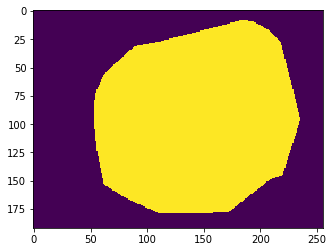

0.7258191622220553  step number is  28800  batch_size is  16
Currently on step 28900
the time is  6575.393414 

Avg Jacc is:


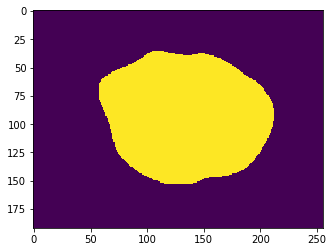

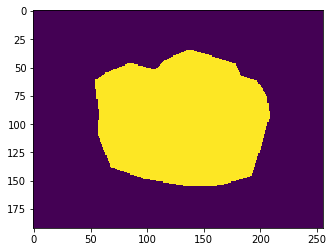

0.7346915611853966  step number is  28900  batch_size is  16
Currently on step 29000
the time is  6598.380868000002 

Avg Jacc is:


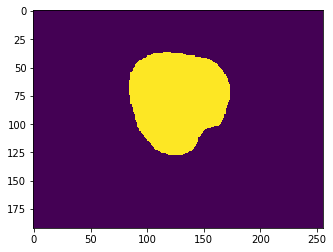

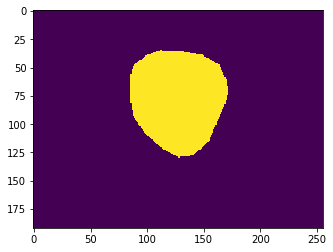

0.7297512347881611  step number is  29000  batch_size is  16
Currently on step 29100
the time is  6621.190404999999 

Avg Jacc is:


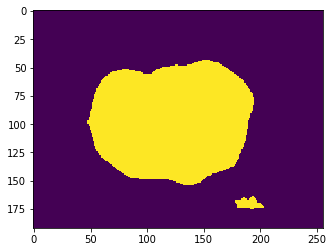

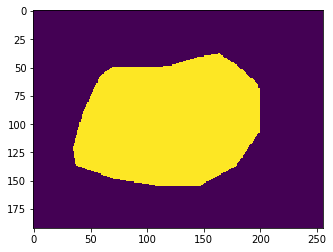

0.7378973153921274  step number is  29100  batch_size is  16
Currently on step 29200
the time is  6644.03001 

Avg Jacc is:


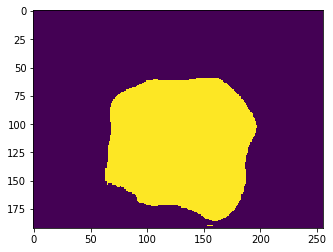

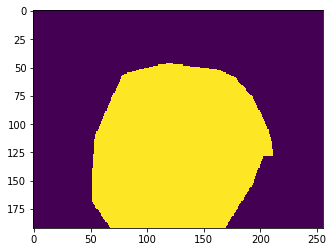

0.7361257699819711  step number is  29200  batch_size is  16
Currently on step 29300
the time is  6668.681264000001 

Avg Jacc is:


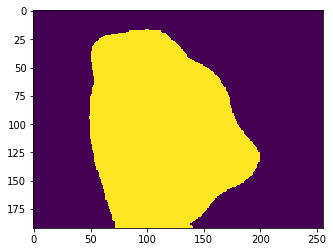

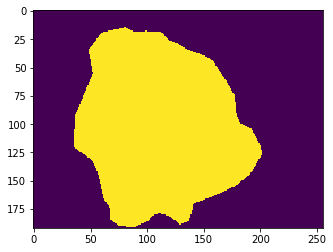

0.7330403254582332  step number is  29300  batch_size is  16
Currently on step 29400
the time is  6691.570451000001 

Avg Jacc is:


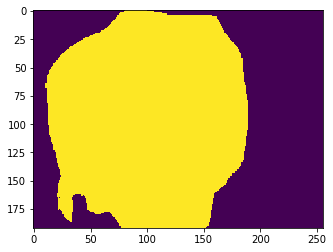

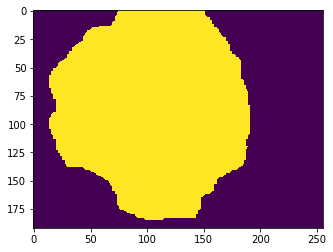

0.7282500633826623  step number is  29400  batch_size is  16
Currently on step 29500
the time is  6714.321626999999 

Avg Jacc is:


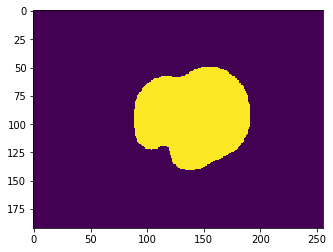

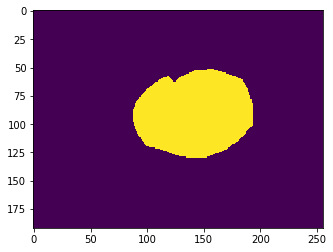

0.7279883751502404  step number is  29500  batch_size is  16
Currently on step 29600
the time is  6737.076611000002 

Avg Jacc is:


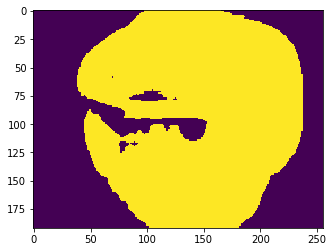

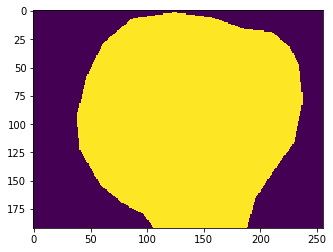

0.734375  step number is  29600  batch_size is  16
Currently on step 29700
the time is  6759.850540000001 

Avg Jacc is:


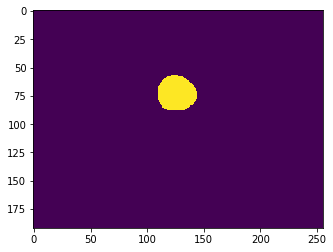

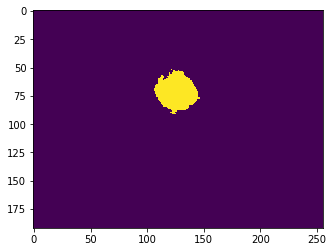

0.7298295241135817  step number is  29700  batch_size is  16
Currently on step 29800
the time is  6782.62162 

Avg Jacc is:


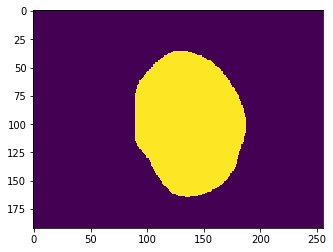

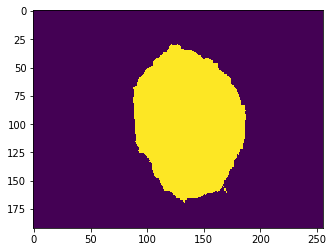

0.7227488591120793  step number is  29800  batch_size is  16
Currently on step 29900
the time is  6805.4807710000005 

Avg Jacc is:


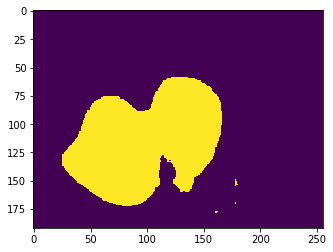

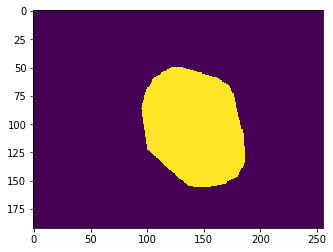

0.7327153719388522  step number is  29900  batch_size is  16
Currently on step 30000
the time is  6828.472575000002 

Avg Jacc is:


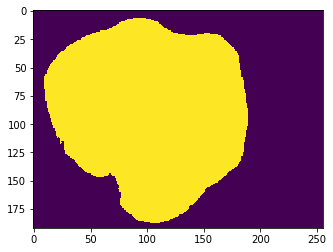

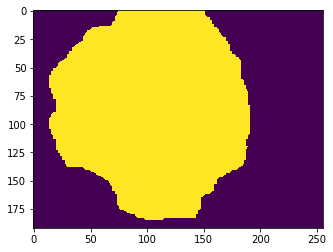

0.7252227783203125  step number is  30000  batch_size is  16
Currently on step 30100
the time is  6851.613234000002 

Avg Jacc is:


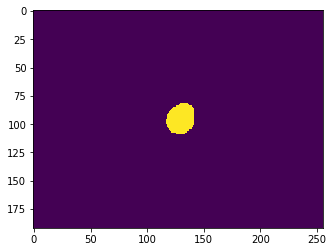

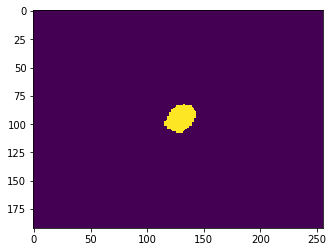

0.7332671532264122  step number is  30100  batch_size is  16
Currently on step 30200
the time is  6874.643527000002 

Avg Jacc is:


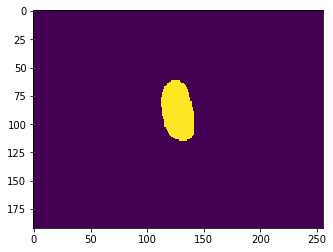

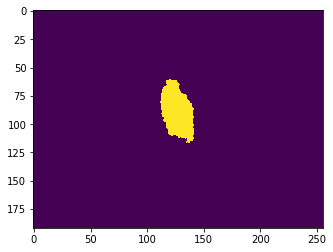

0.7254959106445312  step number is  30200  batch_size is  16
Currently on step 30300
the time is  6897.590195999999 

Avg Jacc is:


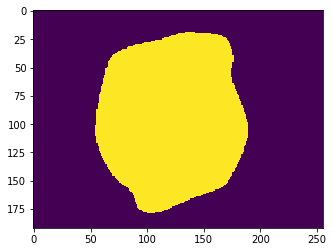

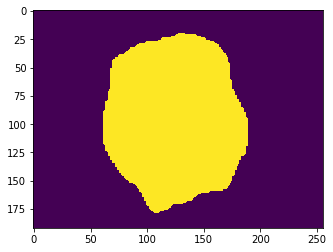

0.7318977942833533  step number is  30300  batch_size is  16
Currently on step 30400
the time is  6920.565604000001 

Avg Jacc is:


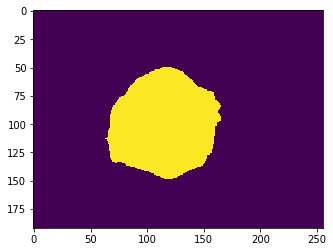

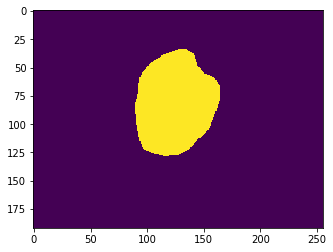

0.7332133366511419  step number is  30400  batch_size is  16
Currently on step 30500
the time is  6943.479717 

Avg Jacc is:


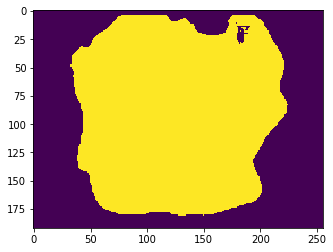

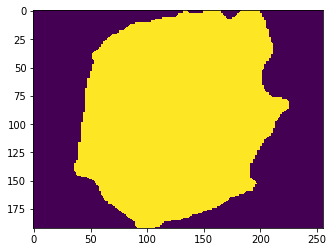

0.7367052518404447  step number is  30500  batch_size is  16
Currently on step 30600
the time is  6966.396057 

Avg Jacc is:


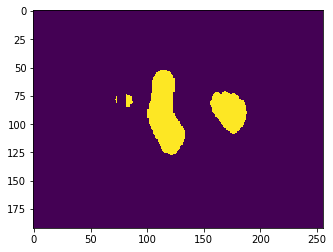

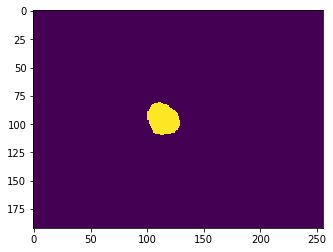

0.7390771719125601  step number is  30600  batch_size is  16
Currently on step 30700
the time is  6989.2375059999995 

Avg Jacc is:


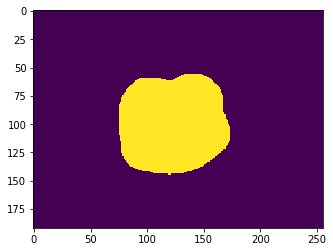

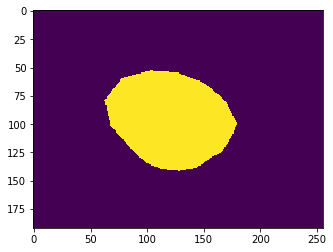

0.7276571420522836  step number is  30700  batch_size is  16
Currently on step 30800
the time is  7012.1604800000005 

Avg Jacc is:


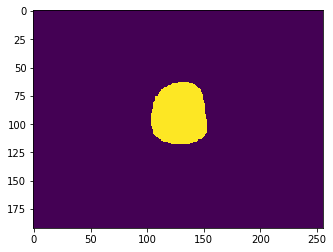

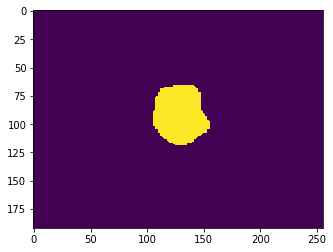

0.7384503878079928  step number is  30800  batch_size is  16
Currently on step 30900
the time is  7035.034092 

Avg Jacc is:


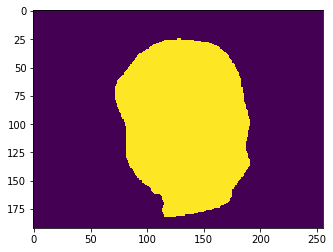

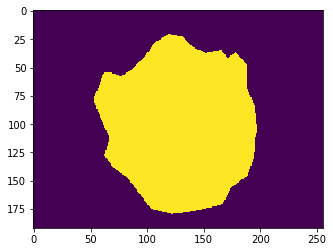

0.7379556509164663  step number is  30900  batch_size is  16
Currently on step 31000
the time is  7057.798570000001 

Avg Jacc is:


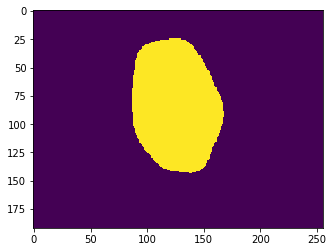

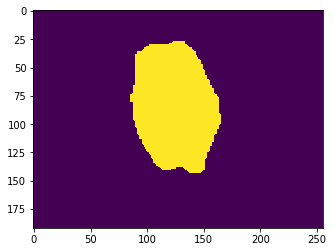

0.7392085148737981  step number is  31000  batch_size is  16
Currently on step 31100
the time is  7080.650061000002 

Avg Jacc is:


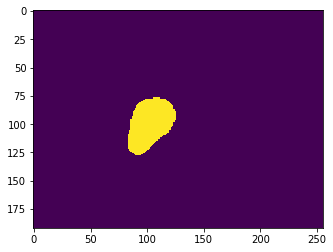

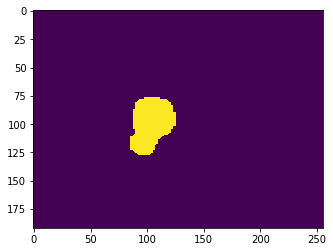

0.7390339191143329  step number is  31100  batch_size is  16
Currently on step 31200
the time is  7103.471103000002 

Avg Jacc is:


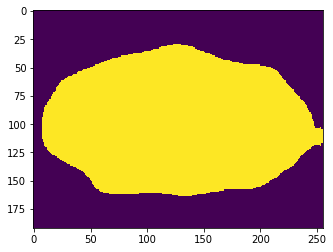

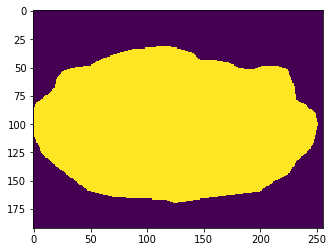

0.7333324725811298  step number is  31200  batch_size is  16
Currently on step 31300
the time is  7126.308238 

Avg Jacc is:


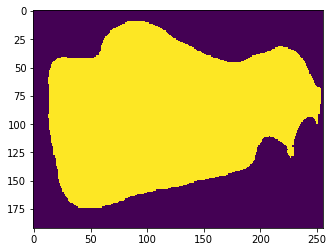

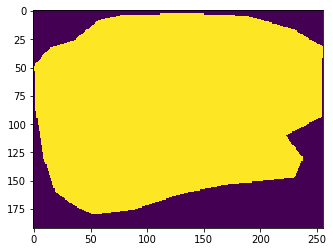

0.7389450073242188  step number is  31300  batch_size is  16
Currently on step 31400
the time is  7149.157367000002 

Avg Jacc is:


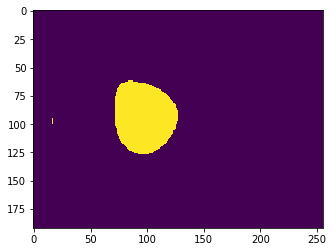

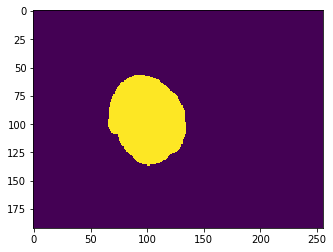

0.7352435185359074  step number is  31400  batch_size is  16
Currently on step 31500
the time is  7172.066233 

Avg Jacc is:


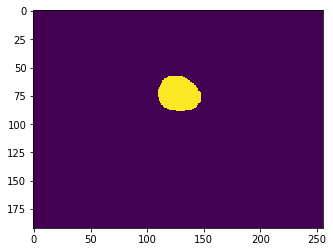

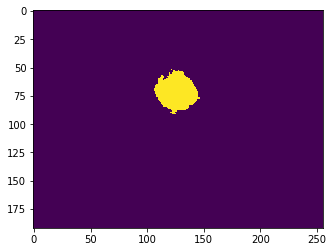

0.7345470135028546  step number is  31500  batch_size is  16
Currently on step 31600
the time is  7195.0735970000005 

Avg Jacc is:


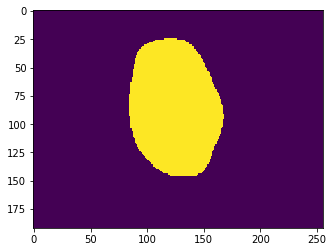

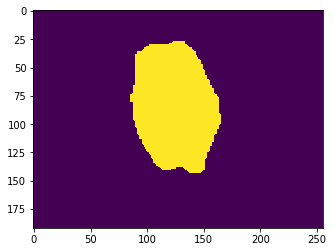

0.732979994553786  step number is  31600  batch_size is  16
Currently on step 31700
the time is  7218.125550999999 

Avg Jacc is:


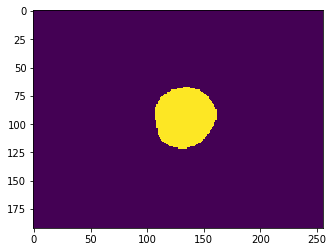

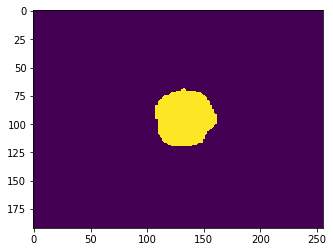

0.7368733332707331  step number is  31700  batch_size is  16
Currently on step 31800
the time is  7241.112988999999 

Avg Jacc is:


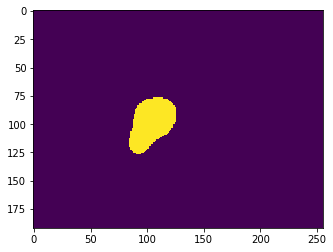

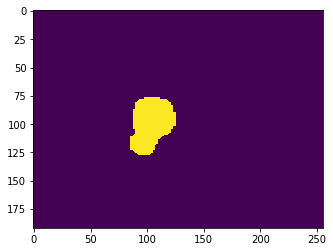

0.7334361736591045  step number is  31800  batch_size is  16
Currently on step 31900
the time is  7264.383779000002 

Avg Jacc is:


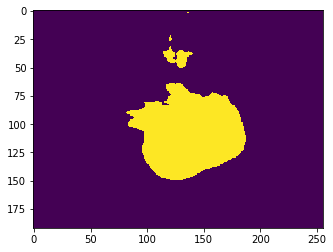

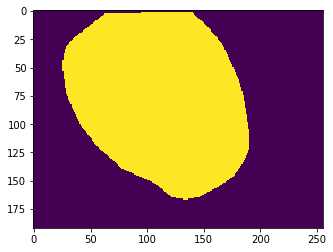

0.7347774799053486  step number is  31900  batch_size is  16
Currently on step 32000
the time is  7287.641270000002 

Avg Jacc is:


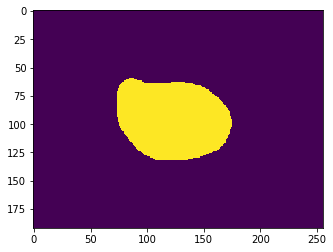

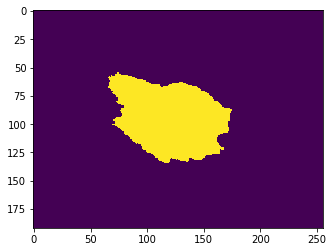

0.7293338482196514  step number is  32000  batch_size is  16
Currently on step 32100
the time is  7310.881531000001 

Avg Jacc is:


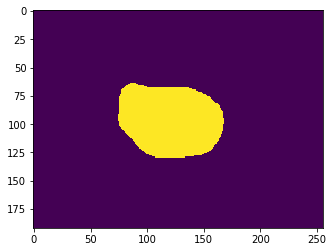

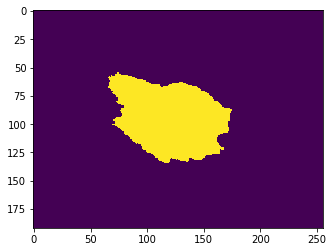

0.7235391470102164  step number is  32100  batch_size is  16
Currently on step 32200
the time is  7333.867177000002 

Avg Jacc is:


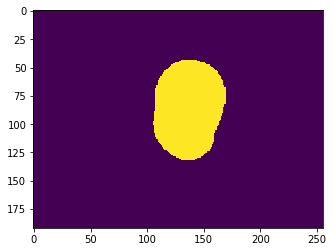

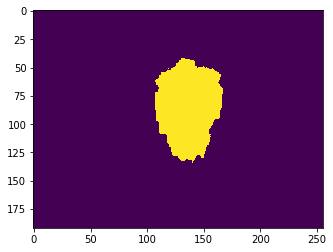

0.7376821664663461  step number is  32200  batch_size is  16
Currently on step 32300
the time is  7356.750491000001 

Avg Jacc is:


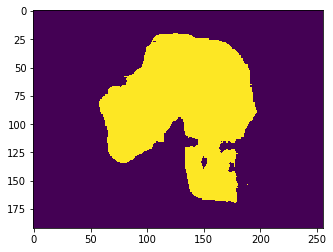

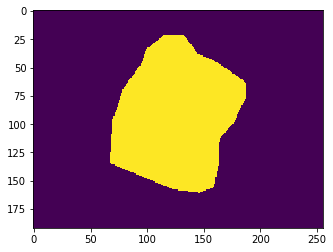

0.7339308518629808  step number is  32300  batch_size is  16
Currently on step 32400
the time is  7379.669868000003 

Avg Jacc is:


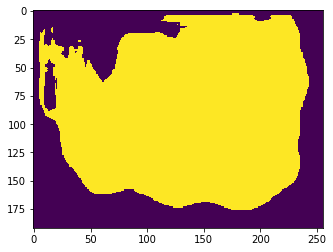

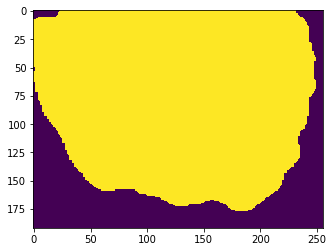

0.7332492534930889  step number is  32400  batch_size is  16
Currently on step 32500
the time is  7402.468510000001 

Avg Jacc is:


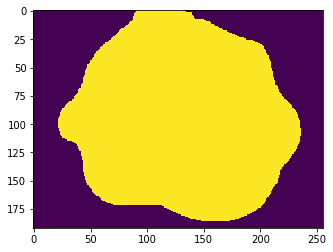

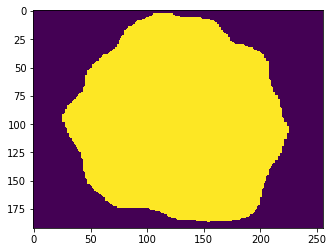

0.7383609478290264  step number is  32500  batch_size is  16
Currently on step 32600
the time is  7425.361647 

Avg Jacc is:


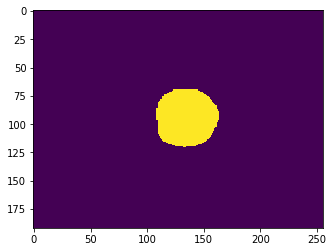

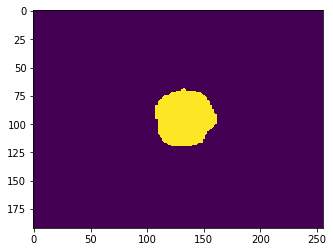

0.7282881516676682  step number is  32600  batch_size is  16
Currently on step 32700
the time is  7448.253020000002 

Avg Jacc is:


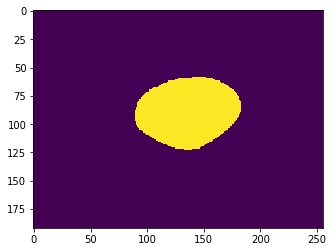

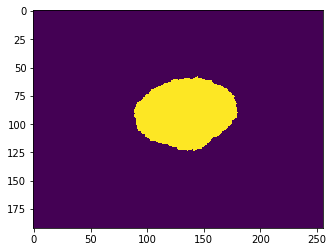

0.7400337806114784  step number is  32700  batch_size is  16
Currently on step 32800
the time is  7471.180608000001 

Avg Jacc is:


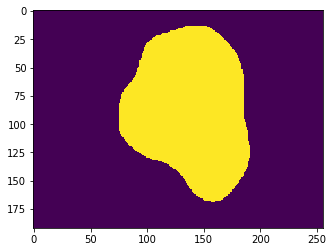

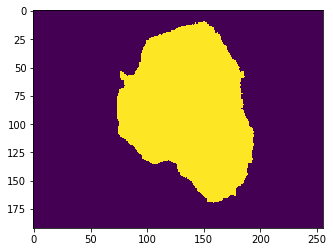

0.735611079289363  step number is  32800  batch_size is  16
Currently on step 32900
the time is  7494.0157930000005 

Avg Jacc is:


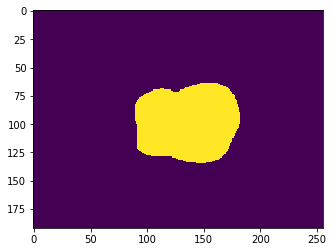

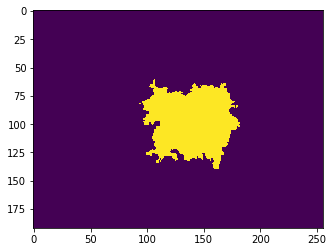

0.7295634343073918  step number is  32900  batch_size is  16
Currently on step 33000
the time is  7516.960888 

Avg Jacc is:


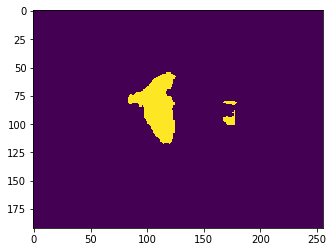

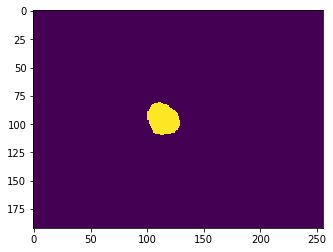

0.7375319260817308  step number is  33000  batch_size is  16
Currently on step 33100
the time is  7539.932308000001 

Avg Jacc is:


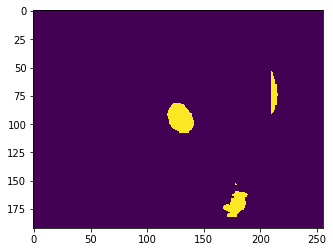

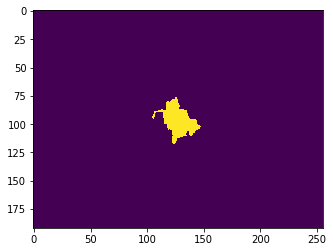

0.7106923616849459  step number is  33100  batch_size is  16
Currently on step 33200
the time is  7562.917252000001 

Avg Jacc is:


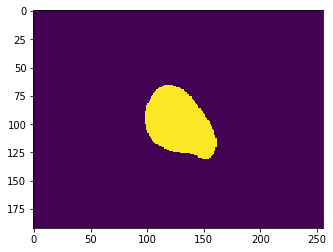

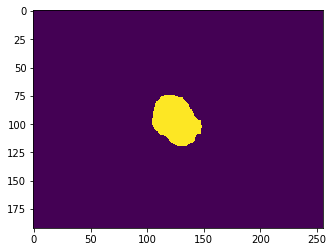

0.7355657724233774  step number is  33200  batch_size is  16
Currently on step 33300
the time is  7585.941595000002 

Avg Jacc is:


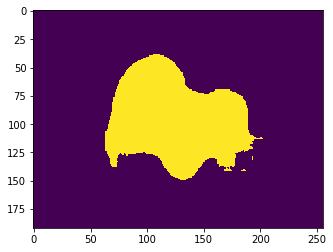

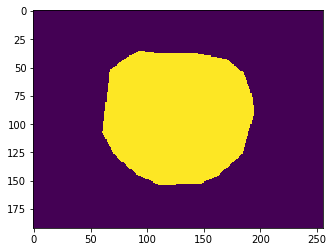

0.7378207280085637  step number is  33300  batch_size is  16
Currently on step 33400
the time is  7608.953202999999 

Avg Jacc is:


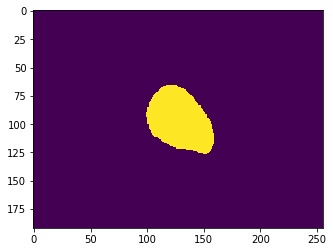

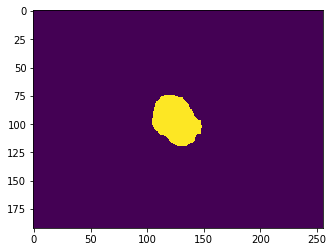

0.7292485750638522  step number is  33400  batch_size is  16
Currently on step 33500
the time is  7631.897514000002 

Avg Jacc is:


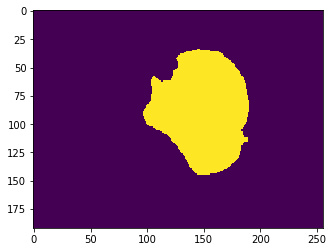

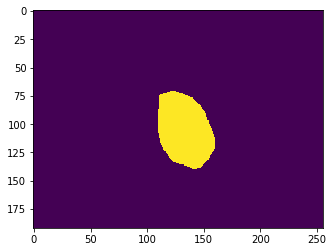

0.7301156850961539  step number is  33500  batch_size is  16
Currently on step 33600
the time is  7654.747020000001 

Avg Jacc is:


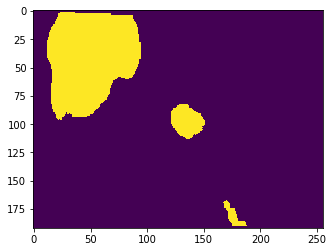

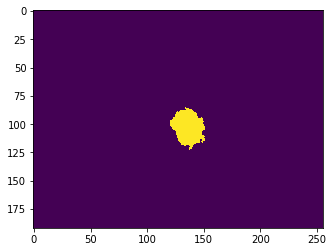

0.7320016714242789  step number is  33600  batch_size is  16
Currently on step 33700
the time is  7677.550533 

Avg Jacc is:


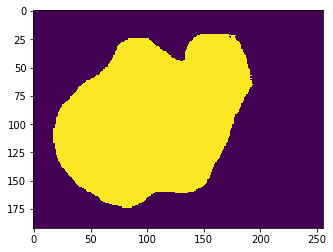

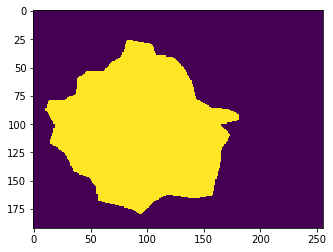

0.7268386840820312  step number is  33700  batch_size is  16
Currently on step 33800
the time is  7700.36411 

Avg Jacc is:


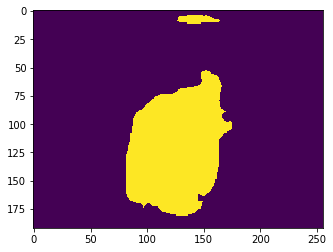

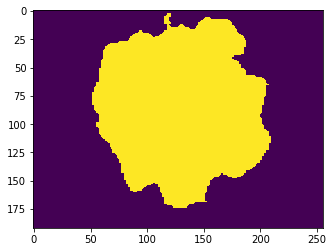

0.7295183621920072  step number is  33800  batch_size is  16
Currently on step 33900
the time is  7723.234409999999 

Avg Jacc is:


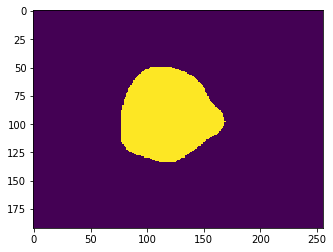

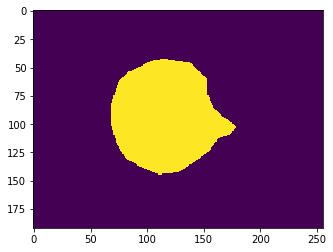

0.726699711726262  step number is  33900  batch_size is  16
Currently on step 34000
the time is  7746.075662000001 

Avg Jacc is:


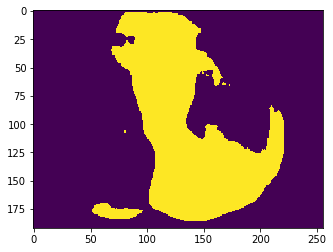

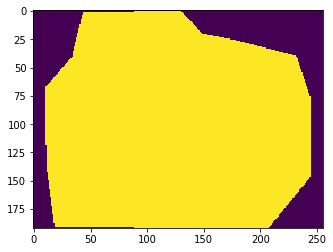

0.7290872427133414  step number is  34000  batch_size is  16
Currently on step 34100
the time is  7768.919984000002 

Avg Jacc is:


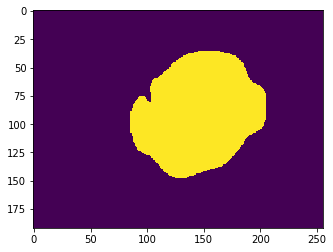

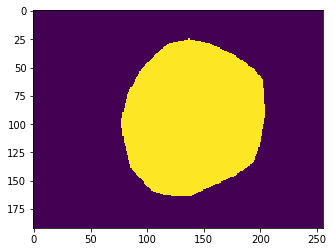

0.7226744431715745  step number is  34100  batch_size is  16
Currently on step 34200
the time is  7791.784410000002 

Avg Jacc is:


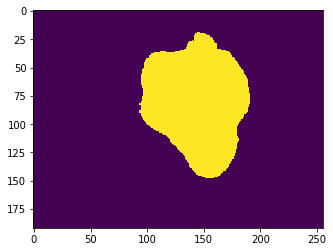

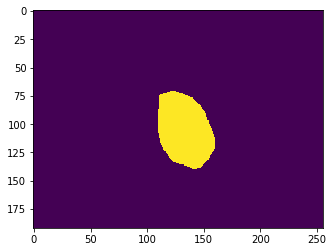

0.7254983755258414  step number is  34200  batch_size is  16
Currently on step 34300
the time is  7814.84742 

Avg Jacc is:


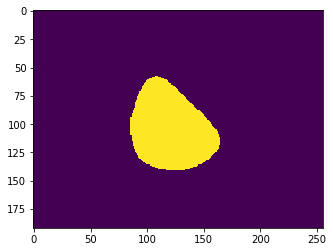

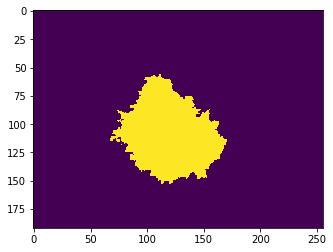

0.726724125788762  step number is  34300  batch_size is  16
Currently on step 34400
the time is  7837.940692000002 

Avg Jacc is:


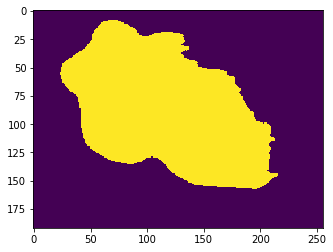

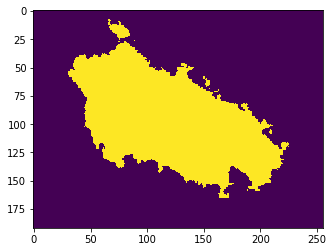

0.7208031287560096  step number is  34400  batch_size is  16
Currently on step 34500
the time is  7860.961105 

Avg Jacc is:


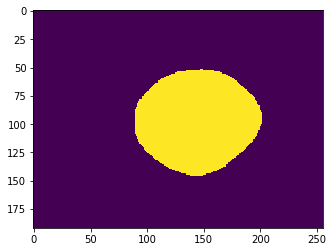

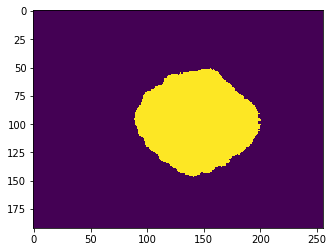

0.7233419565054087  step number is  34500  batch_size is  16
Currently on step 34600
the time is  7883.944121000002 

Avg Jacc is:


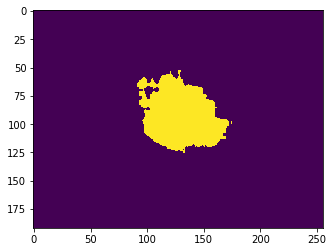

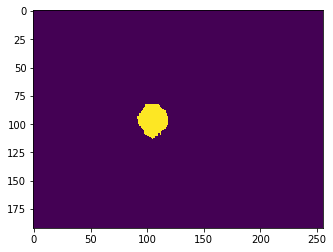

0.7217137263371394  step number is  34600  batch_size is  16
Currently on step 34700
the time is  7906.961174000002 

Avg Jacc is:


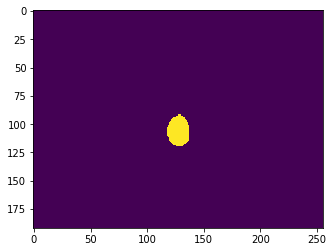

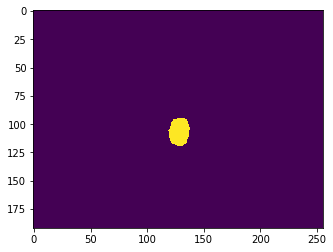

0.7108937777005709  step number is  34700  batch_size is  16
Currently on step 34800
the time is  7929.907420000001 

Avg Jacc is:


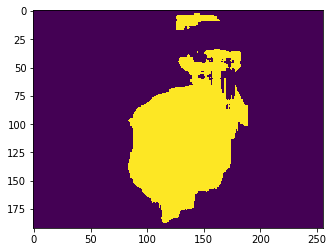

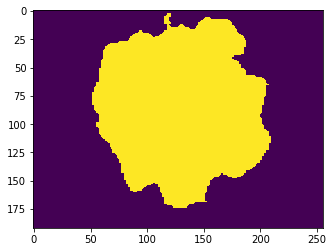

0.7275506826547476  step number is  34800  batch_size is  16
Currently on step 34900
the time is  7952.891489 

Avg Jacc is:


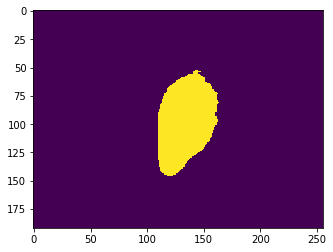

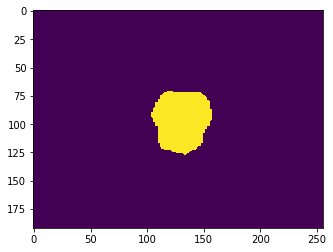

0.722689701960637  step number is  34900  batch_size is  16
Currently on step 35000
the time is  7975.767633000001 

Avg Jacc is:


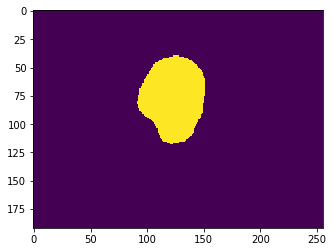

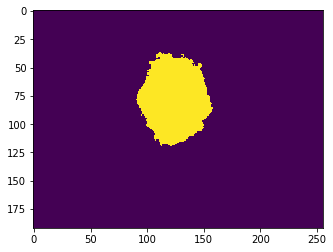

0.7285746060884916  step number is  35000  batch_size is  16
Currently on step 35100
the time is  7998.723946 

Avg Jacc is:


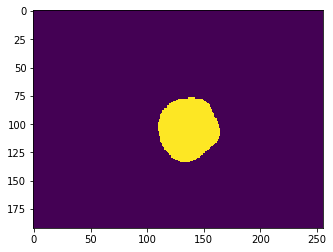

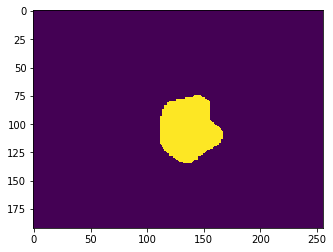

0.7373084435096153  step number is  35100  batch_size is  16
Currently on step 35200
the time is  8021.518982 

Avg Jacc is:


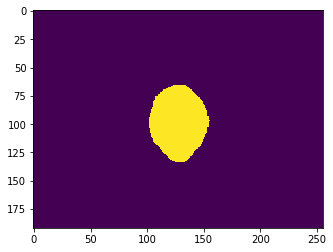

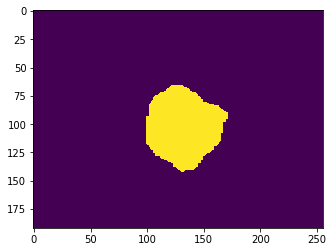

0.7291385357196515  step number is  35200  batch_size is  16
Currently on step 35300
the time is  8044.4048889999995 

Avg Jacc is:


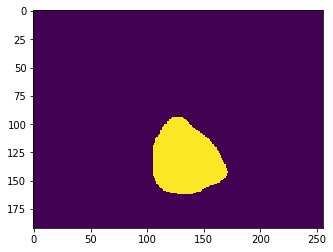

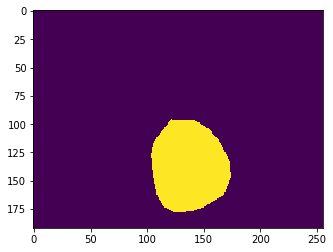

0.730725332406851  step number is  35300  batch_size is  16
Currently on step 35400
the time is  8067.2855309999995 

Avg Jacc is:


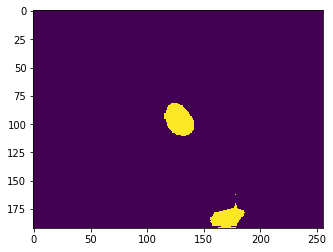

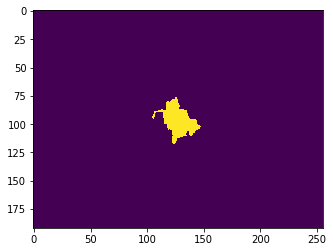

0.7301144526554988  step number is  35400  batch_size is  16
Currently on step 35500
the time is  8090.093081000001 

Avg Jacc is:


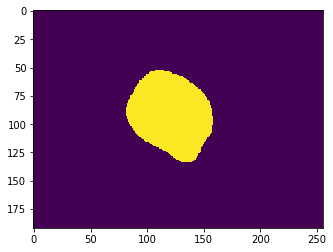

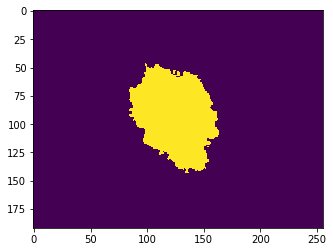

0.7331615154559795  step number is  35500  batch_size is  16
Currently on step 35600
the time is  8112.994306000002 

Avg Jacc is:


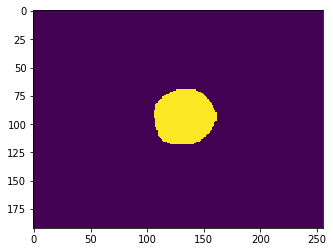

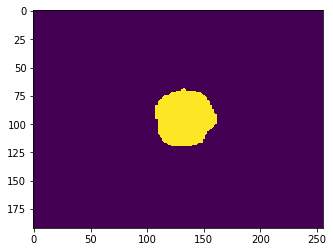

0.7350810124323919  step number is  35600  batch_size is  16
Currently on step 35700
the time is  8135.849905000001 

Avg Jacc is:


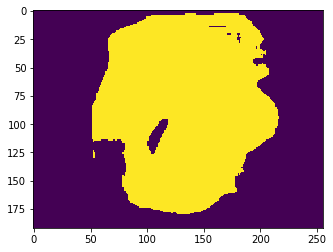

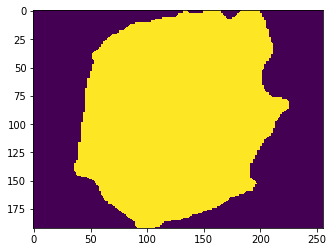

0.7190380389873798  step number is  35700  batch_size is  16
Currently on step 35800
the time is  8158.931269999999 

Avg Jacc is:


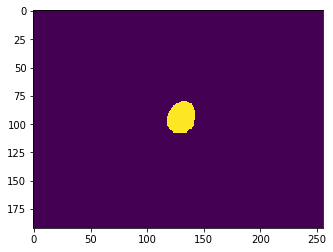

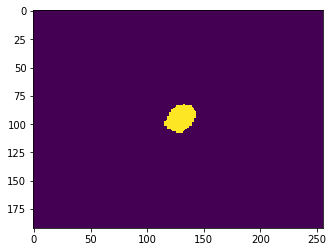

0.703967050405649  step number is  35800  batch_size is  16
Currently on step 35900
the time is  8181.996513 

Avg Jacc is:


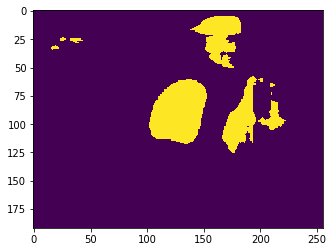

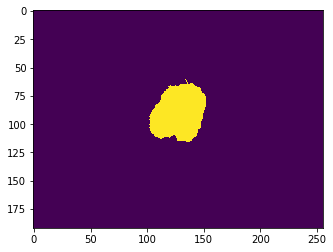

0.7267911470853365  step number is  35900  batch_size is  16
Currently on step 36000
the time is  8205.01373 

Avg Jacc is:


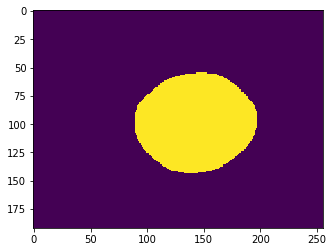

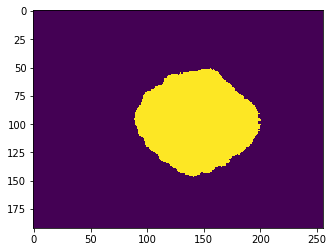

0.7254611088679387  step number is  36000  batch_size is  16
Currently on step 36100
the time is  8227.993449 

Avg Jacc is:


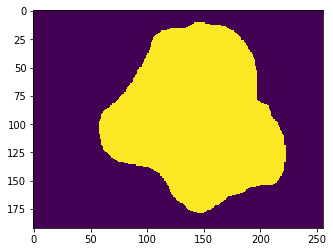

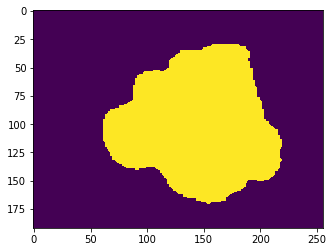

0.7197690523587741  step number is  36100  batch_size is  16
Currently on step 36200
the time is  8250.961032000001 

Avg Jacc is:


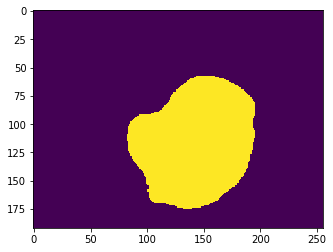

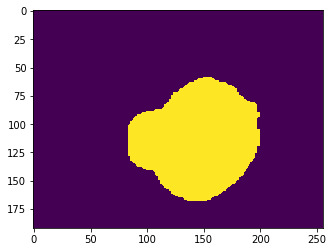

0.7400449899526743  step number is  36200  batch_size is  16
Currently on step 36300
the time is  8274.162755 

Avg Jacc is:


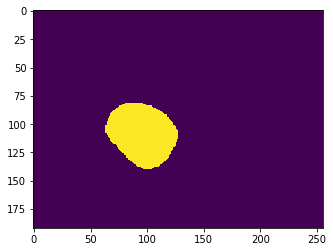

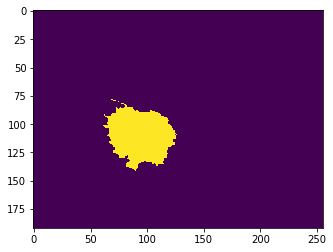

0.7304453923152043  step number is  36300  batch_size is  16
Currently on step 36400
the time is  8297.118380000002 

Avg Jacc is:


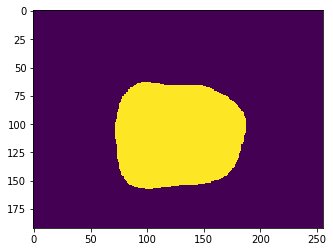

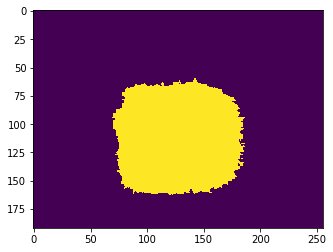

0.7357579157902644  step number is  36400  batch_size is  16
Currently on step 36500
the time is  8320.144374000001 

Avg Jacc is:


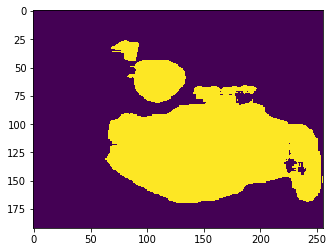

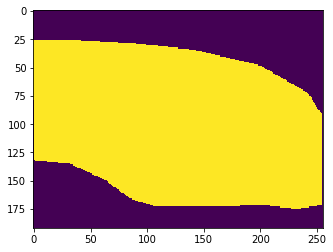

0.7251998901367187  step number is  36500  batch_size is  16
Currently on step 36600
the time is  8343.165279000003 

Avg Jacc is:


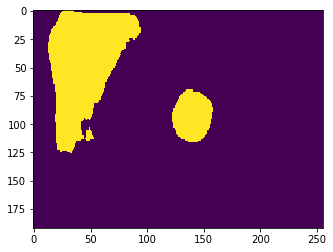

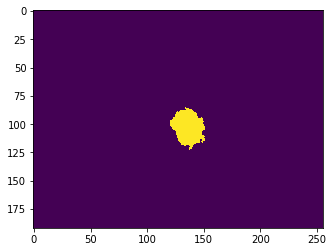

0.7278262798602765  step number is  36600  batch_size is  16
Currently on step 36700
the time is  8366.096286000002 

Avg Jacc is:


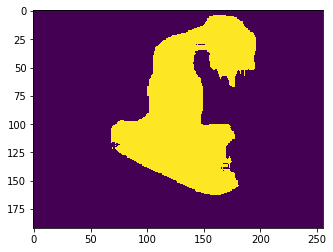

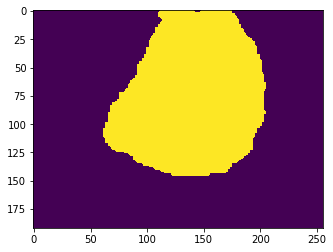

0.7419859666090746  step number is  36700  batch_size is  16
Currently on step 36800
the time is  8388.933683000001 

Avg Jacc is:


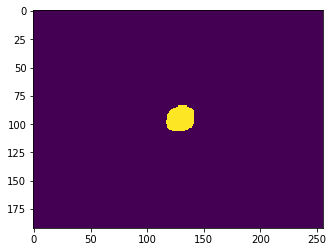

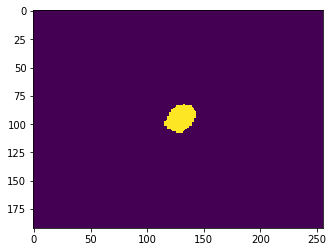

0.7338401794433593  step number is  36800  batch_size is  16
Currently on step 36900
the time is  8411.898119 

Avg Jacc is:


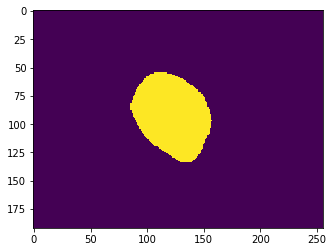

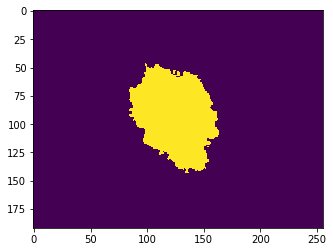

0.7332125150240385  step number is  36900  batch_size is  16
Currently on step 37000
the time is  8434.709966 

Avg Jacc is:


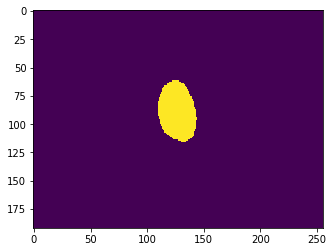

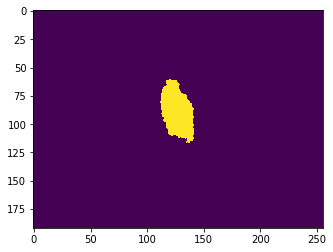

0.7399141751802885  step number is  37000  batch_size is  16
Currently on step 37100
the time is  8457.615312 

Avg Jacc is:


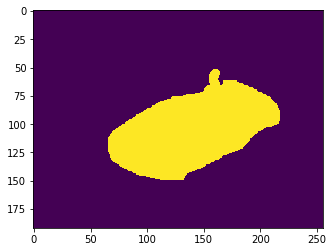

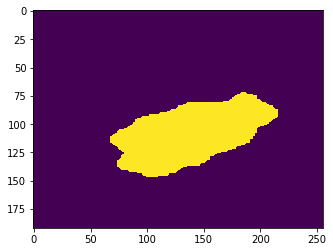

0.7261620154747597  step number is  37100  batch_size is  16
Currently on step 37200
the time is  8480.713946000002 

Avg Jacc is:


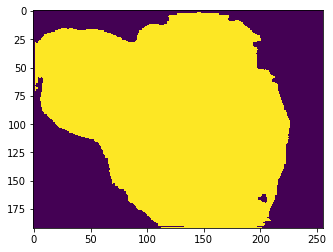

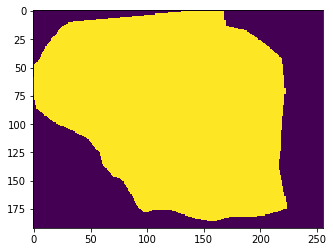

0.7256845327524039  step number is  37200  batch_size is  16
Currently on step 37300
the time is  8503.759343 

Avg Jacc is:


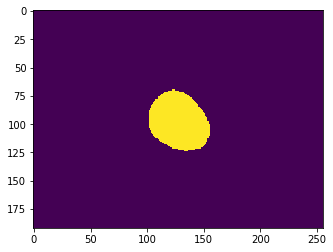

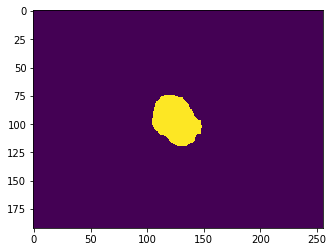

0.7201823307917669  step number is  37300  batch_size is  16
Currently on step 37400
the time is  8526.672332 

Avg Jacc is:


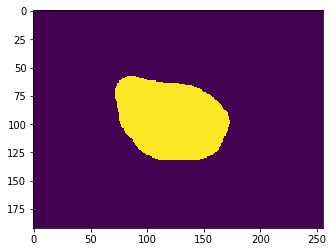

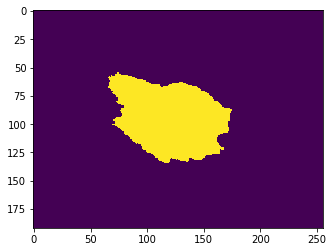

0.7284233680138221  step number is  37400  batch_size is  16
Currently on step 37500
the time is  8549.782885000002 

Avg Jacc is:


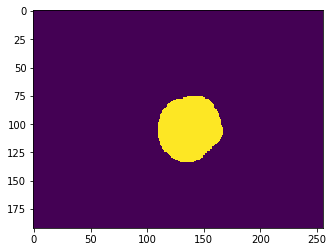

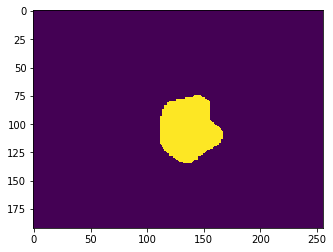

0.7332355792705829  step number is  37500  batch_size is  16
Currently on step 37600
the time is  8572.675945 

Avg Jacc is:


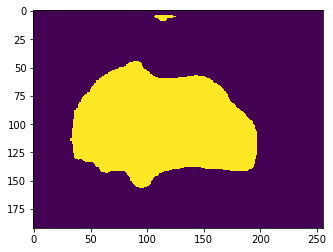

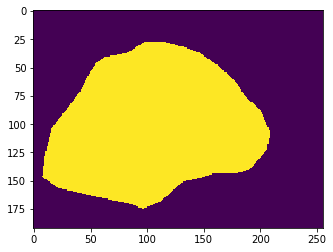

0.7242786114032452  step number is  37600  batch_size is  16
Currently on step 37700
the time is  8595.635236 

Avg Jacc is:


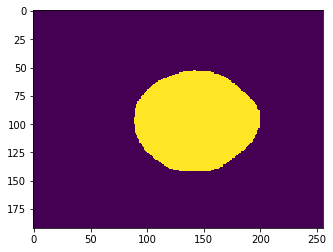

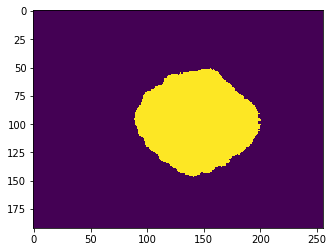

0.7395956773024339  step number is  37700  batch_size is  16
Currently on step 37800
the time is  8619.158944 

Avg Jacc is:


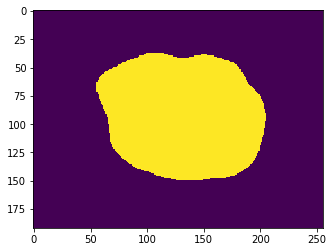

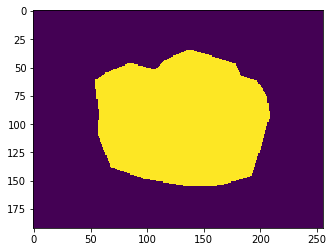

0.7324729332557092  step number is  37800  batch_size is  16
Currently on step 37900
the time is  8642.493647000001 

Avg Jacc is:


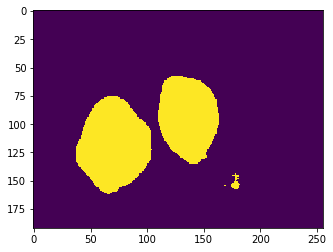

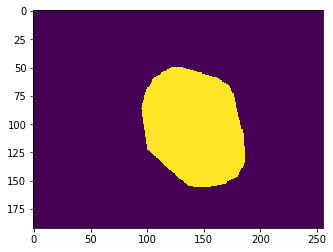

0.7309282743013822  step number is  37900  batch_size is  16
Currently on step 38000
the time is  8665.549851000002 

Avg Jacc is:


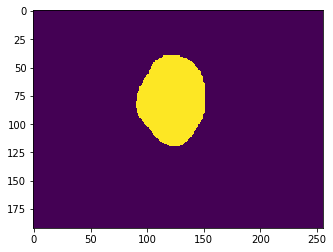

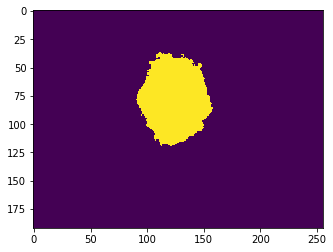

0.732018808218149  step number is  38000  batch_size is  16
Currently on step 38100
the time is  8688.870159 

Avg Jacc is:


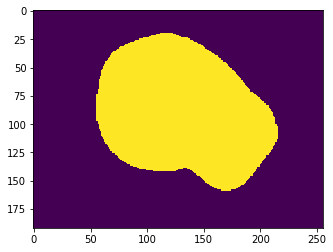

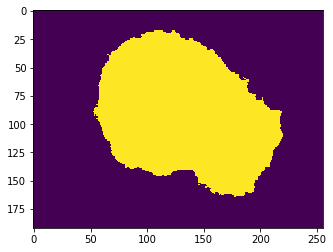

0.7277456430288461  step number is  38100  batch_size is  16
Currently on step 38200
the time is  8712.026872 

Avg Jacc is:


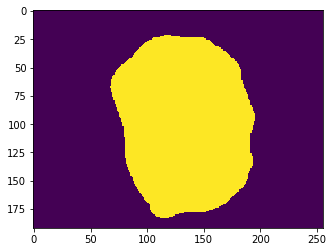

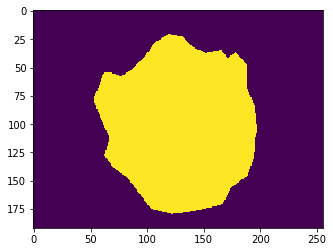

0.7449939434344952  step number is  38200  batch_size is  16
Currently on step 38300
the time is  8734.933301 

Avg Jacc is:


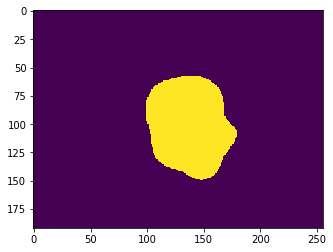

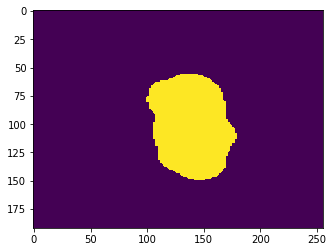

0.7410442645733173  step number is  38300  batch_size is  16
Currently on step 38400
the time is  8757.831141 

Avg Jacc is:


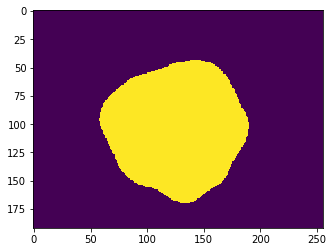

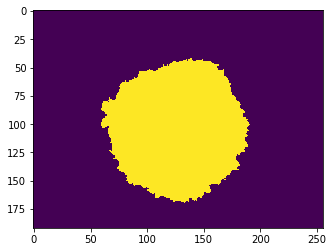

0.7391620342548076  step number is  38400  batch_size is  16
Currently on step 38500
the time is  8780.723620000002 

Avg Jacc is:


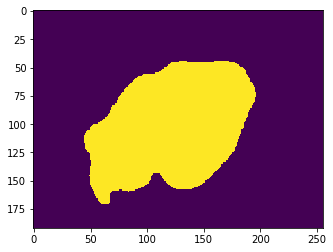

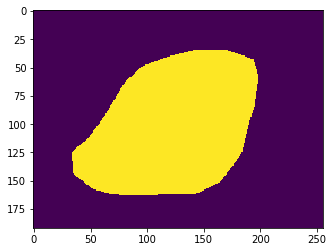

0.7408034104567308  step number is  38500  batch_size is  16
Currently on step 38600
the time is  8803.724490000002 

Avg Jacc is:


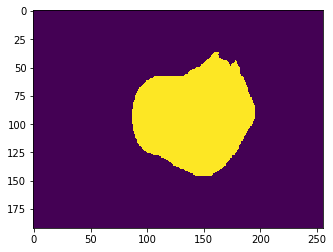

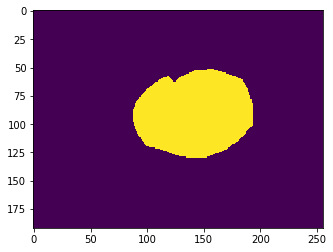

0.7416806734525241  step number is  38600  batch_size is  16
Currently on step 38700
the time is  8826.599959000001 

Avg Jacc is:


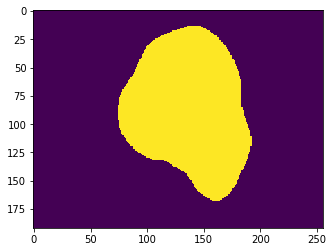

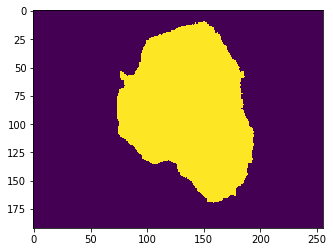

0.7439703134390024  step number is  38700  batch_size is  16
Currently on step 38800
the time is  8849.469650000001 

Avg Jacc is:


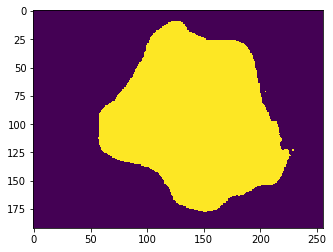

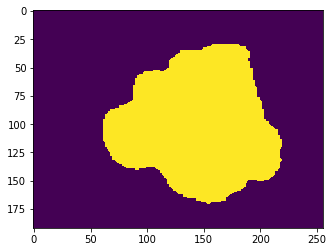

0.7451162484975962  step number is  38800  batch_size is  16
Currently on step 38900
the time is  8872.340750000001 

Avg Jacc is:


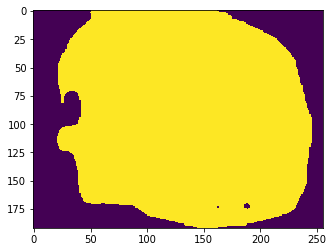

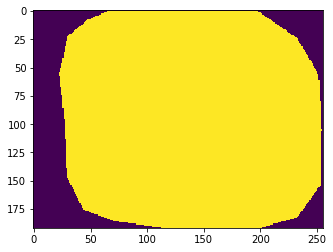

0.7344929621769831  step number is  38900  batch_size is  16
Currently on step 39000
the time is  8895.241225 

Avg Jacc is:


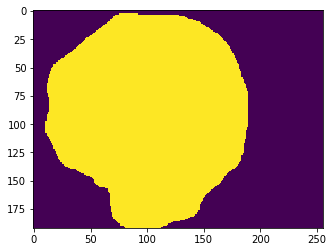

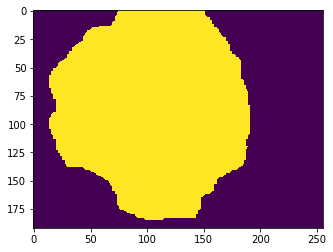

0.7448335500863882  step number is  39000  batch_size is  16
Currently on step 39100
the time is  8918.083457000002 

Avg Jacc is:


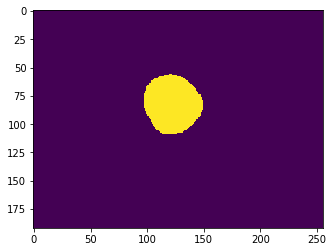

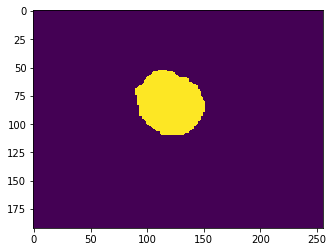

0.7273817795973557  step number is  39100  batch_size is  16
Currently on step 39200
the time is  8940.994875000002 

Avg Jacc is:


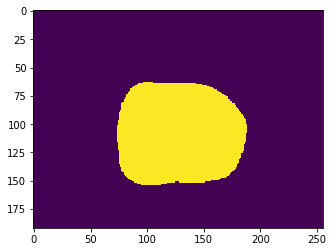

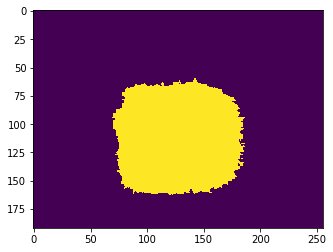

0.7420356163611779  step number is  39200  batch_size is  16
Currently on step 39300
the time is  8963.998242 

Avg Jacc is:


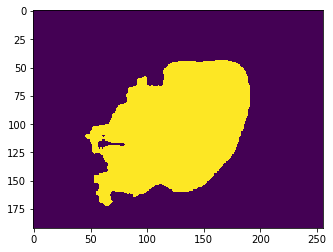

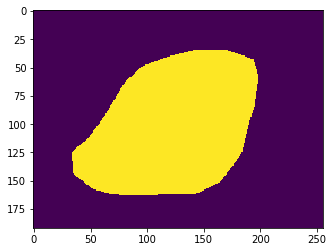

0.7386979323167068  step number is  39300  batch_size is  16
Currently on step 39400
the time is  8987.352933 

Avg Jacc is:


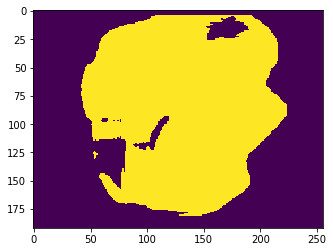

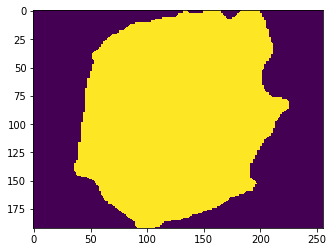

0.7354249220628005  step number is  39400  batch_size is  16
Currently on step 39500
the time is  9010.322624000002 

Avg Jacc is:


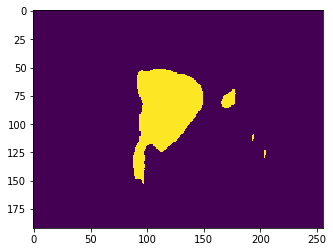

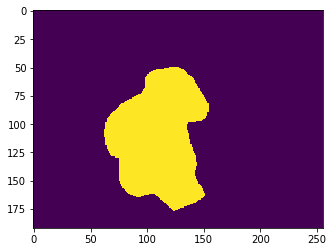

0.7353174062875601  step number is  39500  batch_size is  16
Currently on step 39600
the time is  9033.674949000002 

Avg Jacc is:


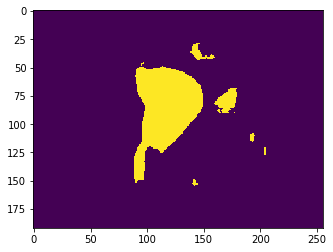

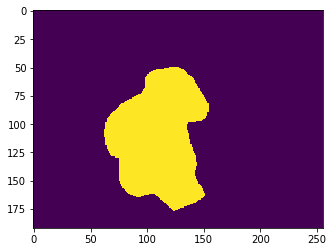

0.7285598754882813  step number is  39600  batch_size is  16
Currently on step 39700
the time is  9056.795582 

Avg Jacc is:


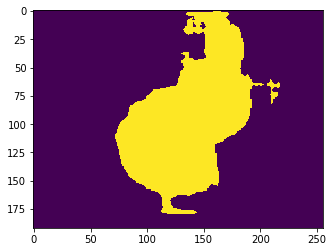

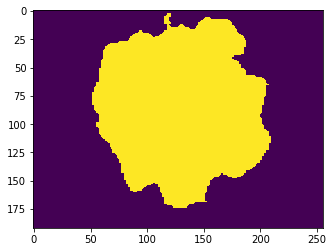

0.7297193087064303  step number is  39700  batch_size is  16
Currently on step 39800
the time is  9079.974387 

Avg Jacc is:


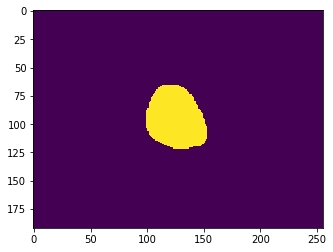

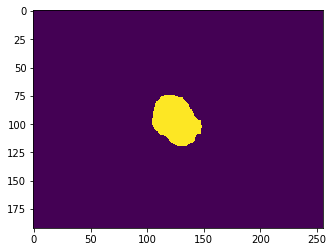

0.7266488882211538  step number is  39800  batch_size is  16
Currently on step 39900
the time is  9103.175100000002 

Avg Jacc is:


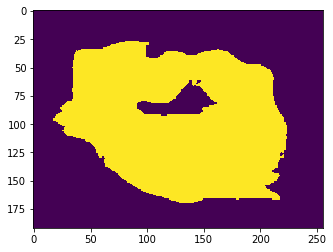

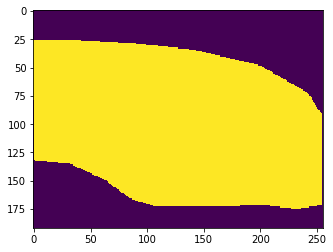

0.724192633995643  step number is  39900  batch_size is  16
Currently on step 40000
the time is  9126.507774 

Avg Jacc is:


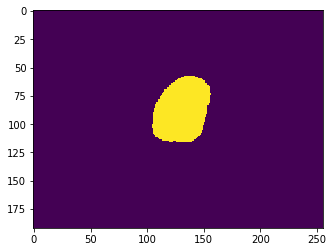

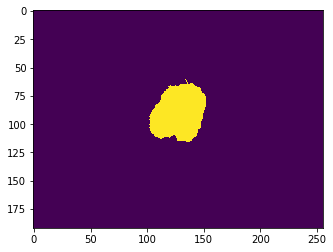

0.7158308762770432  step number is  40000  batch_size is  16
Currently on step 40100
the time is  9149.700115000001 

Avg Jacc is:


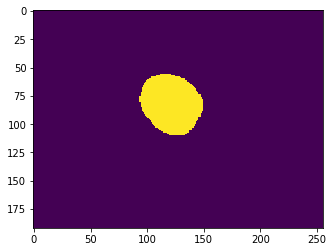

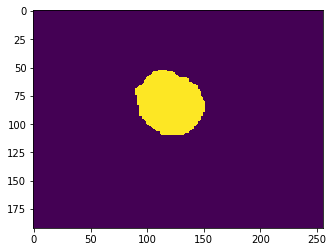

0.7390903179462139  step number is  40100  batch_size is  16
Currently on step 40200
the time is  9172.868048000002 

Avg Jacc is:


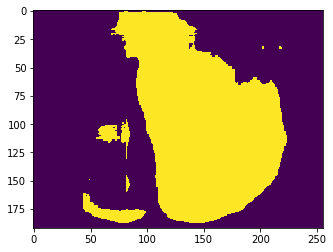

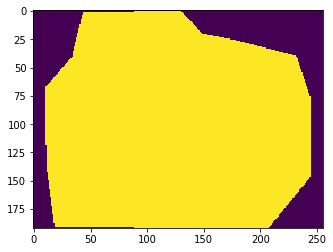

0.723630112868089  step number is  40200  batch_size is  16
Currently on step 40300
the time is  9195.97777 

Avg Jacc is:


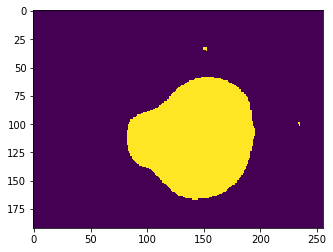

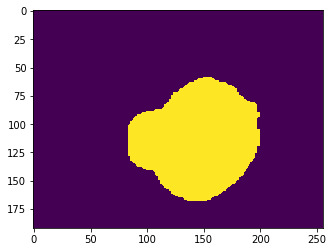

0.7220460745004508  step number is  40300  batch_size is  16
Currently on step 40400
the time is  9218.920196000001 

Avg Jacc is:


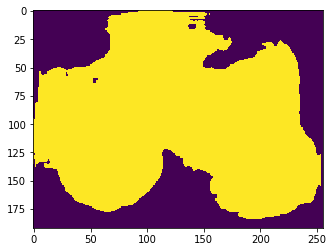

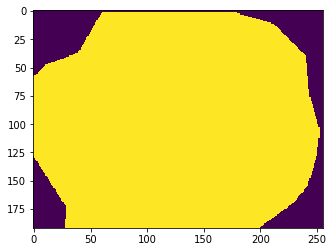

0.7310936560997596  step number is  40400  batch_size is  16
Currently on step 40500
the time is  9241.865298000002 

Avg Jacc is:


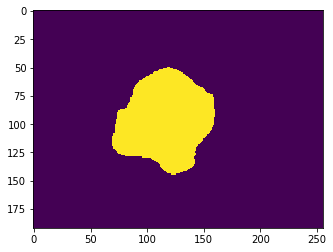

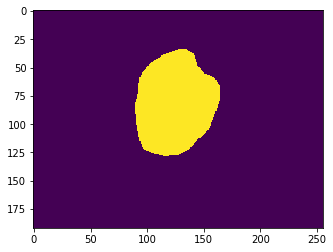

0.7261052058293269  step number is  40500  batch_size is  16
Currently on step 40600
the time is  9264.728660000002 

Avg Jacc is:


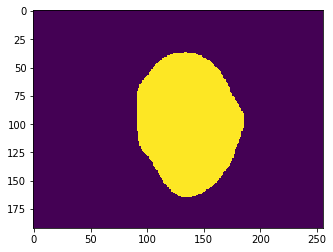

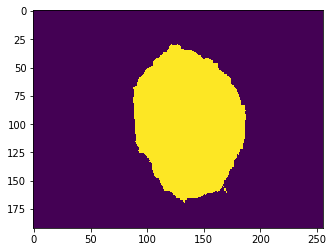

0.7333753145658053  step number is  40600  batch_size is  16
Currently on step 40700
the time is  9287.751922000001 

Avg Jacc is:


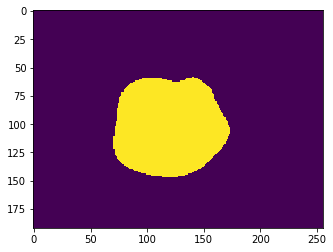

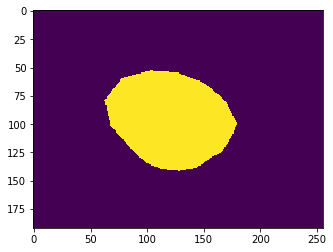

0.7367159916804387  step number is  40700  batch_size is  16
Currently on step 40800
the time is  9310.744585000002 

Avg Jacc is:


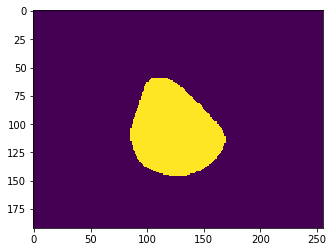

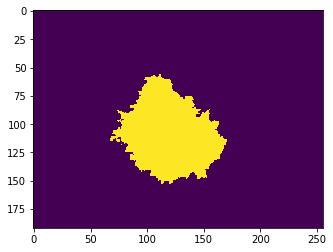

0.7333251953125  step number is  40800  batch_size is  16
Currently on step 40900
the time is  9333.777626000001 

Avg Jacc is:


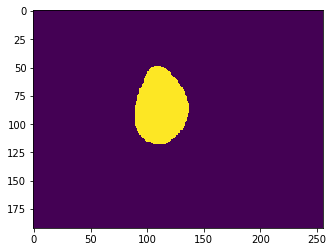

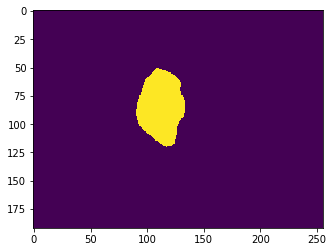

0.7401697012094351  step number is  40900  batch_size is  16
Currently on step 41000
the time is  9356.731207000003 

Avg Jacc is:


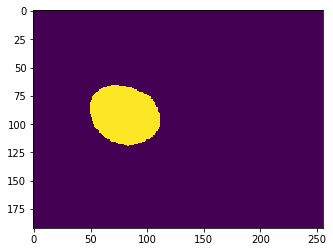

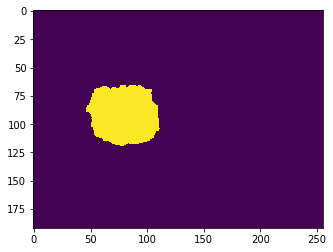

0.7357670123760517  step number is  41000  batch_size is  16
Currently on step 41100
the time is  9379.844150000003 

Avg Jacc is:


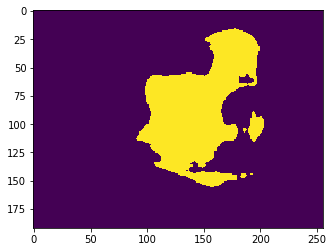

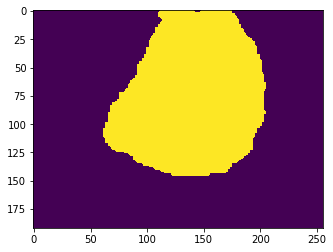

0.7331535339355468  step number is  41100  batch_size is  16
Currently on step 41200
the time is  9402.847988 

Avg Jacc is:


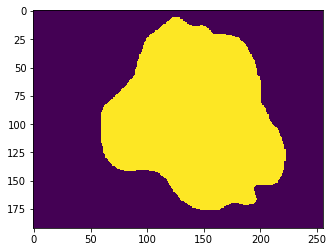

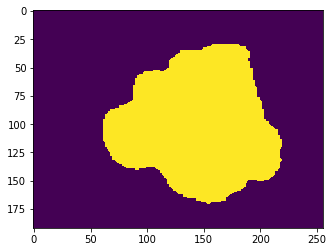

0.7404523409329928  step number is  41200  batch_size is  16
Currently on step 41300
the time is  9425.763549000001 

Avg Jacc is:


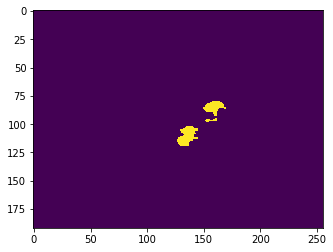

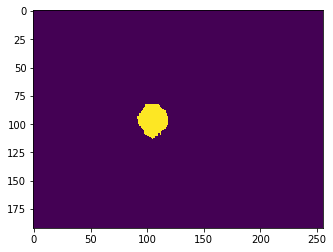

0.7287638737605169  step number is  41300  batch_size is  16
Currently on step 41400
the time is  9448.660852000003 

Avg Jacc is:


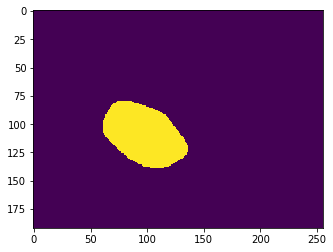

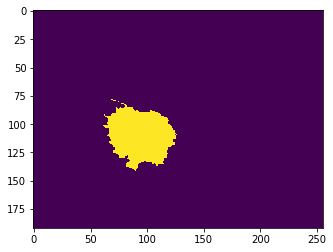

0.7221751873309795  step number is  41400  batch_size is  16
Currently on step 41500
the time is  9471.653695000003 

Avg Jacc is:


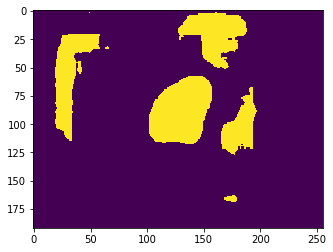

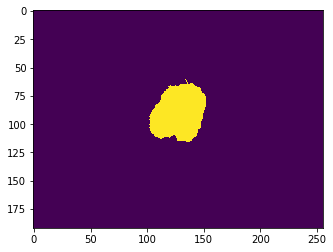

0.7317410395695613  step number is  41500  batch_size is  16
Currently on step 41600
the time is  9494.581149 

Avg Jacc is:


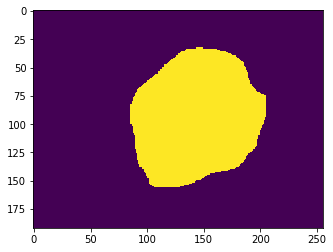

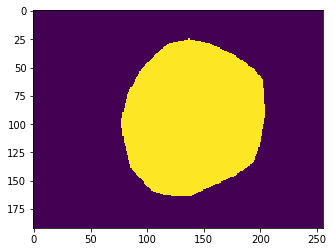

0.7229879525991586  step number is  41600  batch_size is  16
Currently on step 41700
the time is  9517.535296 

Avg Jacc is:


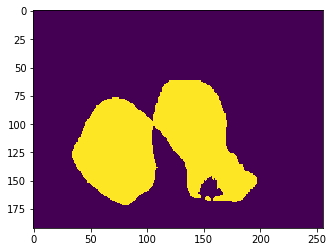

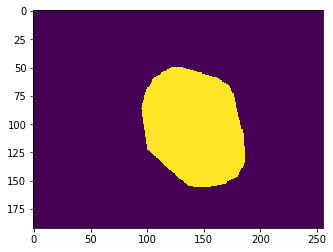

0.7270467904897836  step number is  41700  batch_size is  16
Currently on step 41800
the time is  9540.438155000002 

Avg Jacc is:


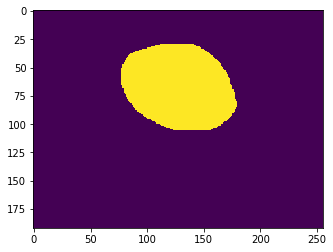

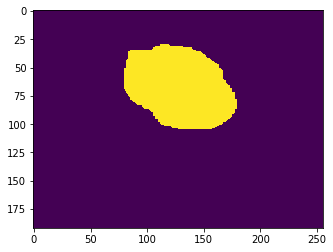

0.7290599529559796  step number is  41800  batch_size is  16
Currently on step 41900
the time is  9563.299360000003 

Avg Jacc is:


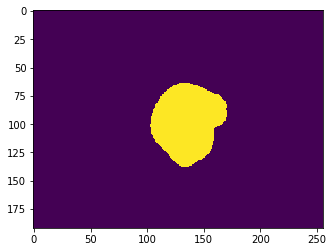

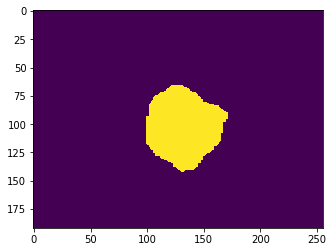

0.7283078707181491  step number is  41900  batch_size is  16
Currently on step 42000
the time is  9586.203297000002 

Avg Jacc is:


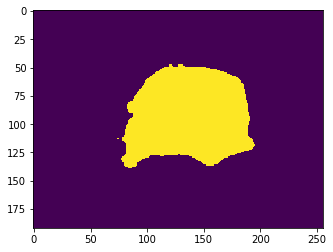

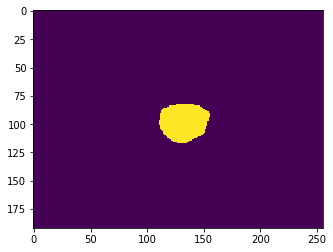

0.7294020432692307  step number is  42000  batch_size is  16
Currently on step 42100
the time is  9609.048307 

Avg Jacc is:


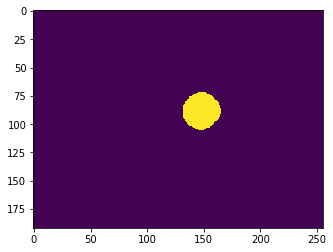

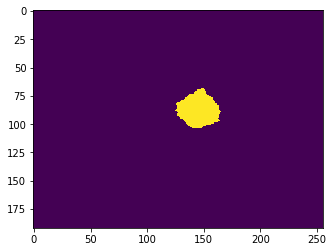

0.7282420818622296  step number is  42100  batch_size is  16
Currently on step 42200
the time is  9632.001979000002 

Avg Jacc is:


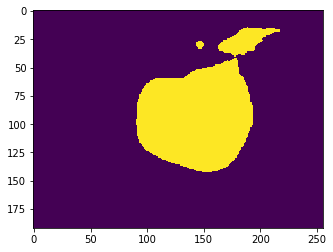

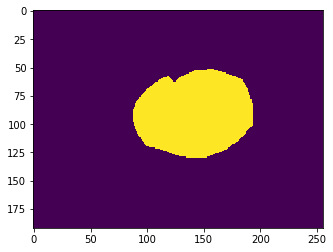

0.7171854459322415  step number is  42200  batch_size is  16
Currently on step 42300
the time is  9655.339287 

Avg Jacc is:


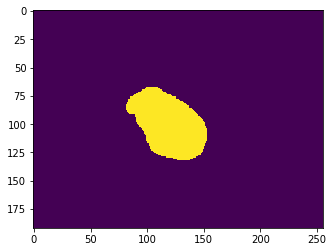

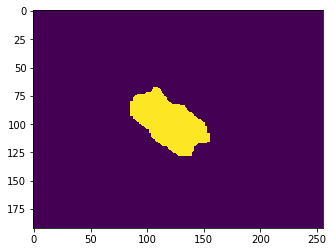

0.7214010972243089  step number is  42300  batch_size is  16
Currently on step 42400
the time is  9678.418081000002 

Avg Jacc is:


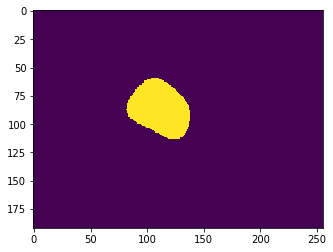

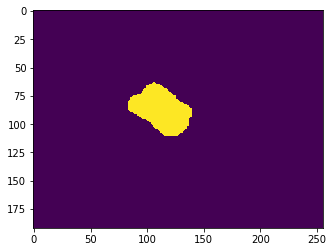

0.7161078232985276  step number is  42400  batch_size is  16
Currently on step 42500
the time is  9701.344984000001 

Avg Jacc is:


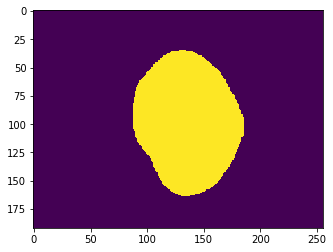

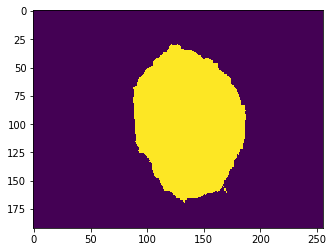

0.7169464698204627  step number is  42500  batch_size is  16
Currently on step 42600
the time is  9724.323381 

Avg Jacc is:


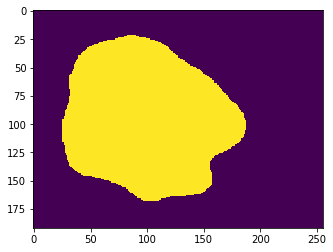

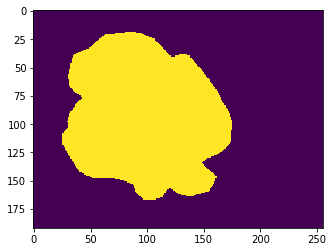

0.7241709195650541  step number is  42600  batch_size is  16
Currently on step 42700
the time is  9747.207387 

Avg Jacc is:


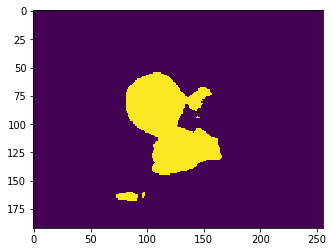

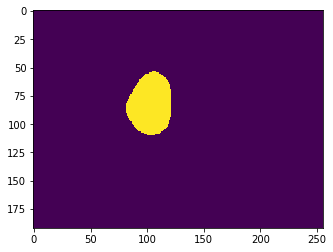

0.7314197833721454  step number is  42700  batch_size is  16
Currently on step 42800
the time is  9770.106338 

Avg Jacc is:


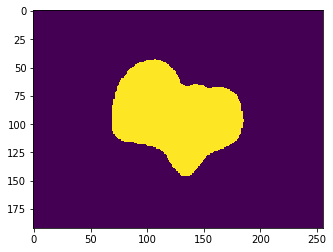

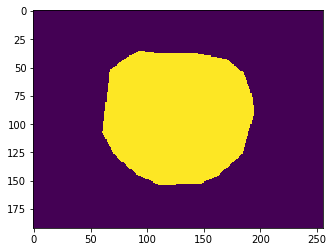

0.7255300668569712  step number is  42800  batch_size is  16
Currently on step 42900
the time is  9793.045234 

Avg Jacc is:


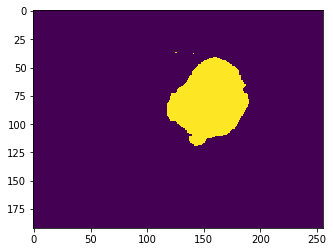

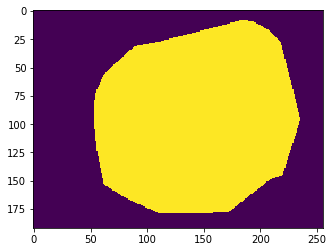

0.7286936833308293  step number is  42900  batch_size is  16
Currently on step 43000
the time is  9815.95428 

Avg Jacc is:


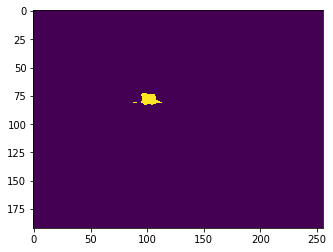

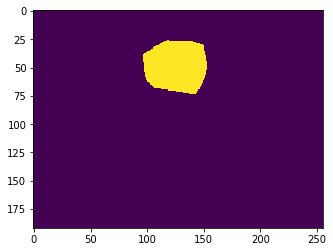

0.7271627572866587  step number is  43000  batch_size is  16
Currently on step 43100
the time is  9838.871398000001 

Avg Jacc is:


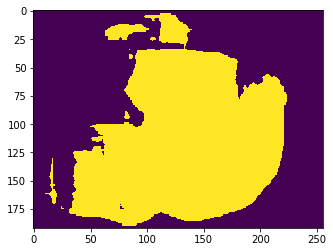

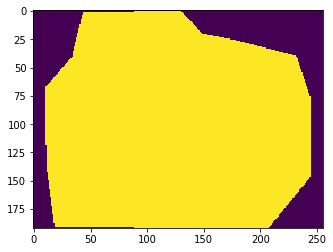

0.7264597379244291  step number is  43100  batch_size is  16
Currently on step 43200
the time is  9862.041675000002 

Avg Jacc is:


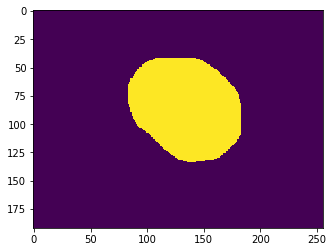

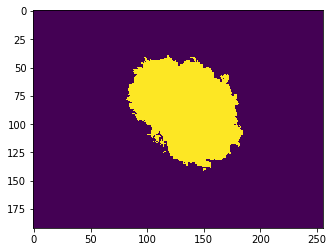

0.7029536320612981  step number is  43200  batch_size is  16
Currently on step 43300
the time is  9885.196283 

Avg Jacc is:


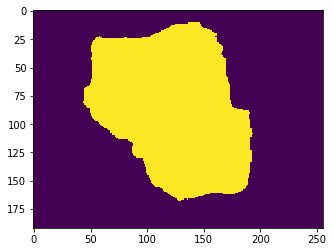

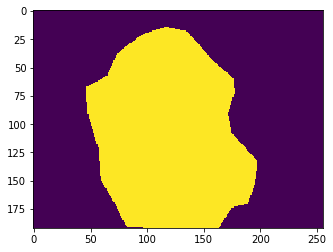

0.7145697960486779  step number is  43300  batch_size is  16
Currently on step 43400
the time is  9908.384936 

Avg Jacc is:


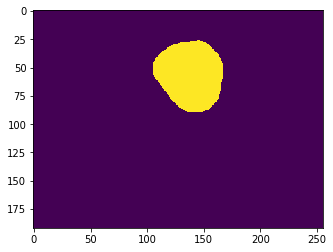

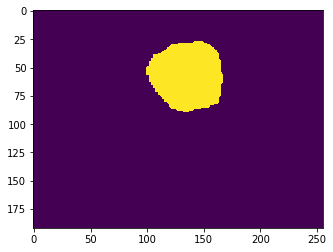

0.7111745981069711  step number is  43400  batch_size is  16
Currently on step 43500
the time is  9931.495023000001 

Avg Jacc is:


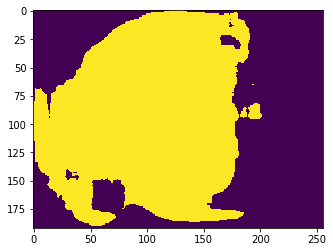

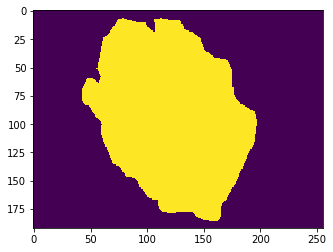

0.7303884066068209  step number is  43500  batch_size is  16
Currently on step 43600
the time is  9954.381016000001 

Avg Jacc is:


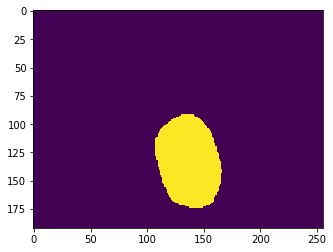

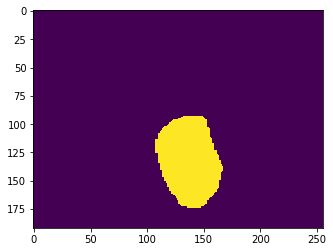

0.7276451697716346  step number is  43600  batch_size is  16
Currently on step 43700
the time is  9977.232404 

Avg Jacc is:


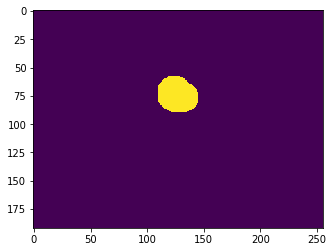

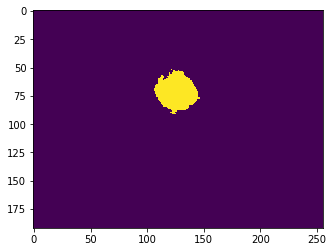

0.722076181265024  step number is  43700  batch_size is  16
Currently on step 43800
the time is  10000.269484000002 

Avg Jacc is:


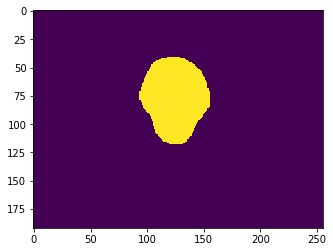

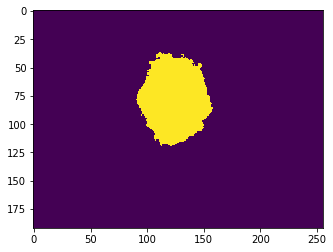

0.7341756967397837  step number is  43800  batch_size is  16
Currently on step 43900
the time is  10023.105894000002 

Avg Jacc is:


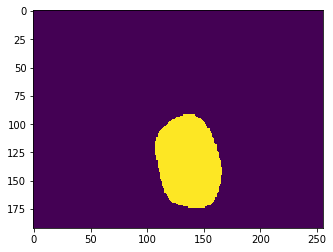

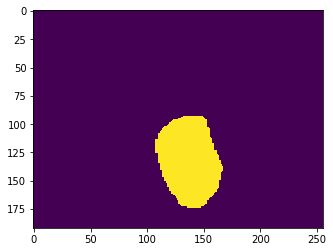

0.735540771484375  step number is  43900  batch_size is  16
Currently on step 44000
the time is  10045.952909000001 

Avg Jacc is:


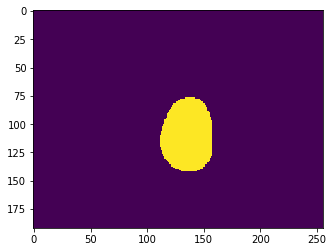

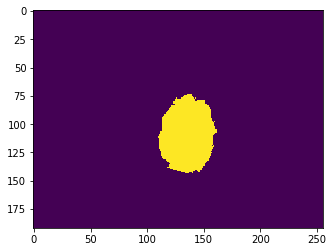

0.7351859459510216  step number is  44000  batch_size is  16
Currently on step 44100
the time is  10068.967368 

Avg Jacc is:


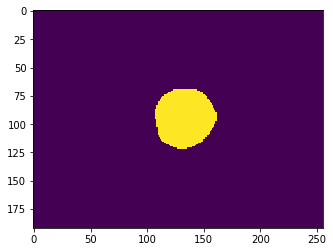

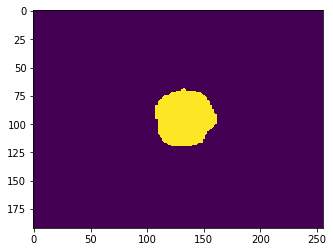

0.7346340472881611  step number is  44100  batch_size is  16
Currently on step 44200
the time is  10091.813417 

Avg Jacc is:


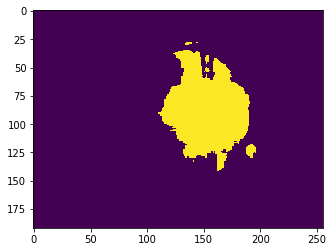

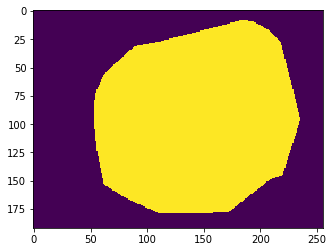

0.734627943772536  step number is  44200  batch_size is  16
Currently on step 44300
the time is  10114.848088 

Avg Jacc is:


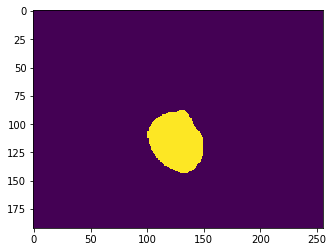

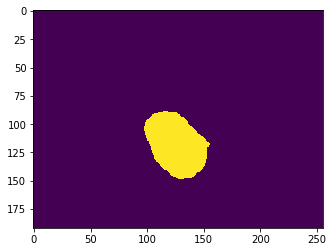

0.7330421447753906  step number is  44300  batch_size is  16
Currently on step 44400
the time is  10137.790283 

Avg Jacc is:


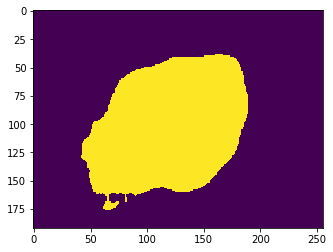

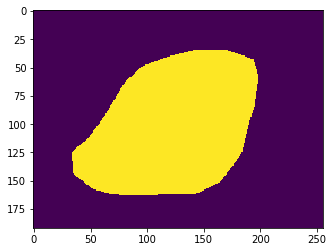

0.7310197096604567  step number is  44400  batch_size is  16
Currently on step 44500
the time is  10160.739649000001 

Avg Jacc is:


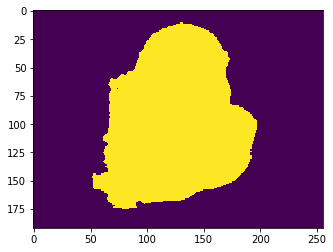

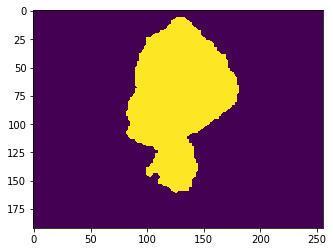

0.720527824988732  step number is  44500  batch_size is  16
Currently on step 44600
the time is  10183.726906000002 

Avg Jacc is:


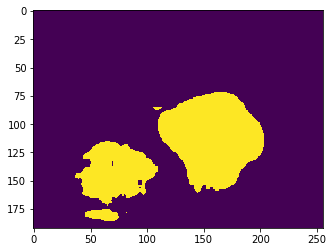

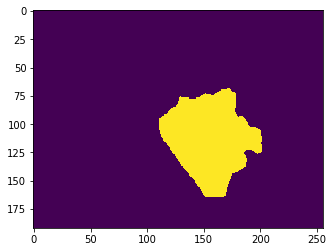

0.7270492553710938  step number is  44600  batch_size is  16
Currently on step 44700
the time is  10206.780235 

Avg Jacc is:


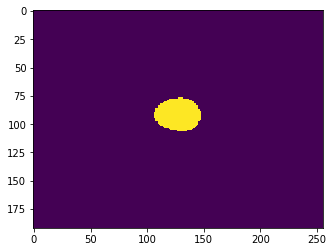

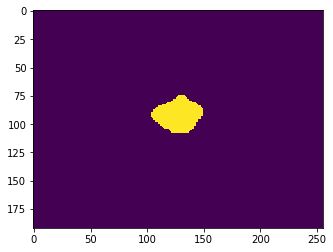

0.7324325561523437  step number is  44700  batch_size is  16
Currently on step 44800
the time is  10229.688673000002 

Avg Jacc is:


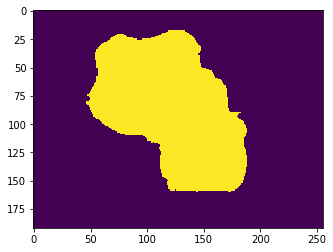

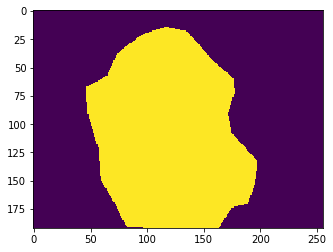

0.7316098726712741  step number is  44800  batch_size is  16


In [0]:
steps = 75000
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [1]:
J_out[1].shape

NameError: ignored

In [0]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

In [0]:
plt.plot(j_test)

In [0]:
plt.hist(J_out[0])

In [0]:
plt.hist(J_out_t[0])

In [0]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

## Great Job!

In [0]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [0]:
pigs.shape

In [0]:
pred_pigment[0].shape

In [0]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
mask[:,:,0] = pred_pigment[0][0,:,:]
mask[:,:,1] = pred_pigment[0][0,:,:]
mask[:,:,2] = pred_pigment[0][0,:,:]
#mask = 1-mask
#mask = mask.astype(int)

image = pigment_image_show
#image[mask] = 0
image2 = image*mask*255
image1 = image*(1- mask)*255


In [0]:
plt.imshow(image2)
plt.show()

In [0]:
plt.imshow(image1)
plt.show()

In [0]:
image2[:,:,0].shape

In [0]:
red = image2[:,:,0].reshape(-1)

In [0]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [0]:
plt.show()

In [0]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [0]:
a2

In [0]:
mask[0].shape

In [0]:
red_norm = image1[:,:,0].reshape(-1)

In [0]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [0]:
plt.show()

In [0]:
mask_inv = 1-mask

In [0]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [0]:
mask_inv.shape

In [0]:
a1

In [0]:
a1 - a2

In [0]:
blue = image2[:,:,2].reshape(-1)

In [0]:
blue_norm = image1[:,:,2].reshape(-1)

In [0]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

In [0]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [0]:
def measure_progress(pigs,masks):
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1)
        blue_pig = imagep[:,:,2].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,2].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,2].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [0]:
J_out[1].shape

In [0]:
pigmented

In [0]:
normal

In [0]:
plt.plot(normal - pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented)

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[1])

In [0]:
plt.imshow(imagesp[2])

In [0]:
plt.imshow(imagesp[3])

In [0]:
plt.imshow(imagesp[4])

In [0]:
plt.imshow(imagesp[5])

In [0]:
plt.imshow(imagesp[6])

In [0]:
plt.imshow(imagesp[7])

In [0]:
plt.imshow(imagesp[8])

In [0]:
plt.imshow(imagesp[9])

In [0]:
plt.imshow(imagesp[10])

In [0]:
pigmented[0]

In [0]:
pigmented[10]

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[11])

In [0]:
plt.imshow(imagesp[12])

In [0]:
plt.imshow(imagesp[13])

In [0]:
plt.imshow(imagesp[14])

In [0]:
plt.imshow(imagesp[15])

In [0]:
plt.imshow(imagesp[16])

In [0]:
plt.imshow(imagesp[17])

In [0]:
plt.imshow(imagesp[18])

In [0]:
plt.imshow(imagesp[19])

In [0]:
plt.imshow(imagesp[20])

In [0]:
plt.imshow(imagesp[21])

In [0]:
plt.imshow(imagesp[22])

In [0]:
plt.imshow(imagesp[23])

In [0]:
plt.imshow(imagesp[24])

In [0]:
plt.imshow(imagesp[25])

In [0]:
plt.imshow(imagesp[26])

In [0]:
plt.imshow(imagesp[27])

In [0]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

In [0]:
plt.plot(test)

In [0]:
filenames

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [0]:
normal.shape

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
plt.plot(pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented/normal)

In [0]:
plt.plot((normal - pigmented)/normal)

In [0]:
new_files_names

In [0]:
plt.imshow(imagesp[12])